##### First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [216]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [310]:
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Used Car Data\\Consolidated_Used_Car.xlsx')
df

Brand                              Car_Name  Manufacturing_Year  \
0             Honda                       Honda City V MT                2020   
1     Maruti Suzuki               Maruti Baleno 1.2 Alpha                2017   
2        Volkswagen      Volkswagen Polo 1.2 MPI Highline                2016   
3             Honda                     Honda City ZX CVT                2020   
4             Honda                      Honda Jazz V CVT                2016   
...             ...                                   ...                 ...   
5032        Hyundai    Hyundai i20 Asta 1.4 CRDI 6 Speed                 2018   
5033        Hyundai  Hyundai Grand i10 1.2 CRDI Sportz O                 2017   
5034           Audi            Audi Q3 2.0 TDI S Edition                 2014   
5035           Audi            Audi Q3 2.0 TDI S Edition                 2014   
5036        Hyundai            Hyundai Elantra 1.6 SX MT                 2013   

      Driven_Kilometers  Fuel_Type  Car_Price    Location  Total_Owner's  \
0                 38906          0  1003000.0   Ahmedabad            NaN   
1                 38203          0   643000.0   Ahmedabad            1.0   
2                 69414          0   515000.0   Ahmedabad            NaN   
3                 21261          0  1299000.0   Ahmedabad            NaN   
4                 39821          0   605000.0   Ahmedabad            NaN   
...                 ...        ...        ...         ...            ...   
5032              69000          1   750000.0  Vijayawada            NaN   
5033              73600          0   420000.0    Srinagar            NaN   
5034              66027          1  1089449.0     Gurgaon            1.0   
5035              93752          1  1037699.0       Noida            3.0   
5036              50000          1   425000.0     Kolkata            3.0   

                                                  URL"s  
0     https://www.cardekho.com/buy-used-car-details/...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/buy-used-car-details/...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/buy-used-car-details/...  
...                                                 ...  
5032  https://www.quikr.com/cars/used-grey-2018-hyun...  
5033  https://www.quikr.com/cars/used-white-2017-hyu...  
5034  https://www.quikr.com/cars/used-white-2014-aud...  
5035  https://www.quikr.com/cars/used-white-2014-aud...  
5036  https://www.quikr.com/cars/used-grey-2013-hyun...  

[5037 rows x 9 columns]

###### Now,I've uploaded the CSV file of Car Price Prediction Case and made a dataframe for the same.

###### In this dataset I've to Predict the car price of used cars. Since 'Car Price' is in the form of continuous number format so will use regression model to predict the same.

### Exploratory Data Analysis(EDA)

In [218]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 5037
Columns are 9
Shape is (5037, 9)


In [219]:
#two dimensional dataframe
df.ndim

2

In [220]:
#Total datapoints in this dataframe
df.size

45333

In [221]:
#indexes are-
df.index

RangeIndex(start=0, stop=5037, step=1)

In [222]:
#columns of the dataframes are-
df.columns

Index(['Brand', 'Car_Name', 'Manufacturing_Year', 'Driven_Kilometers',
       'Fuel_Type', 'Car_Price', 'Location', 'Total_Owner's', 'URL"s'],
      dtype='object')

In [223]:
#It shows top 5 Rows
df.head(5)

Brand                          Car_Name  Manufacturing_Year  \
0          Honda                   Honda City V MT                2020   
1  Maruti Suzuki           Maruti Baleno 1.2 Alpha                2017   
2     Volkswagen  Volkswagen Polo 1.2 MPI Highline                2016   
3          Honda                 Honda City ZX CVT                2020   
4          Honda                  Honda Jazz V CVT                2016   

   Driven_Kilometers  Fuel_Type  Car_Price   Location  Total_Owner's  \
0              38906          0  1003000.0  Ahmedabad            NaN   
1              38203          0   643000.0  Ahmedabad            1.0   
2              69414          0   515000.0  Ahmedabad            NaN   
3              21261          0  1299000.0  Ahmedabad            NaN   
4              39821          0   605000.0  Ahmedabad            NaN   

                                               URL"s  
0  https://www.cardekho.com/buy-used-car-details/...  
1  https://www.cardekho.com/buy-used-car-details/...  
2  https://www.cardekho.com/buy-used-car-details/...  
3  https://www.cardekho.com/buy-used-car-details/...  
4  https://www.cardekho.com/buy-used-car-details/...

In [224]:
#It shows bottom 7 Rows
df.tail(7)

Brand                              Car_Name  Manufacturing_Year  \
5030  Mahindra                  Mahindra XUV 300 W8                 2022   
5031   Hyundai          Hyundai i10 Magna 1.1 iRDE2                 2008   
5032   Hyundai    Hyundai i20 Asta 1.4 CRDI 6 Speed                 2018   
5033   Hyundai  Hyundai Grand i10 1.2 CRDI Sportz O                 2017   
5034      Audi            Audi Q3 2.0 TDI S Edition                 2014   
5035      Audi            Audi Q3 2.0 TDI S Edition                 2014   
5036   Hyundai            Hyundai Elantra 1.6 SX MT                 2013   

      Driven_Kilometers  Fuel_Type  Car_Price    Location  Total_Owner's  \
5030               6800          0  1305000.0   Hyderabad            NaN   
5031              85000          0   125000.0  Jamshedpur            NaN   
5032              69000          1   750000.0  Vijayawada            NaN   
5033              73600          0   420000.0    Srinagar            NaN   
5034              66027          1  1089449.0     Gurgaon            1.0   
5035              93752          1  1037699.0       Noida            3.0   
5036              50000          1   425000.0     Kolkata            3.0   

                                                  URL"s  
5030  https://www.quikr.com/cars/used-2022-mahindra-...  
5031  https://www.quikr.com/cars/used-white-2008-hyu...  
5032  https://www.quikr.com/cars/used-grey-2018-hyun...  
5033  https://www.quikr.com/cars/used-white-2017-hyu...  
5034  https://www.quikr.com/cars/used-white-2014-aud...  
5035  https://www.quikr.com/cars/used-white-2014-aud...  
5036  https://www.quikr.com/cars/used-grey-2013-hyun...

In [225]:
#It shows any 2 random Rows
df.sample(2)

Brand                  Car_Name  Manufacturing_Year  \
3699  Maruti Suzuki  Maruti Suzuki Dzire Vxi                 2018   
3822        Renault           Renault Triber                 2019   

      Driven_Kilometers  Fuel_Type  Car_Price Location  Total_Owner's  \
3699              12826          0   696599.0     Pune            2.0   
3822              58887          0   681399.0  Chennai            2.0   

                                                  URL"s  
3699  https://www.quikr.com/cars/used-other-2018-mar...  
3822  https://www.quikr.com/cars/used-other-2019-ren...

In [226]:
#numeric Dataframe
df_numeric=df.select_dtypes(exclude='object')
df_numeric

Manufacturing_Year  Driven_Kilometers  Fuel_Type  Car_Price  \
0                   2020              38906          0  1003000.0   
1                   2017              38203          0   643000.0   
2                   2016              69414          0   515000.0   
3                   2020              21261          0  1299000.0   
4                   2016              39821          0   605000.0   
...                  ...                ...        ...        ...   
5032                2018              69000          1   750000.0   
5033                2017              73600          0   420000.0   
5034                2014              66027          1  1089449.0   
5035                2014              93752          1  1037699.0   
5036                2013              50000          1   425000.0   

      Total_Owner's  
0               NaN  
1               1.0  
2               NaN  
3               NaN  
4               NaN  
...             ...  
5032            NaN  
5033            NaN  
5034            1.0  
5035            3.0  
5036            3.0  

[5037 rows x 5 columns]

In [227]:
#categorical Dataframe
df_categorical=df.select_dtypes(include='object')
df_categorical

Brand                              Car_Name    Location  \
0             Honda                       Honda City V MT   Ahmedabad   
1     Maruti Suzuki               Maruti Baleno 1.2 Alpha   Ahmedabad   
2        Volkswagen      Volkswagen Polo 1.2 MPI Highline   Ahmedabad   
3             Honda                     Honda City ZX CVT   Ahmedabad   
4             Honda                      Honda Jazz V CVT   Ahmedabad   
...             ...                                   ...         ...   
5032        Hyundai    Hyundai i20 Asta 1.4 CRDI 6 Speed   Vijayawada   
5033        Hyundai  Hyundai Grand i10 1.2 CRDI Sportz O     Srinagar   
5034           Audi            Audi Q3 2.0 TDI S Edition      Gurgaon   
5035           Audi            Audi Q3 2.0 TDI S Edition        Noida   
5036        Hyundai            Hyundai Elantra 1.6 SX MT      Kolkata   

                                                  URL"s  
0     https://www.cardekho.com/buy-used-car-details/...  
1     https://www.cardekho.com/buy-used-car-details/...  
2     https://www.cardekho.com/buy-used-car-details/...  
3     https://www.cardekho.com/buy-used-car-details/...  
4     https://www.cardekho.com/buy-used-car-details/...  
...                                                 ...  
5032  https://www.quikr.com/cars/used-grey-2018-hyun...  
5033  https://www.quikr.com/cars/used-white-2017-hyu...  
5034  https://www.quikr.com/cars/used-white-2014-aud...  
5035  https://www.quikr.com/cars/used-white-2014-aud...  
5036  https://www.quikr.com/cars/used-grey-2013-hyun...  

[5037 rows x 4 columns]

In [228]:
#importing the library for finding out numeric and categoric columns
from sklearn.compose import make_column_selector as selector

In [229]:
numeric_columns=selector(dtype_exclude=object)(df)
print(numeric_columns)
print('\n Total numeric columns are ',len(numeric_columns))

['Manufacturing_Year', 'Driven_Kilometers', 'Fuel_Type', 'Car_Price', "Total_Owner's"]

 Total numeric columns are  5


In [230]:
categorical_columns=selector(dtype_include=object)(df)
print(categorical_columns)
print('\n Total string categorical columns are ',len(categorical_columns))

['Brand', 'Car_Name', 'Location', 'URL"s']

 Total string categorical columns are  4


In [231]:
df.dtypes

Brand                  object
Car_Name               object
Manufacturing_Year      int64
Driven_Kilometers       int64
Fuel_Type               int64
Car_Price             float64
Location               object
Total_Owner's         float64
URL"s                  object
dtype: object

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5030 non-null   object 
 1   Car_Name            5037 non-null   object 
 2   Manufacturing_Year  5037 non-null   int64  
 3   Driven_Kilometers   5037 non-null   int64  
 4   Fuel_Type           5037 non-null   int64  
 5   Car_Price           5029 non-null   float64
 6   Location            4958 non-null   object 
 7   Total_Owner's       4415 non-null   float64
 8   URL"s               5037 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 354.3+ KB


In [233]:
df.isnull().any().any()

True

In [234]:
df.isnull().sum()

Brand                   7
Car_Name                0
Manufacturing_Year      0
Driven_Kilometers       0
Fuel_Type               0
Car_Price               8
Location               79
Total_Owner's         622
URL"s                   0
dtype: int64

In [235]:
df.isnull().sum().sum()

716

##### Null values are present in most of the columns and the null value counts is 716,which is on higher side hence will replace it with mean or mode depending on the characteristics of the columns.

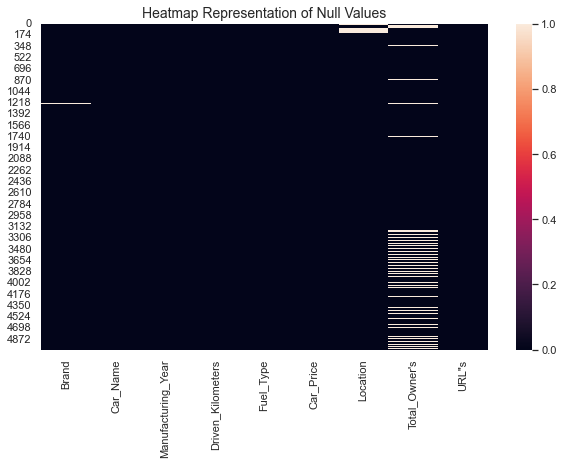

In [236]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title('Heatmap Representation of Null Values',fontsize=14)
plt.show()

In [237]:
##checking out the uniqueness of the columns
df.nunique()

Brand                   39
Car_Name              1639
Manufacturing_Year      23
Driven_Kilometers     2266
Fuel_Type                7
Car_Price             1814
Location               120
Total_Owner's            5
URL"s                 3630
dtype: int64

In [311]:
df['Location'].value_counts()

Mumbai       764
Chennai      742
Bangalore    732
Pune         686
Hyderabad    413
            ... 
Rudrapur       1
Buldhana       1
Surat          1
Indore         1
Udaipur        1
Name: Location, Length: 120, dtype: int64

### Data Visualization
### 1.Histplot

The Value Counts for the attribute "Brand" is
 Maruti Suzuki    1227
Hyundai           732
Mercedes Benz     534
Honda             347
HYUNDAI           225
BMW               182
Ford              165
Renault           164
Toyota            155
Mahindra          154
Tata              150
Audi              110
MG Motors         104
Volkswagen         93
HONDA              90
MINI Cooper        65
Kia                62
Skoda              55
MAHINDRA           45
TOYOTA             45
VOLKSWAGEN         45
Jeep               45
Land Rover         36
Volvo              33
Nissan             31
Porsche            31
Jaguar             31
Datsun             24
Chevrolet          20
Mitsubishi          7
Fiat                4
Isuzu               4
Ssangyong           3
Lamborghini         3
Bentley             3
Lexus               2
Force Motors        2
Aston               1
Daewoo              1
Name: Brand, dtype: int64

The Histtplot Diagram for the attribute "Brand" is
 AxesSubplot(0.12

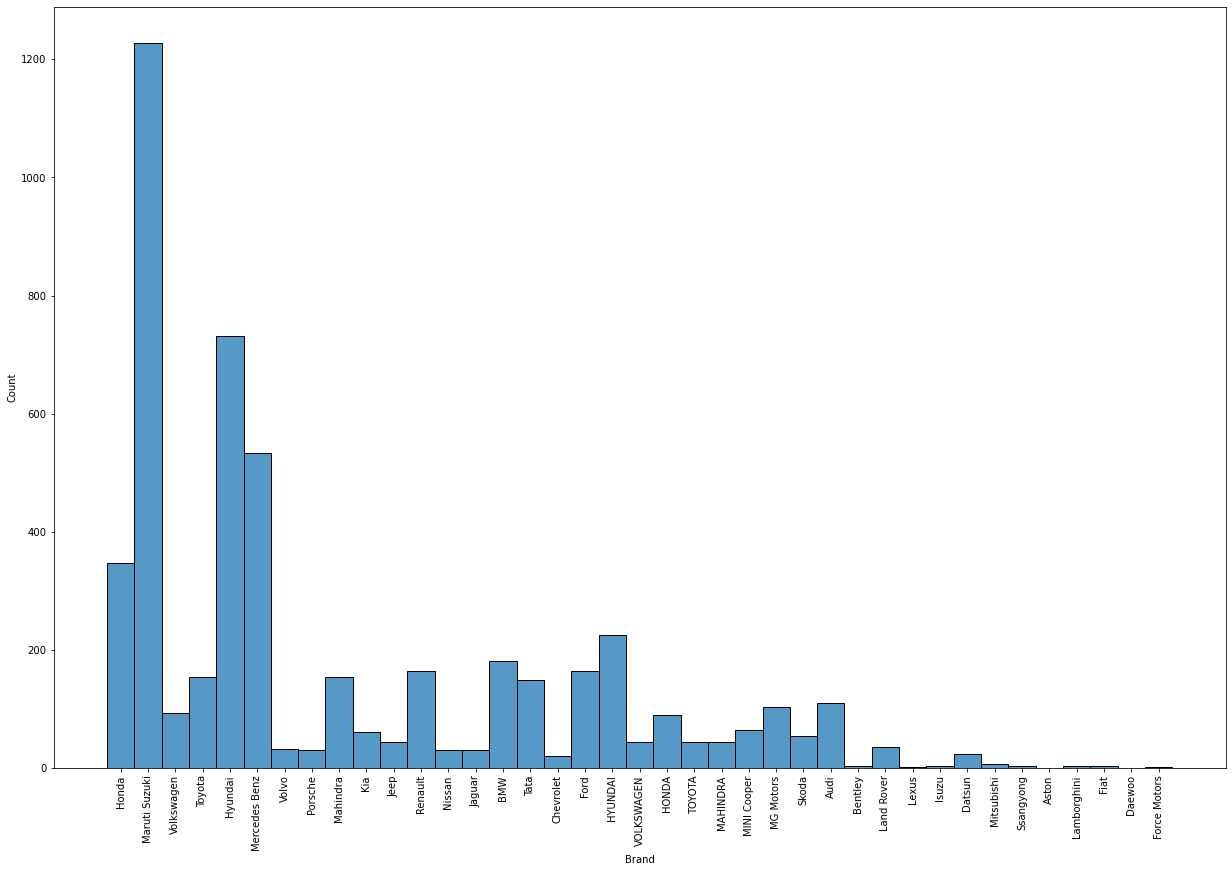



The Value Counts for the attribute "Manufacturing_Year" is
 2019    840
2017    785
2018    605
2016    444
2015    441
2020    425
2021    362
2014    319
2013    204
2012    148
2011    112
2022    111
2010     79
2008     46
2009     43
2007     23
2006     15
2005     14
2004     12
2003      5
2002      2
1999      1
1996      1
Name: Manufacturing_Year, dtype: int64

The Histtplot Diagram for the attribute "Manufacturing_Year" is
 AxesSubplot(0.125,0.125;0.775x0.755)


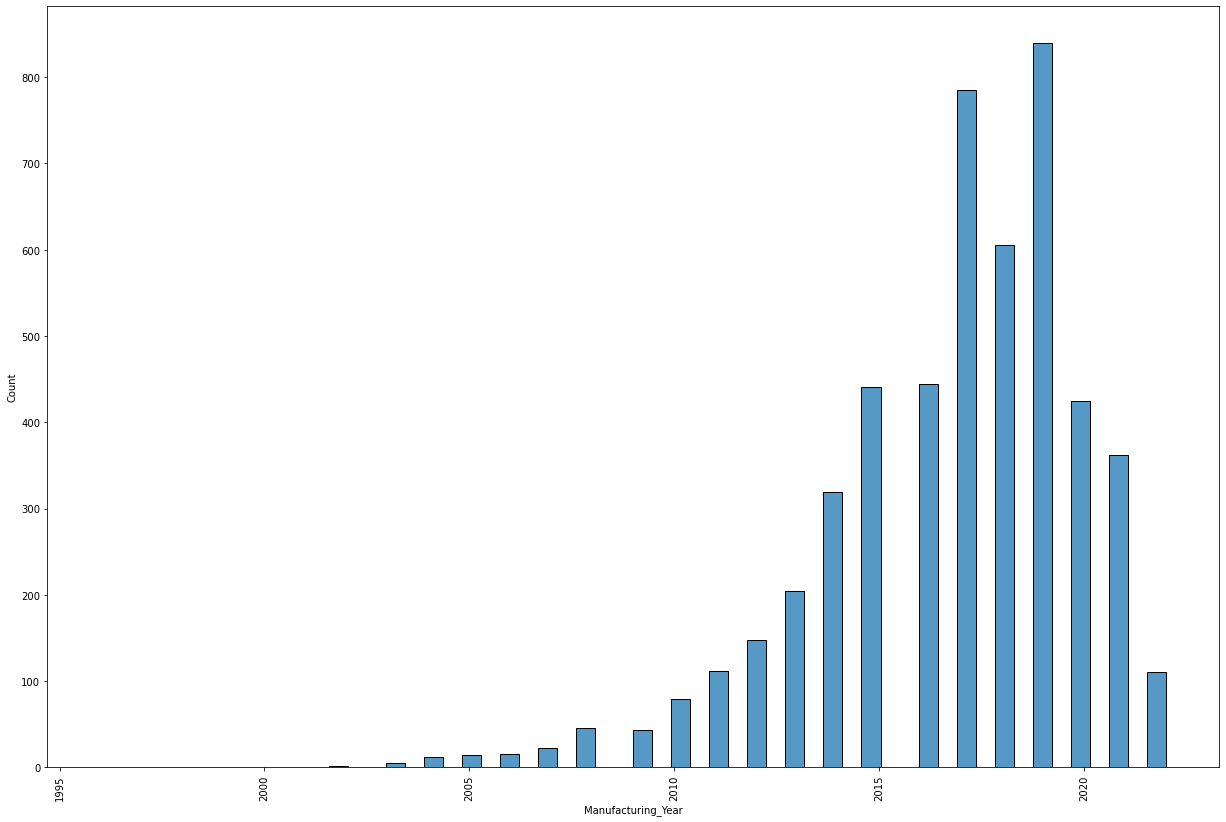



The Value Counts for the attribute "Fuel_Type" is
 0    3206
1    1719
2      62
6      35
4       5
3       5
5       5
Name: Fuel_Type, dtype: int64

The Histtplot Diagram for the attribute "Fuel_Type" is
 AxesSubplot(0.125,0.125;0.775x0.755)


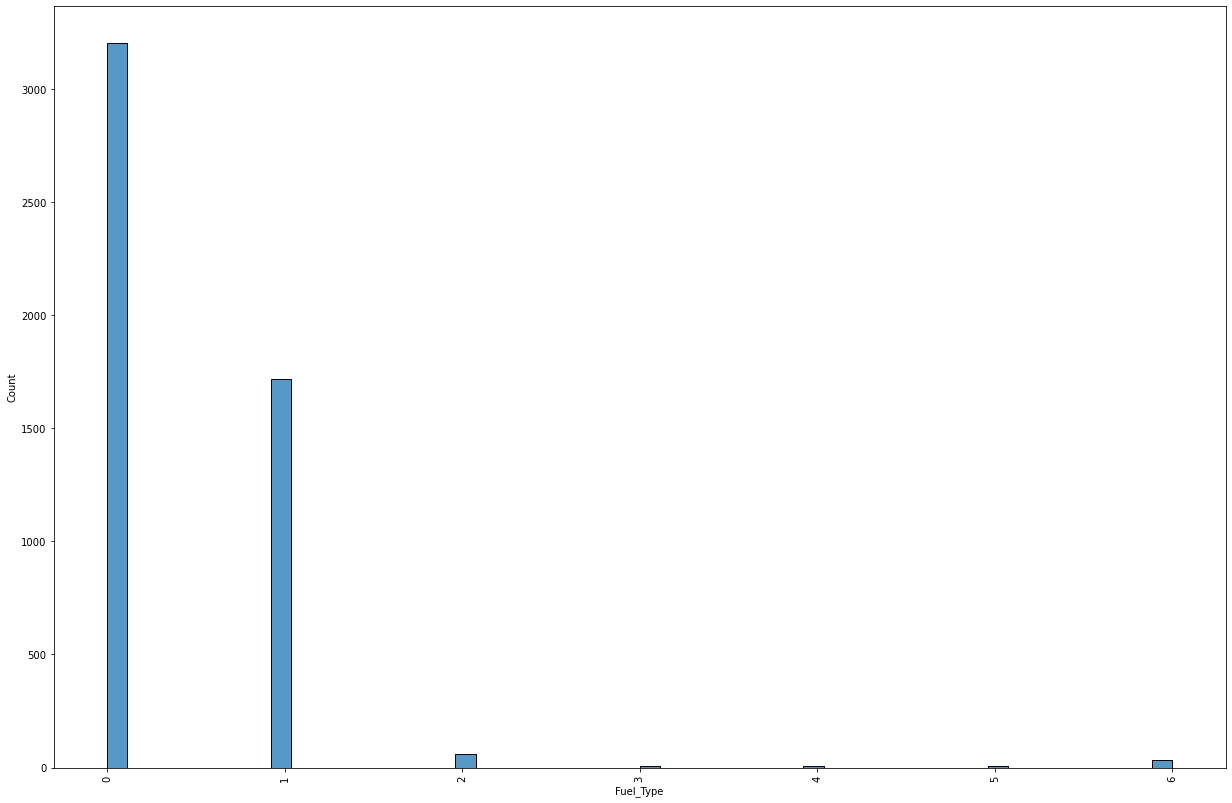



The Value Counts for the attribute "Car_Price" is
 400000.0     105
750000.0      74
925000.0      62
3000000.0     61
900000.0      58
            ... 
522499.0       1
630299.0       1
346399.0       1
295199.0       1
1037699.0      1
Name: Car_Price, Length: 1814, dtype: int64

The Histtplot Diagram for the attribute "Car_Price" is
 AxesSubplot(0.125,0.125;0.775x0.755)


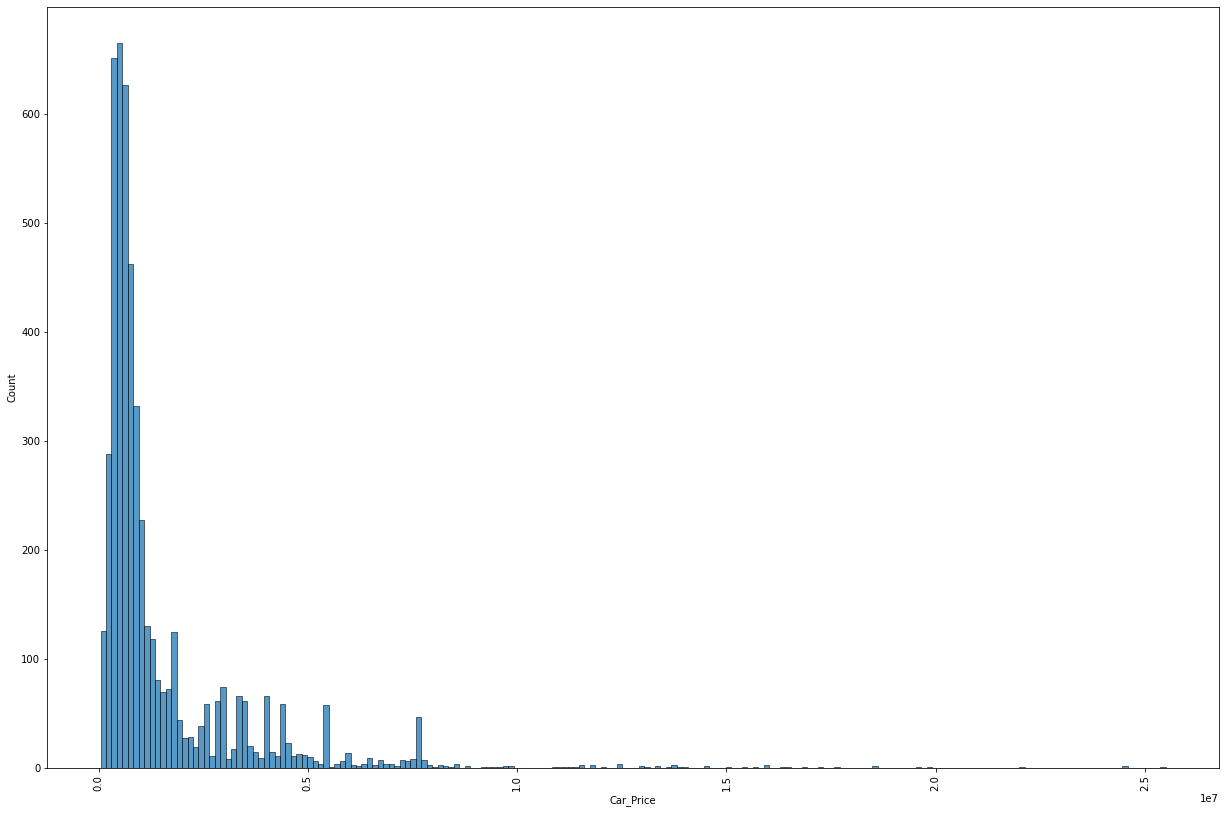



The Value Counts for the attribute "Total_Owner's" is
 1.0    3071
2.0    1243
3.0      99
5.0       1
4.0       1
Name: Total_Owner's, dtype: int64

The Histtplot Diagram for the attribute "Total_Owner's" is
 AxesSubplot(0.125,0.125;0.775x0.755)


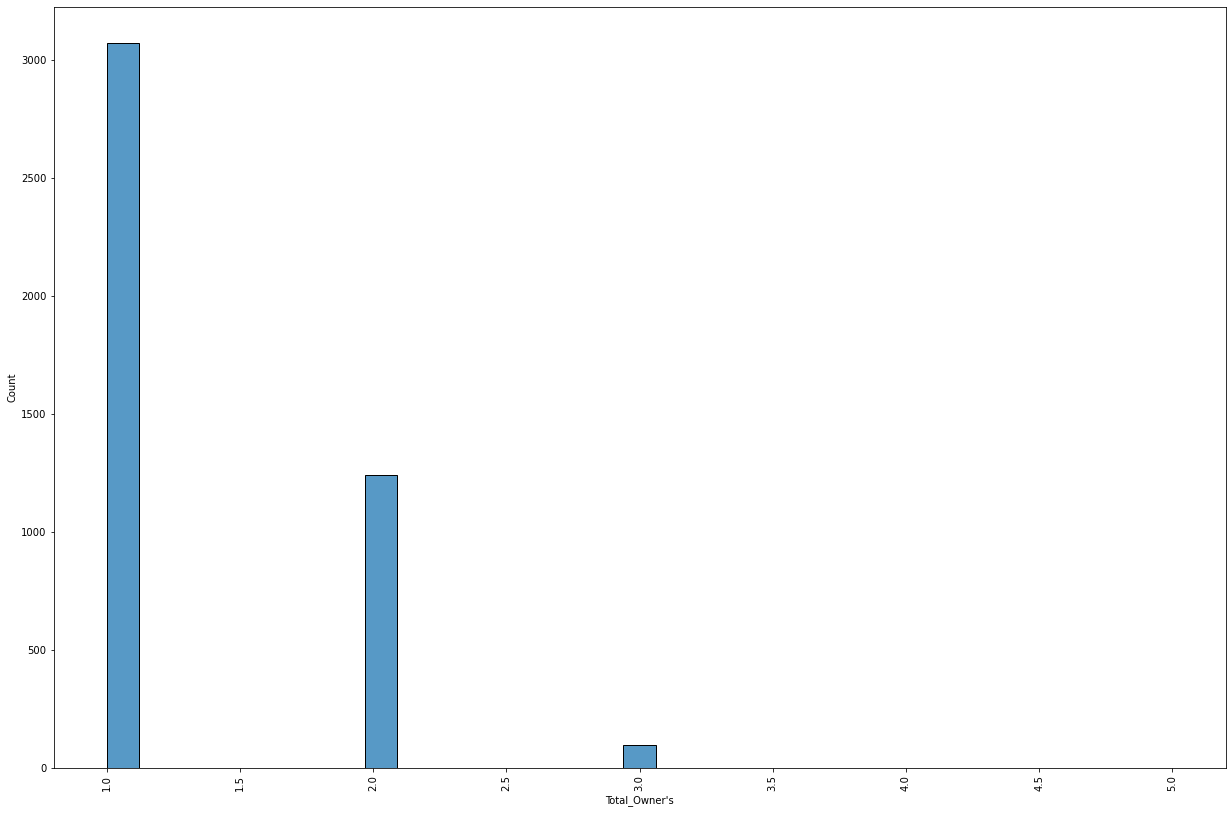

In [50]:
for i in df.columns.drop(['Car_Name','Driven_Kilometers','Location','URL"s']):
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    plt.figure(figsize=(21,14))
    print(f'\nThe Histtplot Diagram for the attribute "{i}" is\n {sns.histplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### This plot basically do the counting of each unique values in a given frequency.

1.Most of the used cars are of the brand "Maruti Suzuki" which is 1227 in numbers and sports cars are in less numbers.

2.Most of the used cars have the "Manufacturing_Year" as 2019 and 2017

3.Most of the used cars are having the fuel type as Petrol which is 3206 in numbers then comes diesel as 1719.

4.Mininmum Used car price is 48k and maximum is 2.5cr

5.Minimum drove kms for used car is 12km and maximum is 9cr km

6.3071 used cars have one owner;1243 used cars have two owner.

7.764 used cars are from Mumbai and 742 are from Chennai

### 2.Scatterplot

The Scatter Plot for the attribute "Car_Price" & "Brand" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


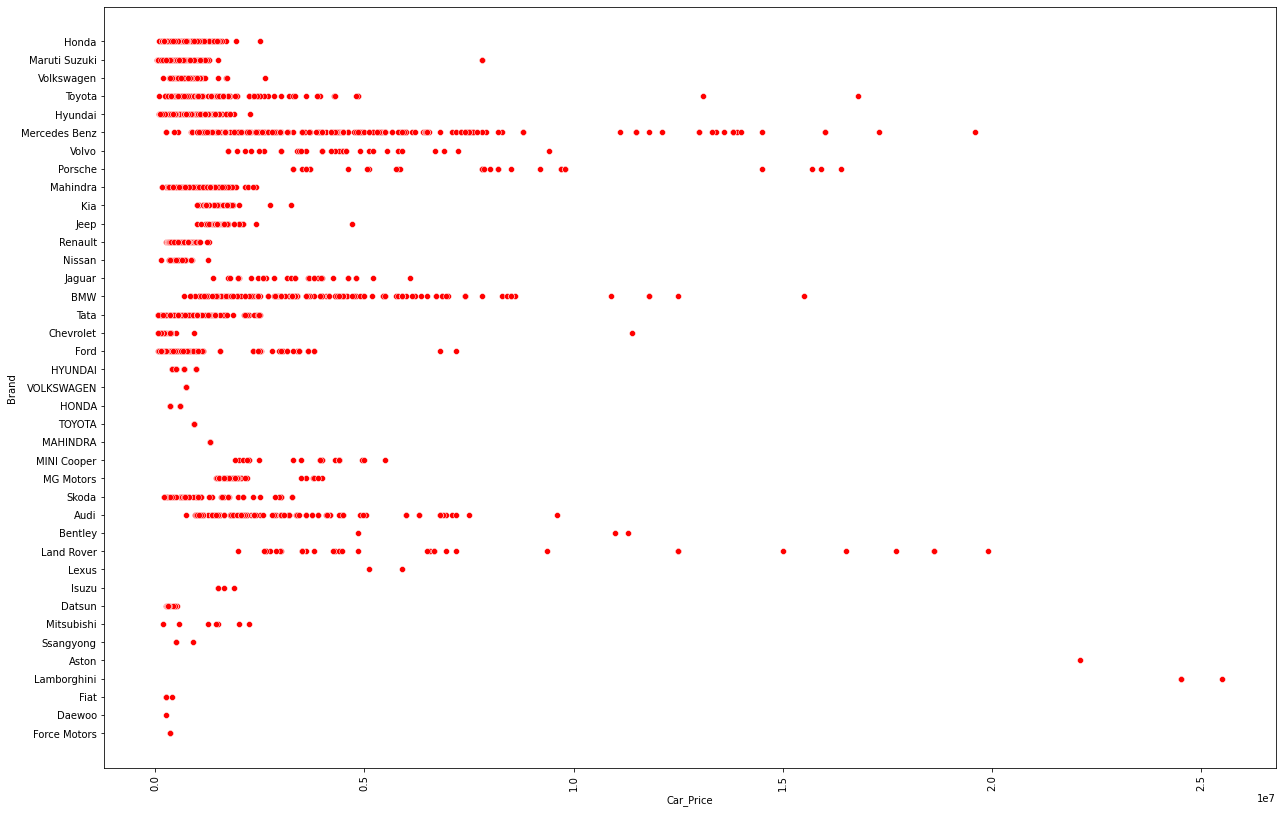



The Scatter Plot for the attribute "Car_Price" & "Manufacturing_Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


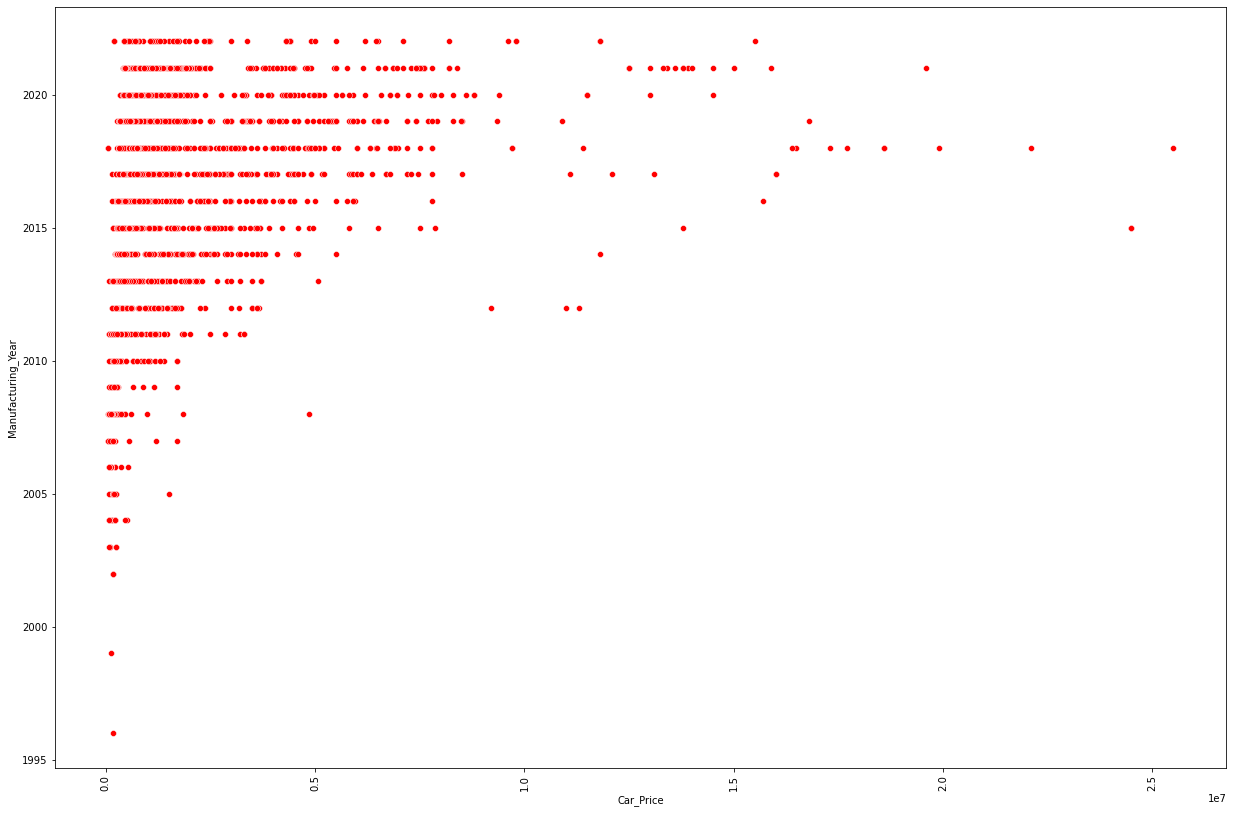



The Scatter Plot for the attribute "Car_Price" & "Fuel_Type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


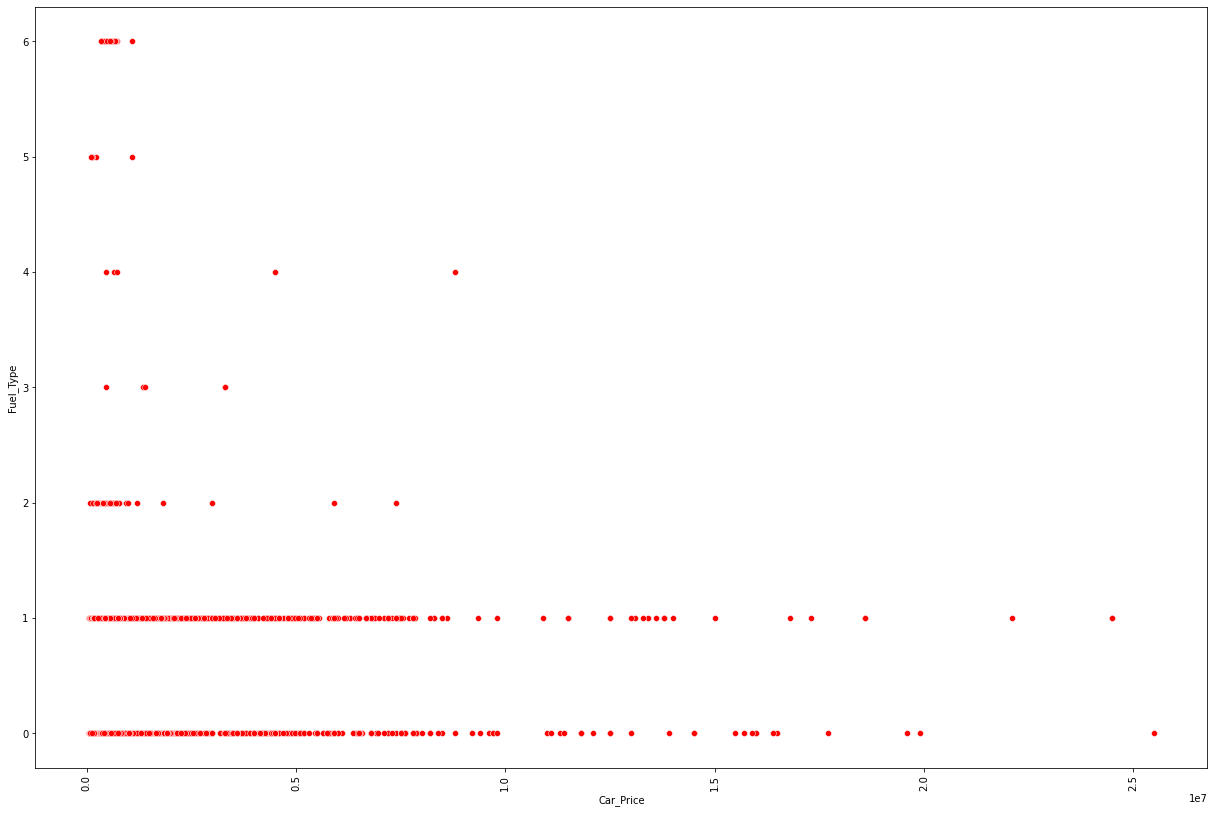



The Scatter Plot for the attribute "Car_Price" & "Total_Owner's" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


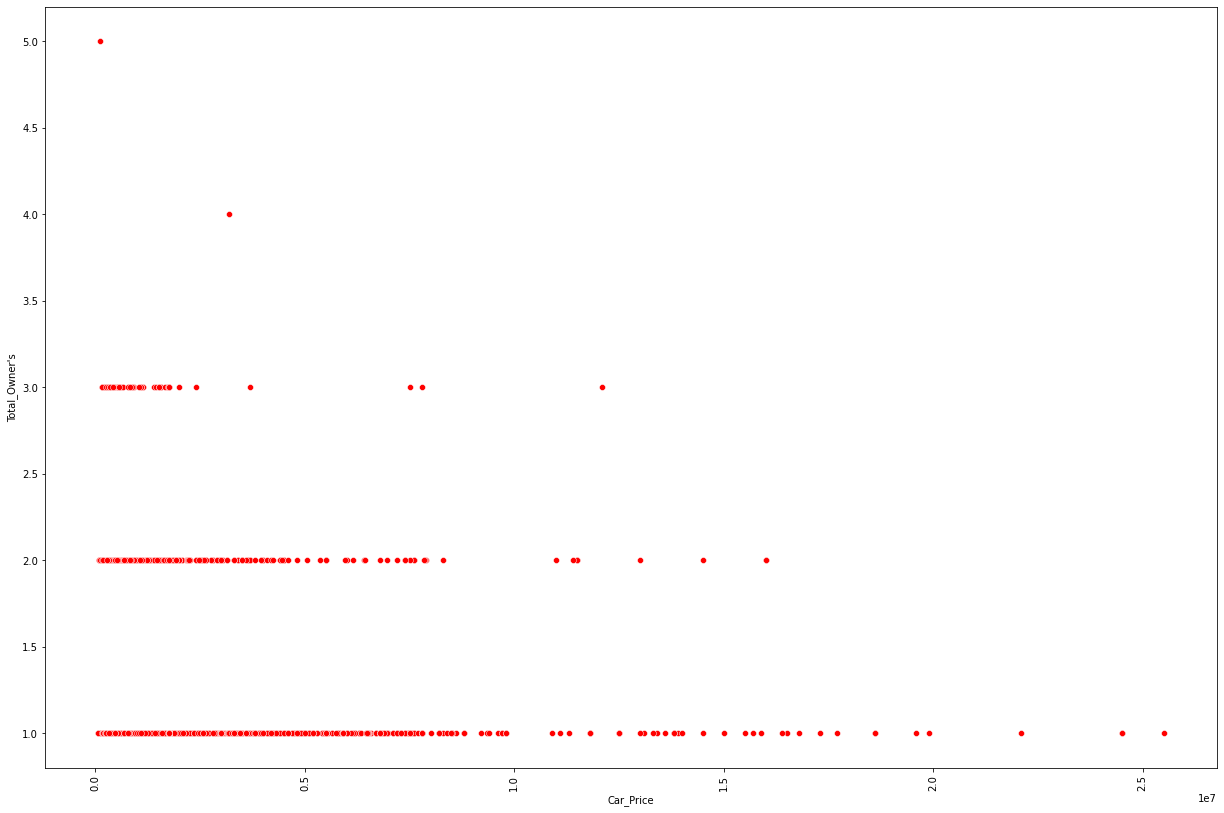

In [59]:
for i in df.columns.drop(['Car_Name','Driven_Kilometers','Car_Price','Location','URL"s']):
    plt.figure(figsize=(21,14))
    print(f'The Scatter Plot for the attribute "Car_Price" & "{i}" is-\n {sns.scatterplot(df["Car_Price"],df[i],color="red")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 3.LinePlot

The Line Plot for the attribute "Car_Price" & "Brand" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


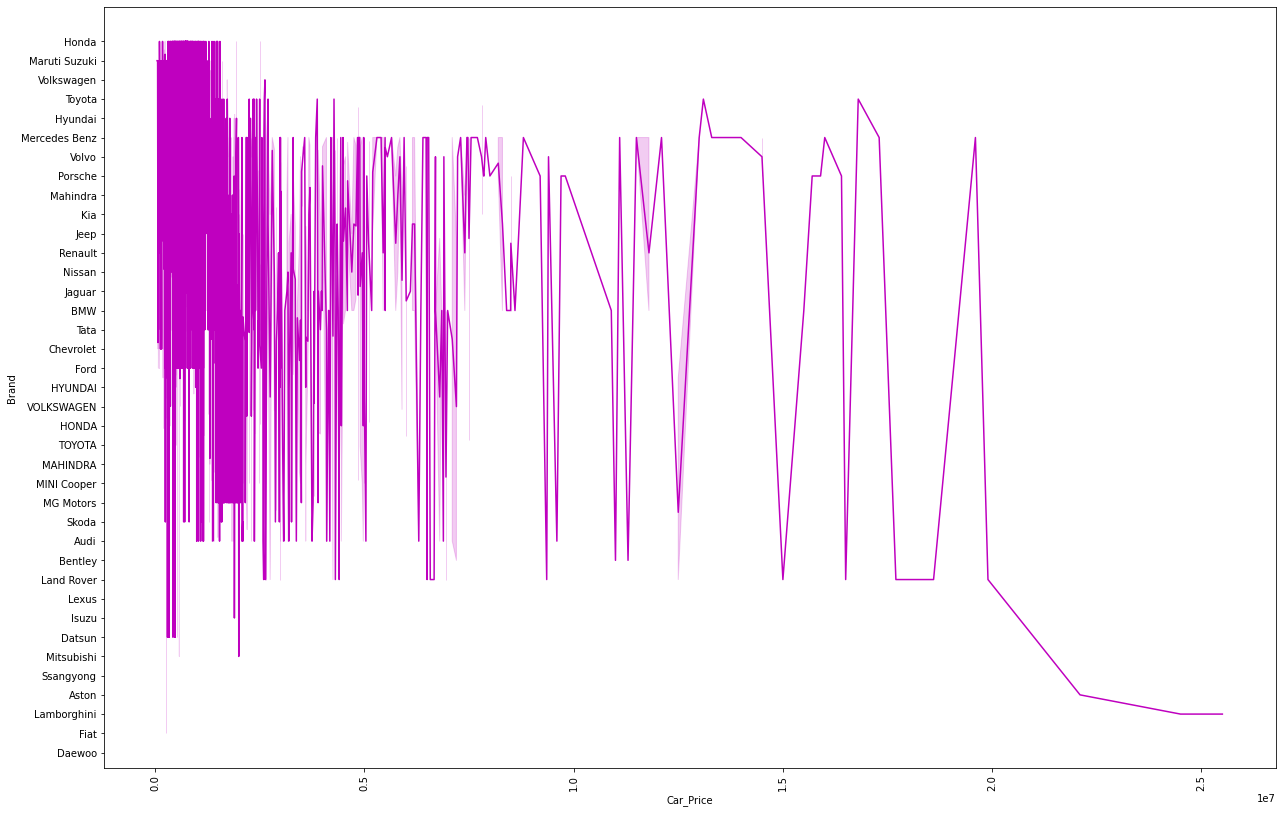



The Line Plot for the attribute "Car_Price" & "Manufacturing_Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


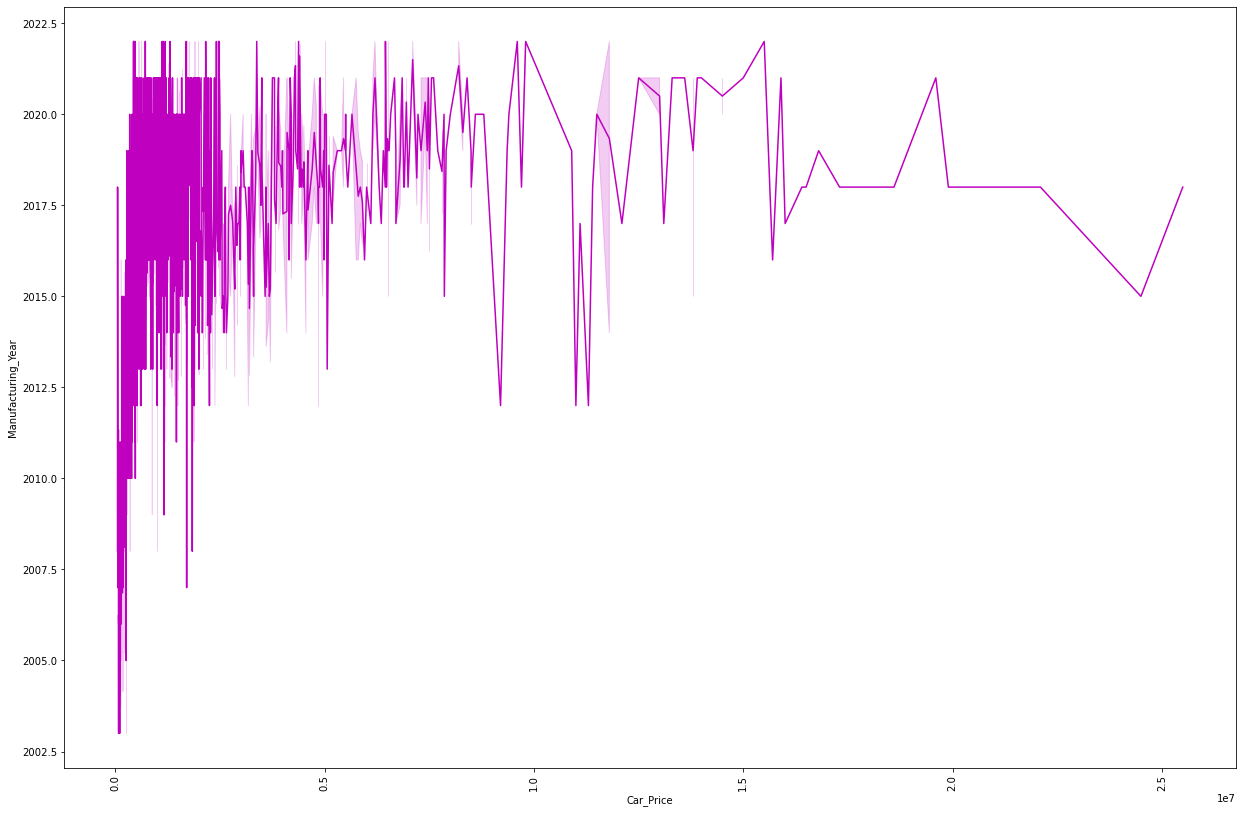



The Line Plot for the attribute "Car_Price" & "Fuel_Type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


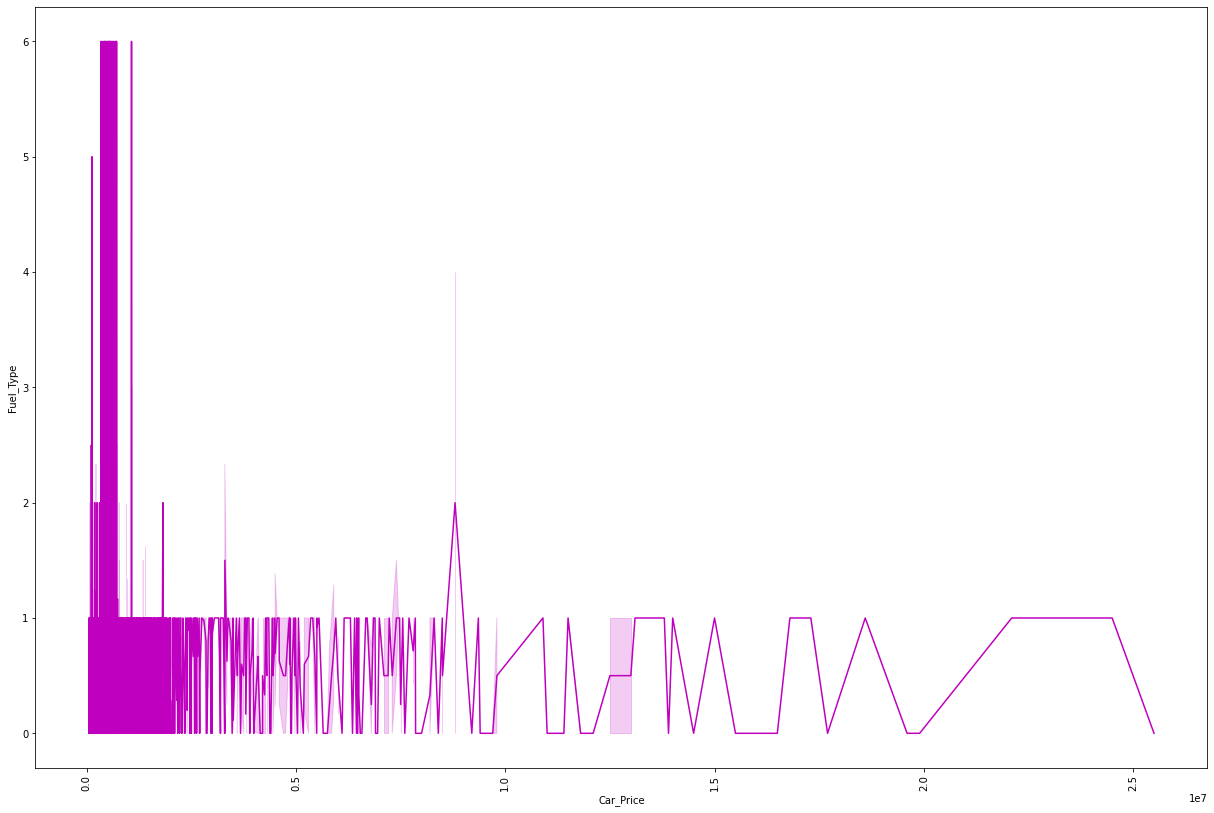



The Line Plot for the attribute "Car_Price" & "Total_Owner's" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


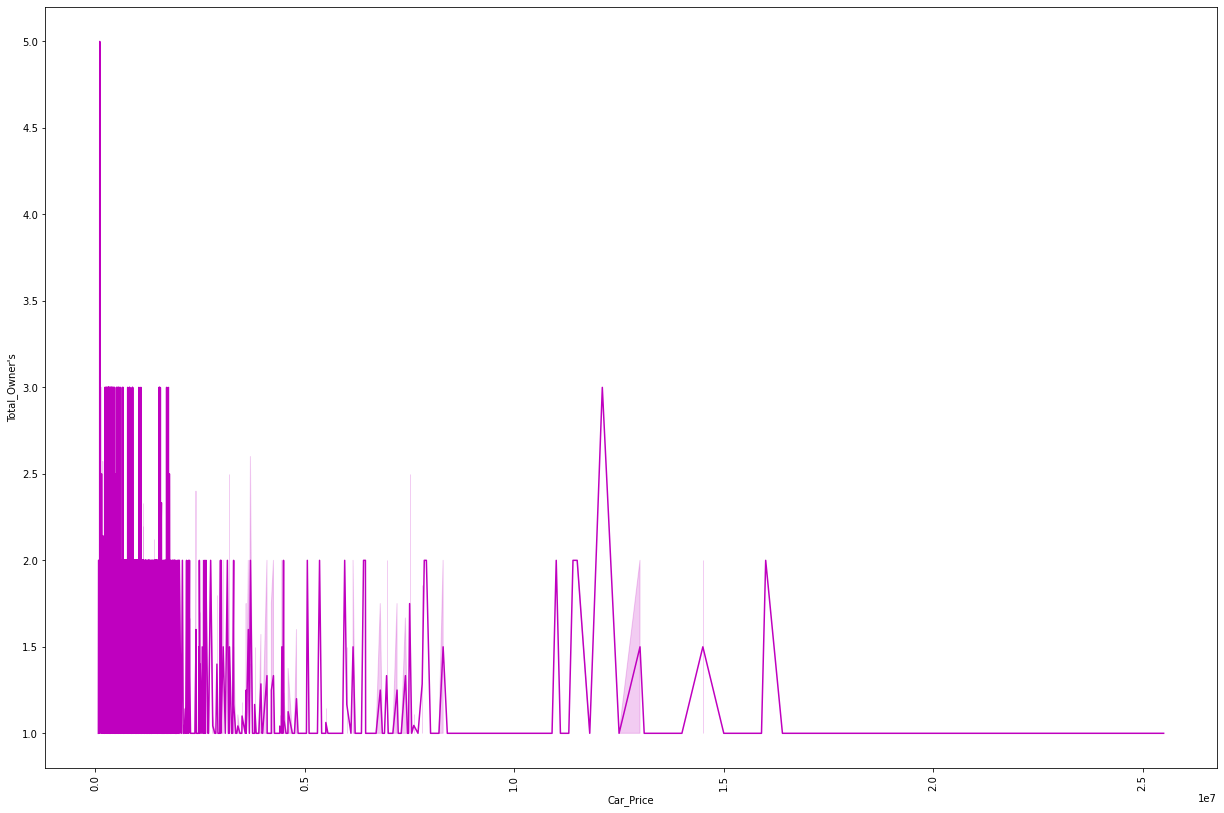

In [61]:
for i in df.columns.drop(['Car_Name','Driven_Kilometers','Car_Price','Location','URL"s']):
    plt.figure(figsize=(21,14))
    print(f'The Line Plot for the attribute "Car_Price" & "{i}" is-\n {sns.lineplot(df["Car_Price"],df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 4.Categorical Plot

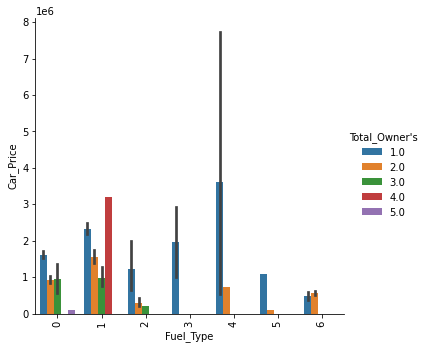

In [65]:
sns.catplot(x='Fuel_Type',y='Car_Price',hue="Total_Owner's",data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

The used cars those have fuel type as Hybrid i.e. diesel/Petrol both are having maximum 2 owners only and the price is more than 30 Lakhs.Used car having fuel type Diesel and having 4 owners have price more than 30Lakhs.
the used car having fuel type Petrol+CNG have less car price and haing atleast two owners maximum.

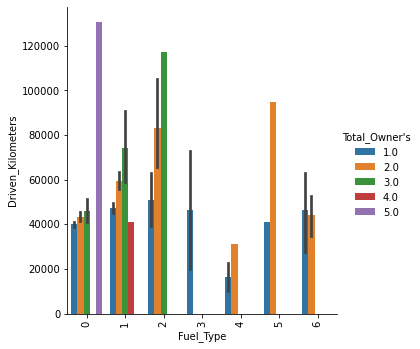

In [66]:
sns.catplot(x='Fuel_Type',y='Driven_Kilometers',hue="Total_Owner's",data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

The used cars having fuel type as Petrol are already droven more than 1.2L kms. 

<Figure size 2160x1656 with 0 Axes>

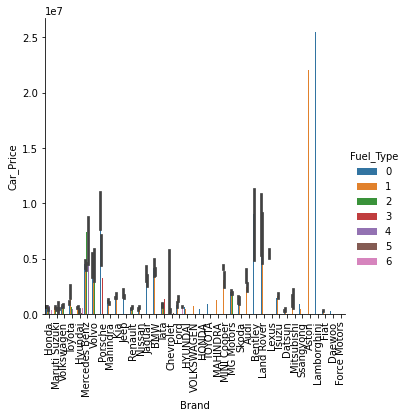

In [76]:
plt.figure(figsize=(30,23))
sns.catplot(x='Brand',y='Car_Price',hue='Fuel_Type',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

The used cars Bentley and Land Rover have carprice more than 1Cr.

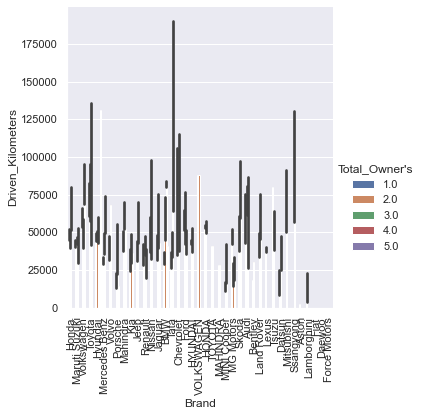

In [80]:
sns.set(rc={'figure.figsize':(25,20)})
sns.catplot(x='Brand',y='Driven_Kilometers',hue="Total_Owner's",data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

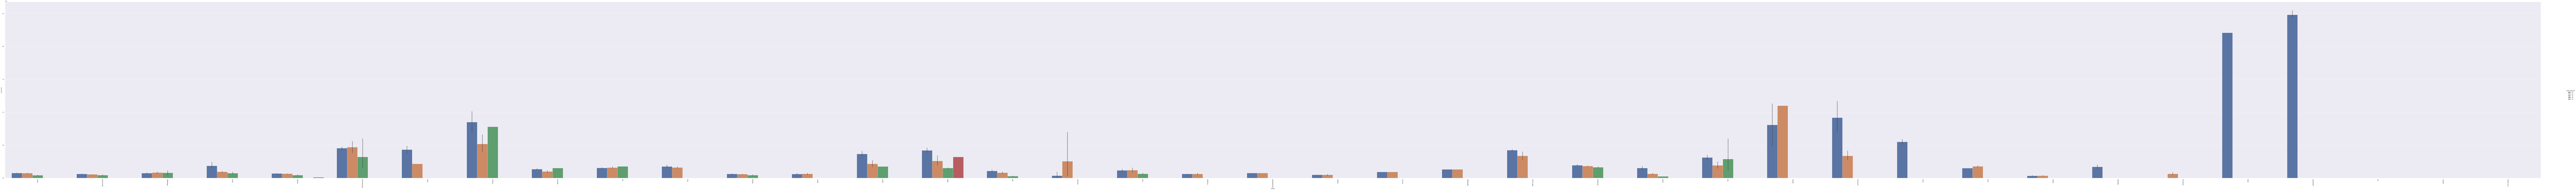

In [85]:
sns.catplot(x='Brand',y='Car_Price',hue="Total_Owner's",data=df,kind='bar',height=23, aspect=14)
plt.xticks(rotation=90)
plt.show()

### SimpleImputer
##### To replace nan values of categorical and numeric columns w.r.t. mode and mean/median

In [238]:
from sklearn.impute import SimpleImputer

In [239]:
#replacing nan of numerical columns with mean
for i in numeric_columns:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[i].values.reshape(-1,1))

In [240]:
#replacing nan of categorical columns with mode
for i in categorical_columns:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [241]:
df.isnull().sum().sum()

0

###### We've successfully replaced all the nan values present in the dataset.

### Encoding
##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
### Label Encoder

In [242]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [243]:
for j in categorical_columns:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [244]:
df.head()

Brand  Car_Name  Manufacturing_Year  Driven_Kilometers  Fuel_Type  \
0     12       286              2020.0            38906.0        0.0   
1     25       844              2017.0            38203.0        0.0   
2     37      1591              2016.0            69414.0        0.0   
3     12       303              2020.0            21261.0        0.0   
4     12       326              2016.0            39821.0        0.0   

   Car_Price  Location  Total_Owner's  URL"s  
0  1003000.0         0       1.327973      5  
1   643000.0         0       1.000000     39  
2   515000.0         0       1.327973     57  
3  1299000.0         0       1.327973      6  
4   605000.0         0       1.327973      8

In [245]:
df.tail()

Brand  Car_Name  Manufacturing_Year  Driven_Kilometers  Fuel_Type  \
5032     13       611              2018.0            69000.0        1.0   
5033     13       438              2017.0            73600.0        0.0   
5034      1        37              2014.0            66027.0        1.0   
5035      1        37              2014.0            93752.0        1.0   
5036     13       387              2013.0            50000.0        1.0   

      Car_Price  Location  Total_Owner's  URL"s  
5032   750000.0       116       1.327973   2448  
5033   420000.0       101       1.327973   3585  
5034  1089449.0        43       1.000000   3561  
5035  1037699.0        79       3.000000   3562  
5036   425000.0        62       3.000000   2436

In [246]:
df.sample()

Brand  Car_Name  Manufacturing_Year  Driven_Kilometers  Fuel_Type  \
902     26       720              2017.0            13127.0        0.0   

     Car_Price  Location  Total_Owner's  URL"s  
902  2600000.0        73            1.0    154

### 5.ViolinPlot

The Violin-Plot for the attribute "Brand" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


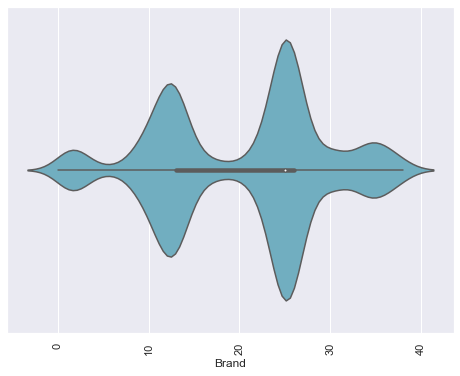



The Violin-Plot for the attribute "Car_Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


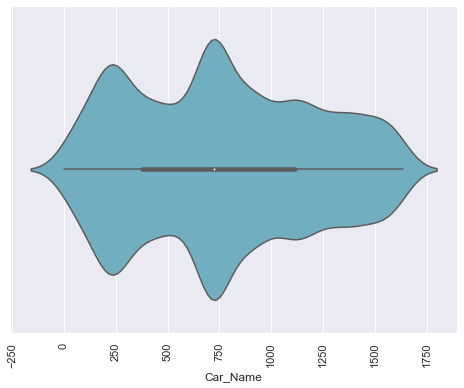



The Violin-Plot for the attribute "Manufacturing_Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


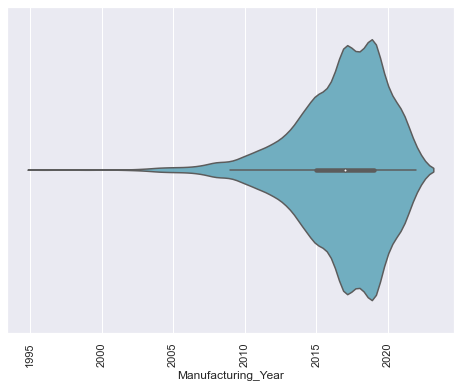



The Violin-Plot for the attribute "Driven_Kilometers" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


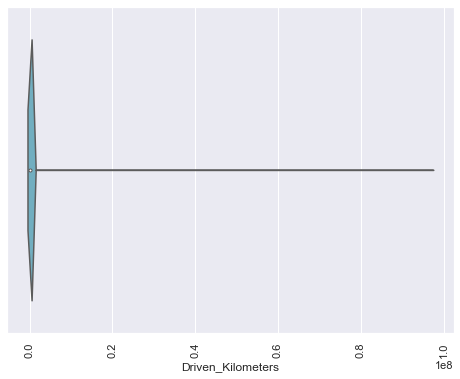



The Violin-Plot for the attribute "Fuel_Type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


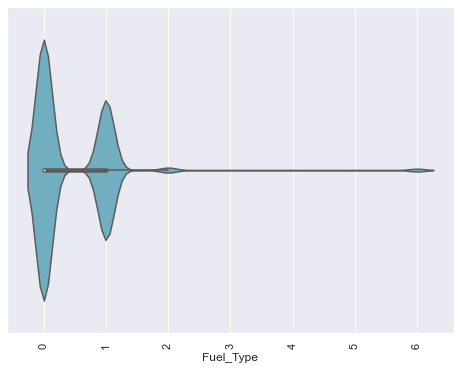



The Violin-Plot for the attribute "Car_Price" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


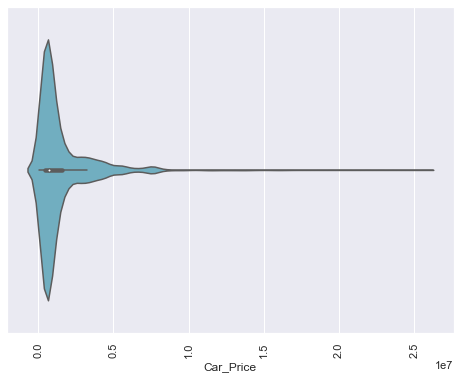



The Violin-Plot for the attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


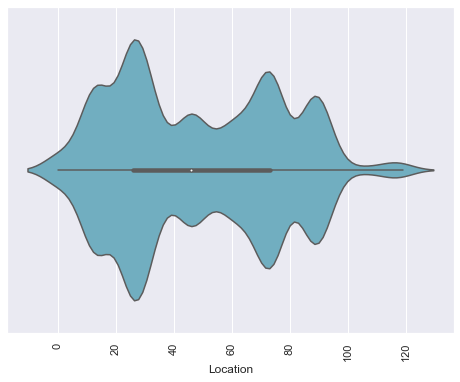



The Violin-Plot for the attribute "Total_Owner's" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


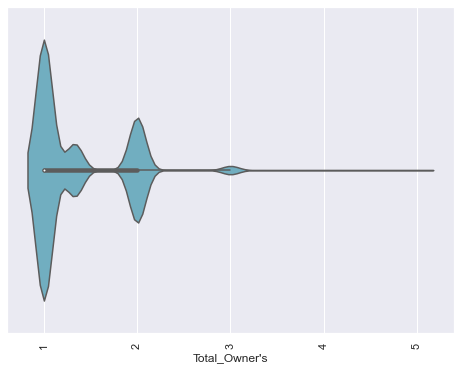



The Violin-Plot for the attribute "URL"s" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


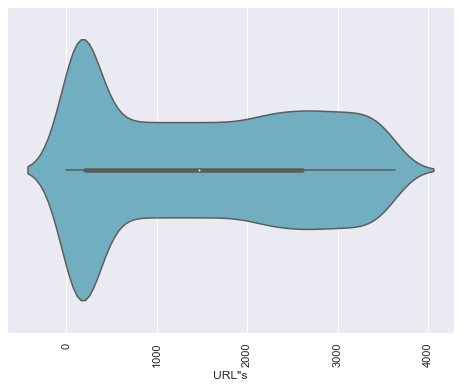

In [117]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 6.Pairplot

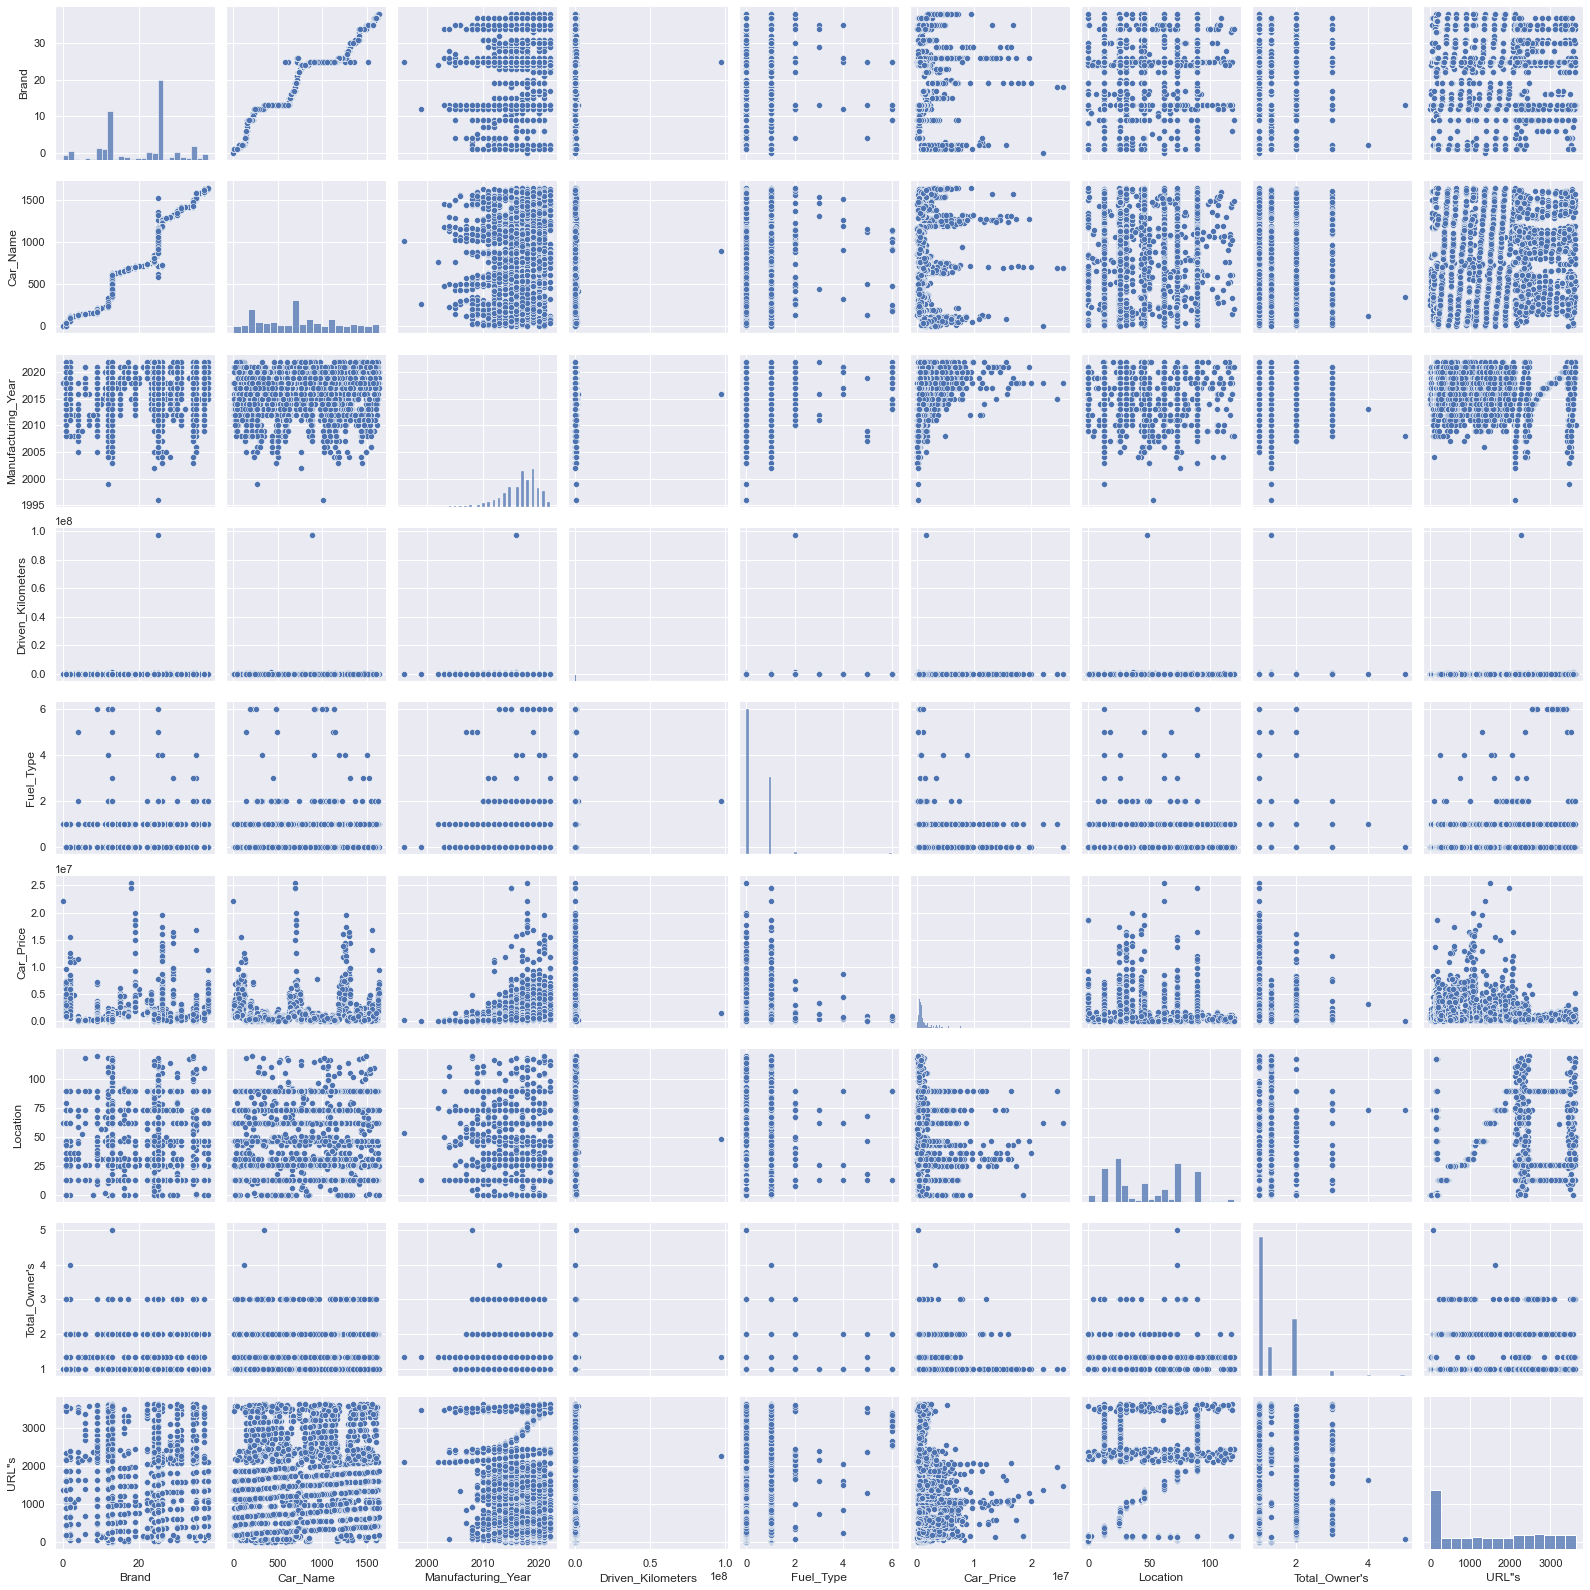

In [118]:
sns.pairplot(df)
plt.show()

### Descriptive Statistics

In [247]:
df.describe().T

count          mean           std      min       25%  \
Brand               5037.0  2.035517e+01  9.140067e+00      0.0      13.0   
Car_Name            5037.0  7.627812e+02  4.412492e+02      0.0     378.0   
Manufacturing_Year  5037.0  2.016778e+03  3.240655e+00   1996.0    2015.0   
Driven_Kilometers   5037.0  6.672427e+04  1.366970e+06     12.0   24419.0   
Fuel_Type           5037.0  4.194957e-01  7.172289e-01      0.0       0.0   
Car_Price           5037.0  1.516062e+06  2.090507e+06  48000.0  480000.0   
Location            5037.0  4.832023e+01  2.860239e+01      0.0      26.0   
Total_Owner's       5037.0  1.327973e+00  4.859208e-01      1.0       1.0   
URL"s               5037.0  1.539794e+03  1.177212e+03      0.0     204.0   

                         50%        75%         max  
Brand                   25.0       26.0        38.0  
Car_Name               722.0     1116.0      1638.0  
Manufacturing_Year    2017.0     2019.0      2022.0  
Driven_Kilometers    42919.0    62097.0  97018836.0  
Fuel_Type                0.0        1.0         6.0  
Car_Price           735000.0  1588000.0  25500000.0  
Location                46.0       73.0       119.0  
Total_Owner's            1.0        2.0         5.0  
URL"s                 1463.0     2608.0      3629.0

We can see that attributes Driven_Kilometers and Car_Price have outliers presence as the IQR diffeeence is varaying

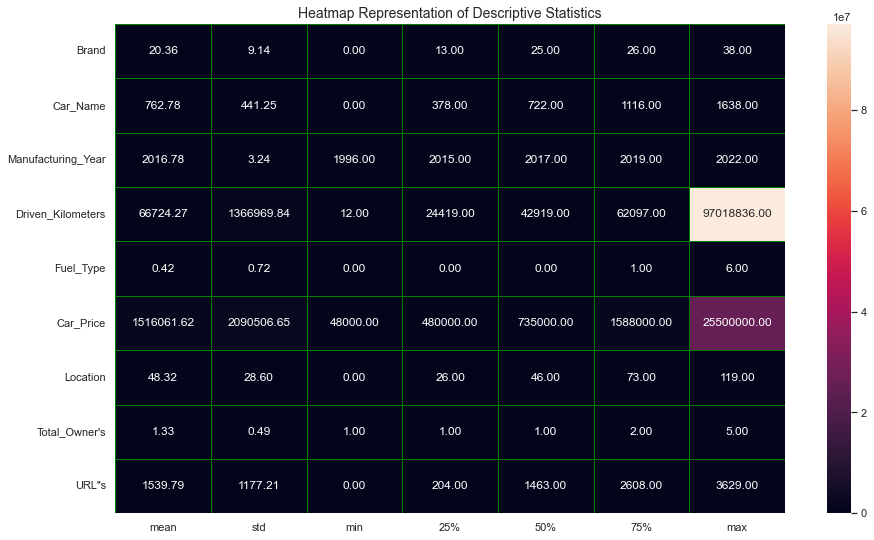

In [248]:
plt.figure(figsize=(15,9))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

### Correlation

In [249]:
df.corr()['Car_Price'].sort_values()

URL"s                -0.275994
Total_Owner's        -0.162905
Driven_Kilometers    -0.005842
Brand                 0.003762
Car_Name              0.011195
Location              0.043975
Fuel_Type             0.062337
Manufacturing_Year    0.301660
Car_Price             1.000000
Name: Car_Price, dtype: float64

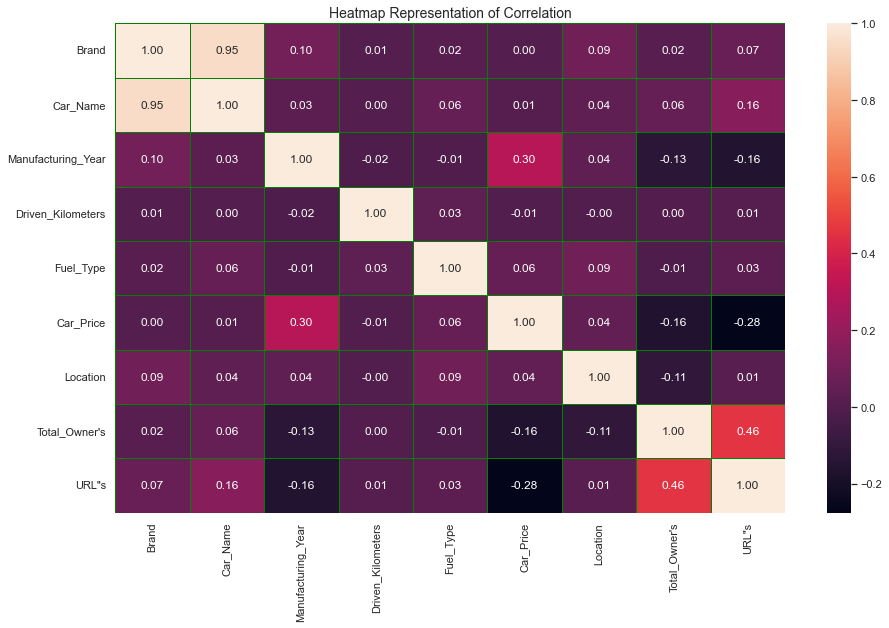

In [250]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

See, there are three attributes having negative values and its showing us that there is negative correlation b/w Car_Price (which is our target variable) and other respective Negative attributes.Hence will remove, all the negative correlated columns which are very close to zero, later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

### Multicollinearity

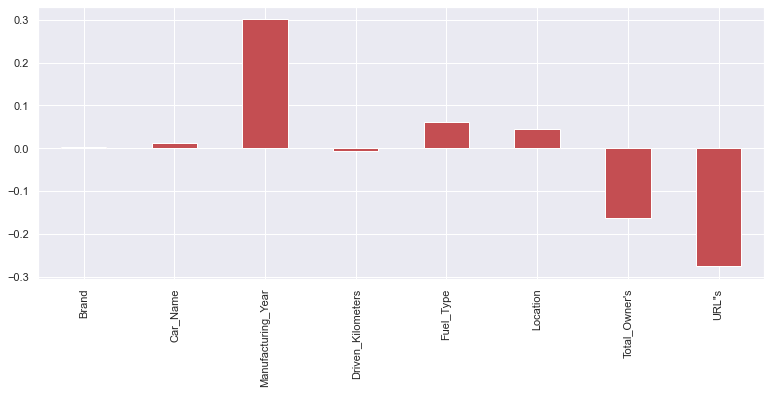

In [251]:
plt.figure(figsize=(13,5))
df.corr()['Car_Price'].drop(['Car_Price']).plot(kind='bar',color='r')
plt.show()

##### i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.
### Skewness

In [252]:
df.skew().sort_values()

Manufacturing_Year    -1.103081
Brand                 -0.241860
Car_Name               0.194442
URL"s                  0.198685
Location               0.246414
Total_Owner's          1.385567
Fuel_Type              3.888894
Car_Price              4.045641
Driven_Kilometers     70.873443
dtype: float64

The threshold value of Skewness is +/=0.5. Attributes- Brand,Car_Name,URL"s,Location are only in the range while others are either skewed right or left. will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

### Distribution Plot
##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute "Brand" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


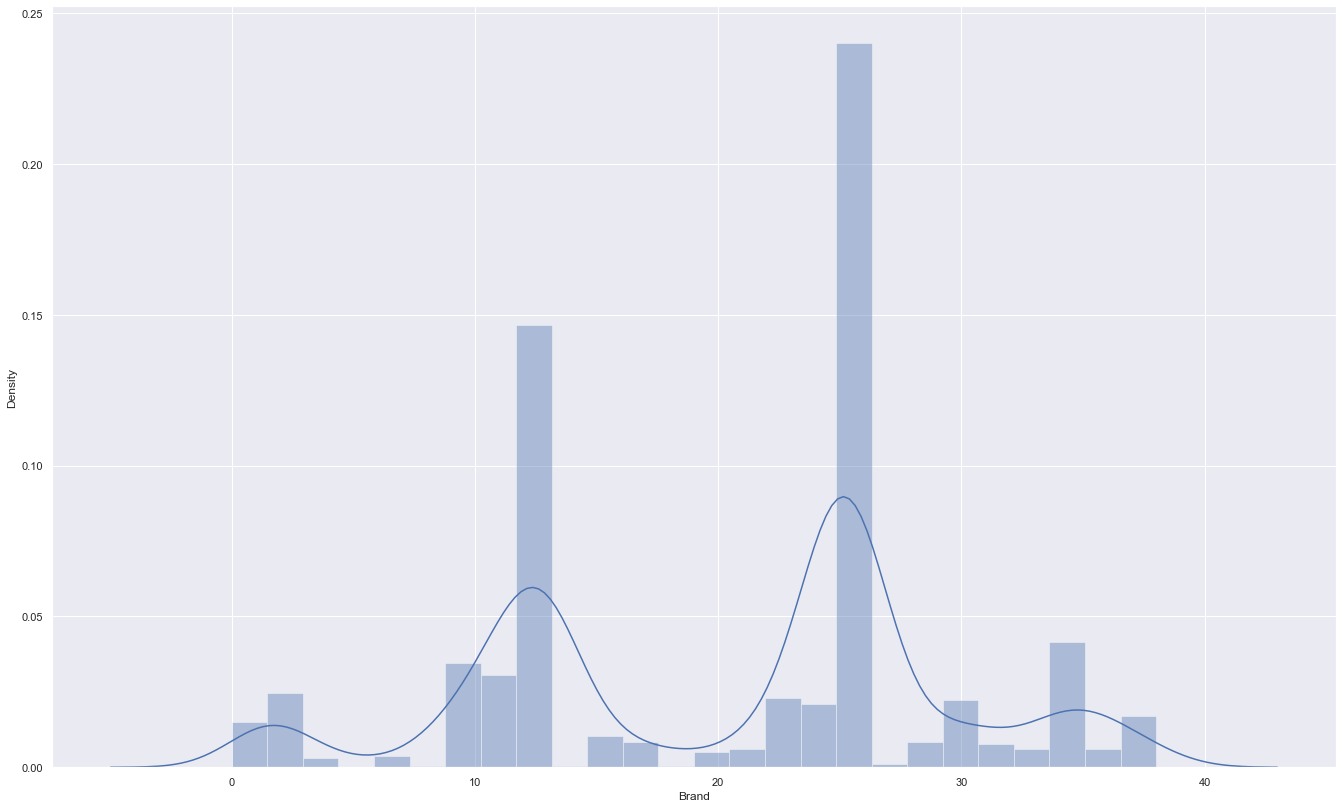



The Distribution Plot for attribute "Car_Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


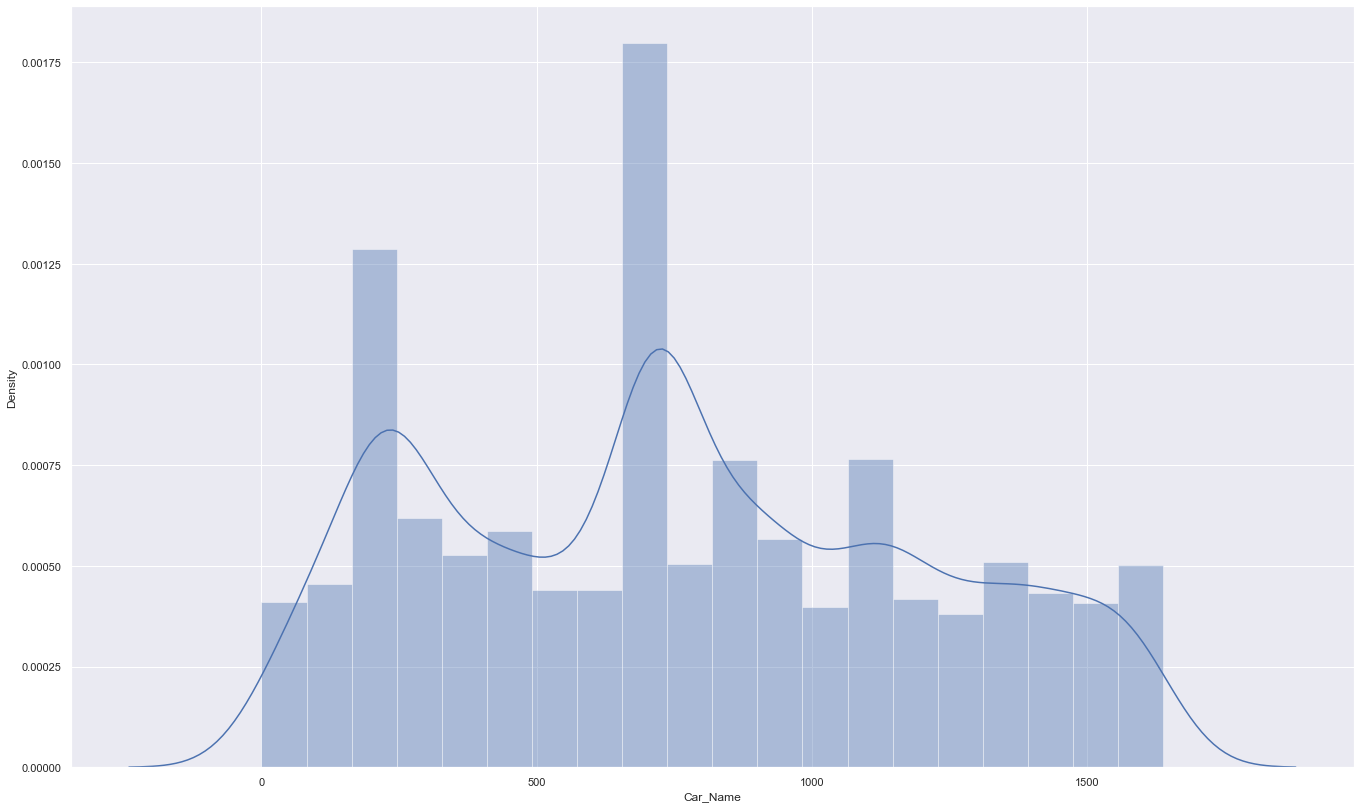



The Distribution Plot for attribute "Manufacturing_Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


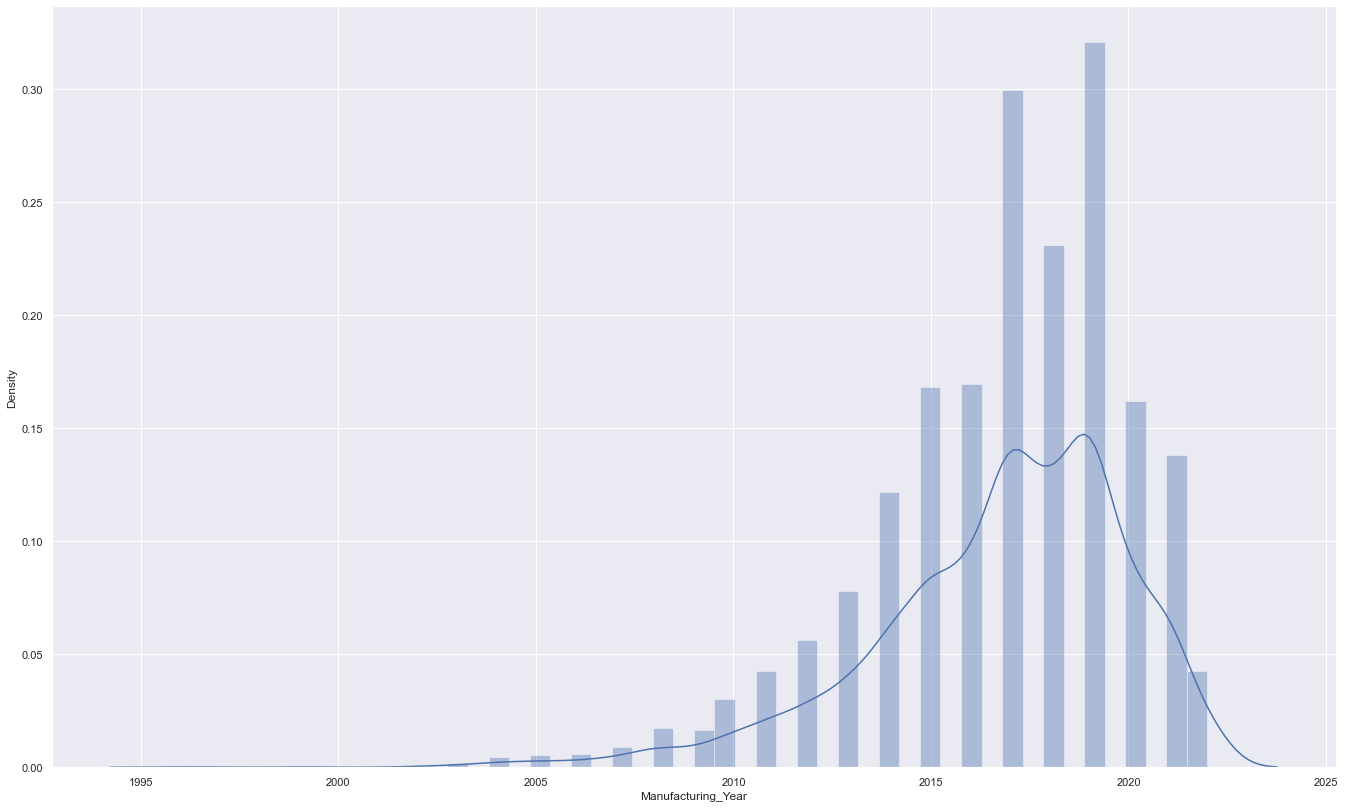



The Distribution Plot for attribute "Driven_Kilometers" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


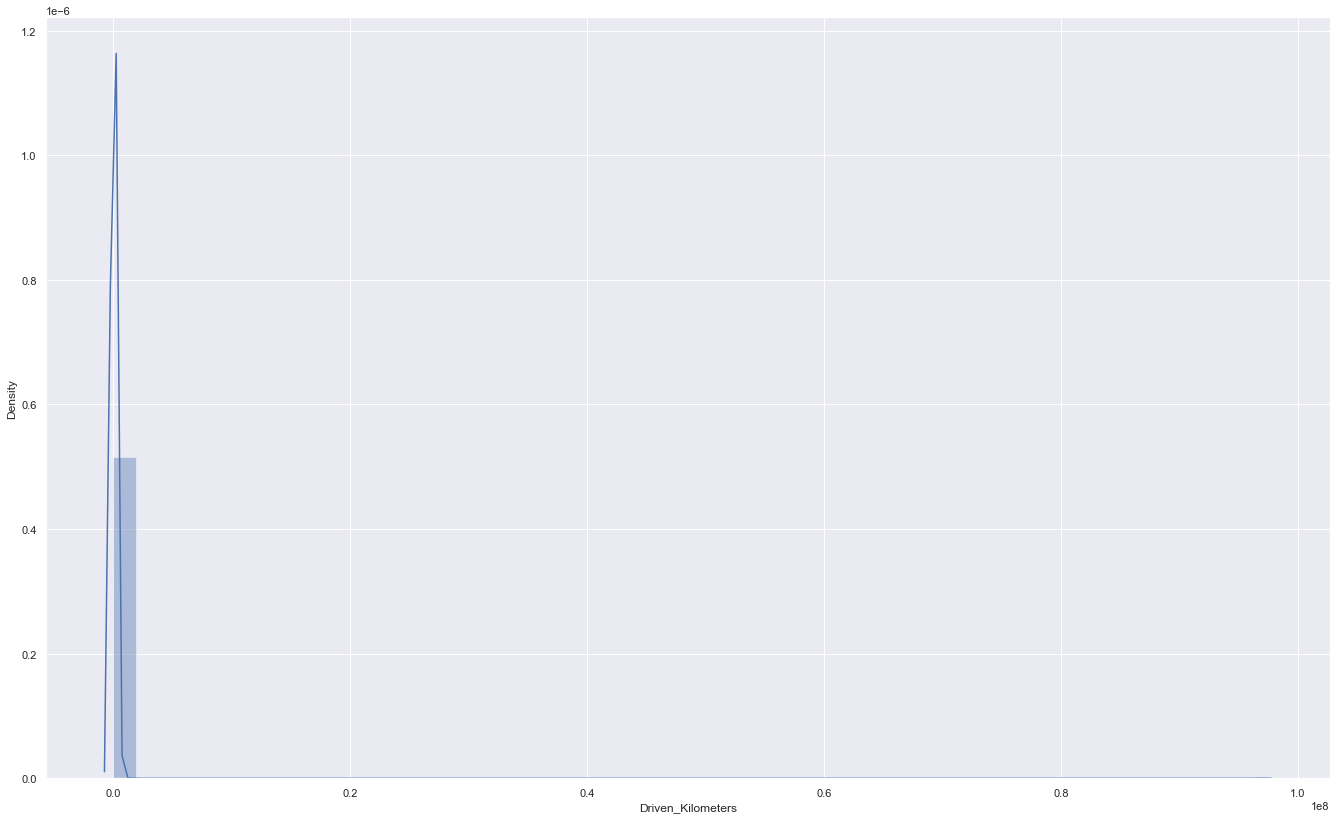



The Distribution Plot for attribute "Fuel_Type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


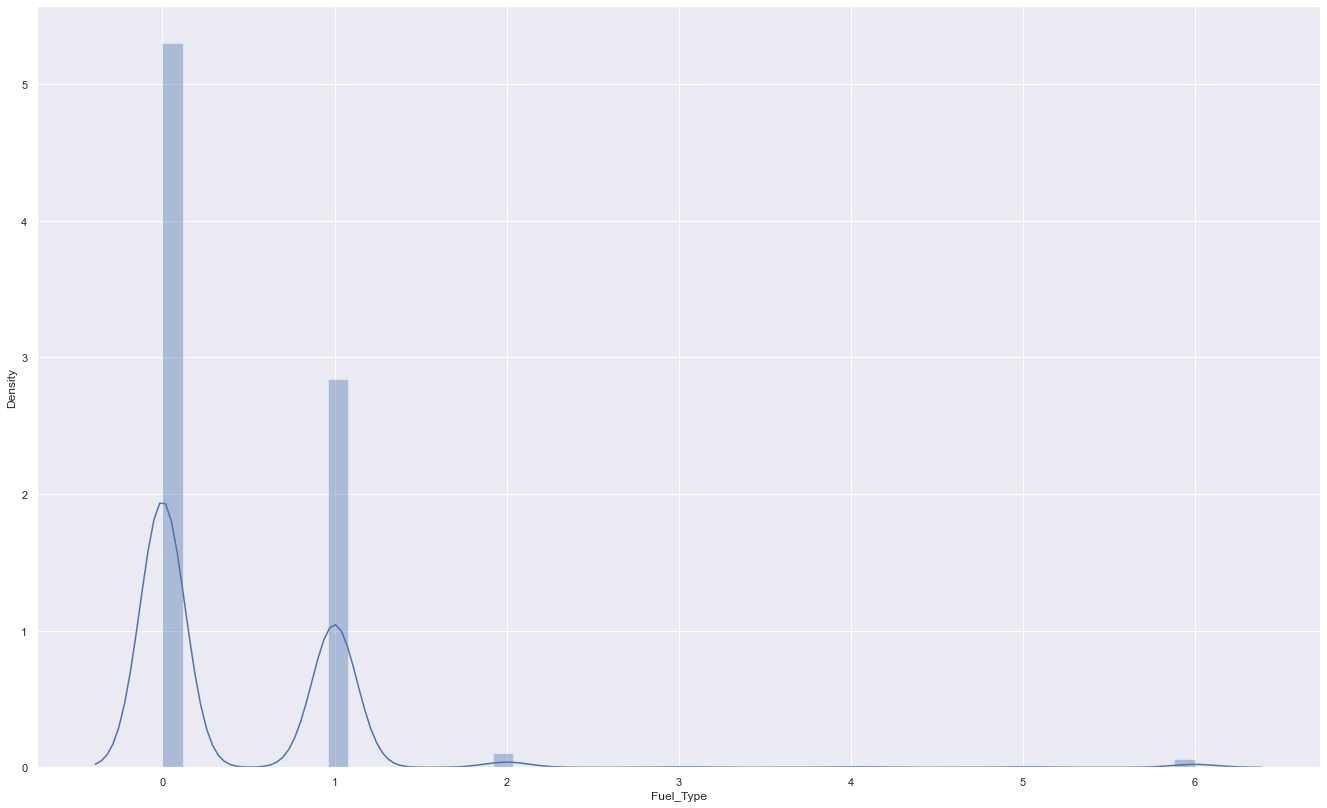



The Distribution Plot for attribute "Car_Price" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


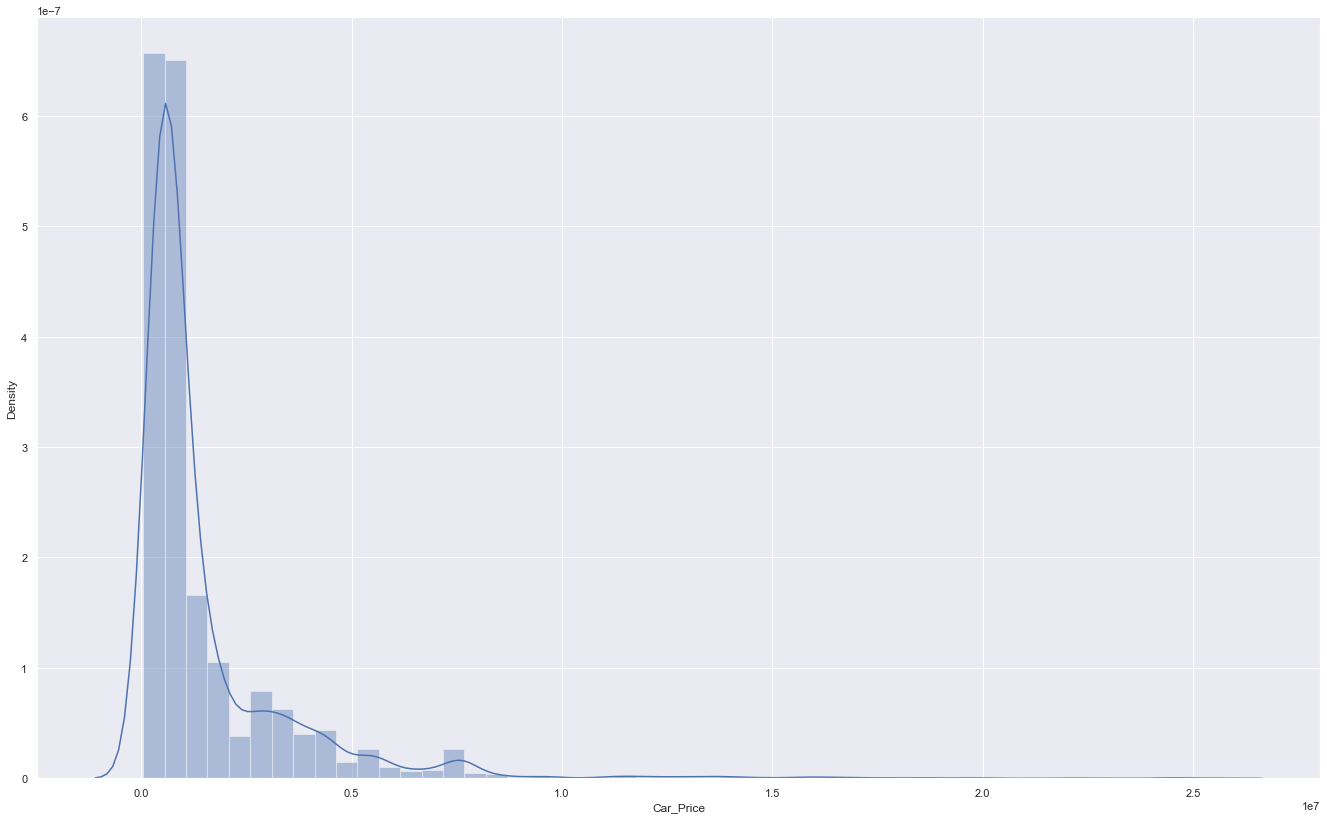



The Distribution Plot for attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


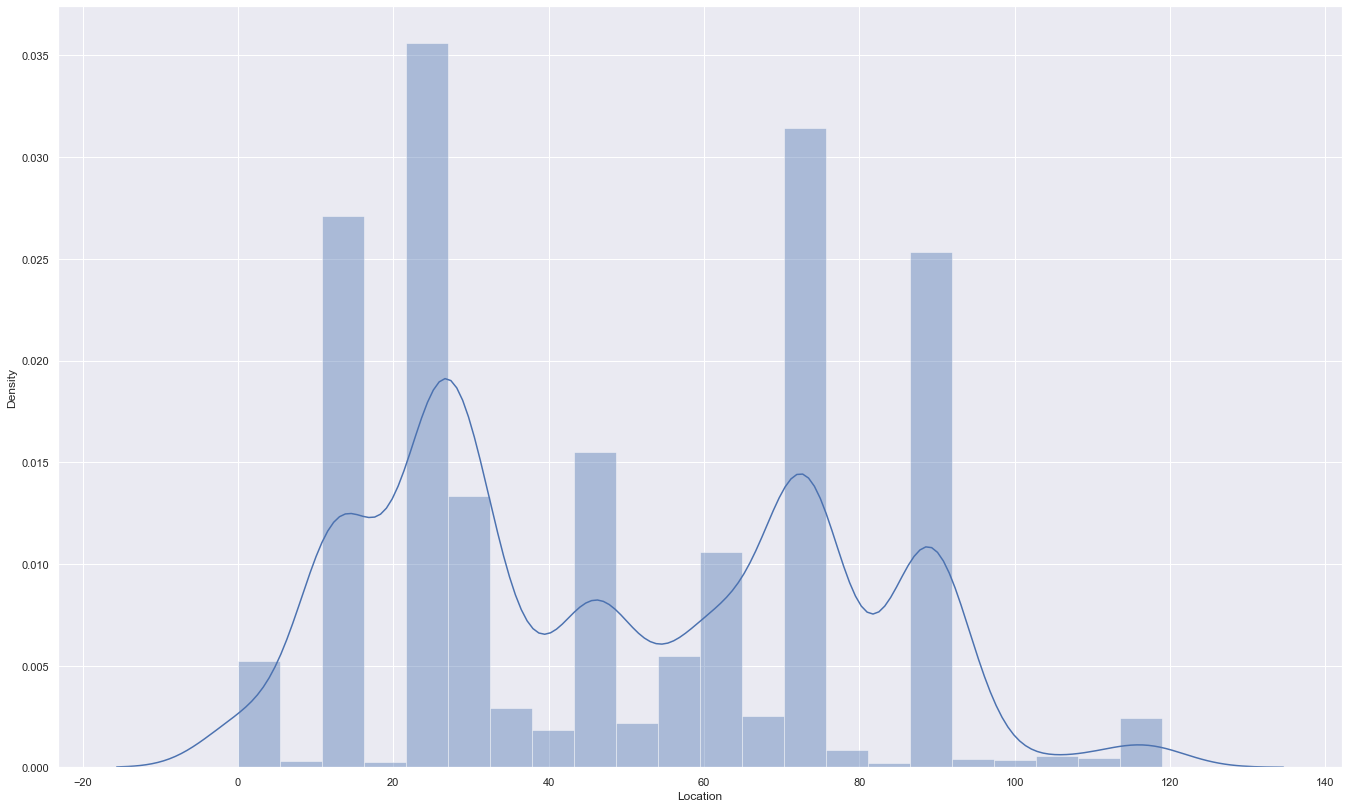



The Distribution Plot for attribute "Total_Owner's" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


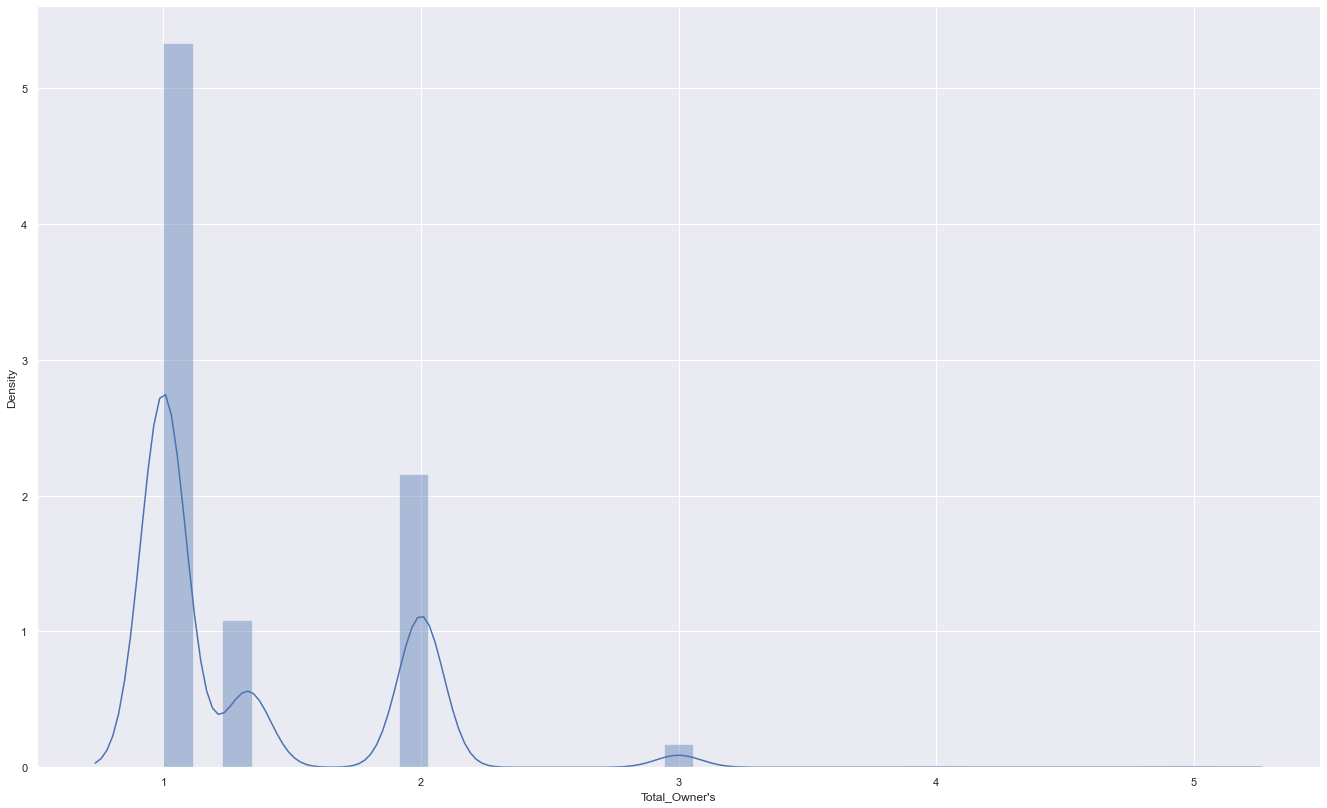



The Distribution Plot for attribute "URL"s" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


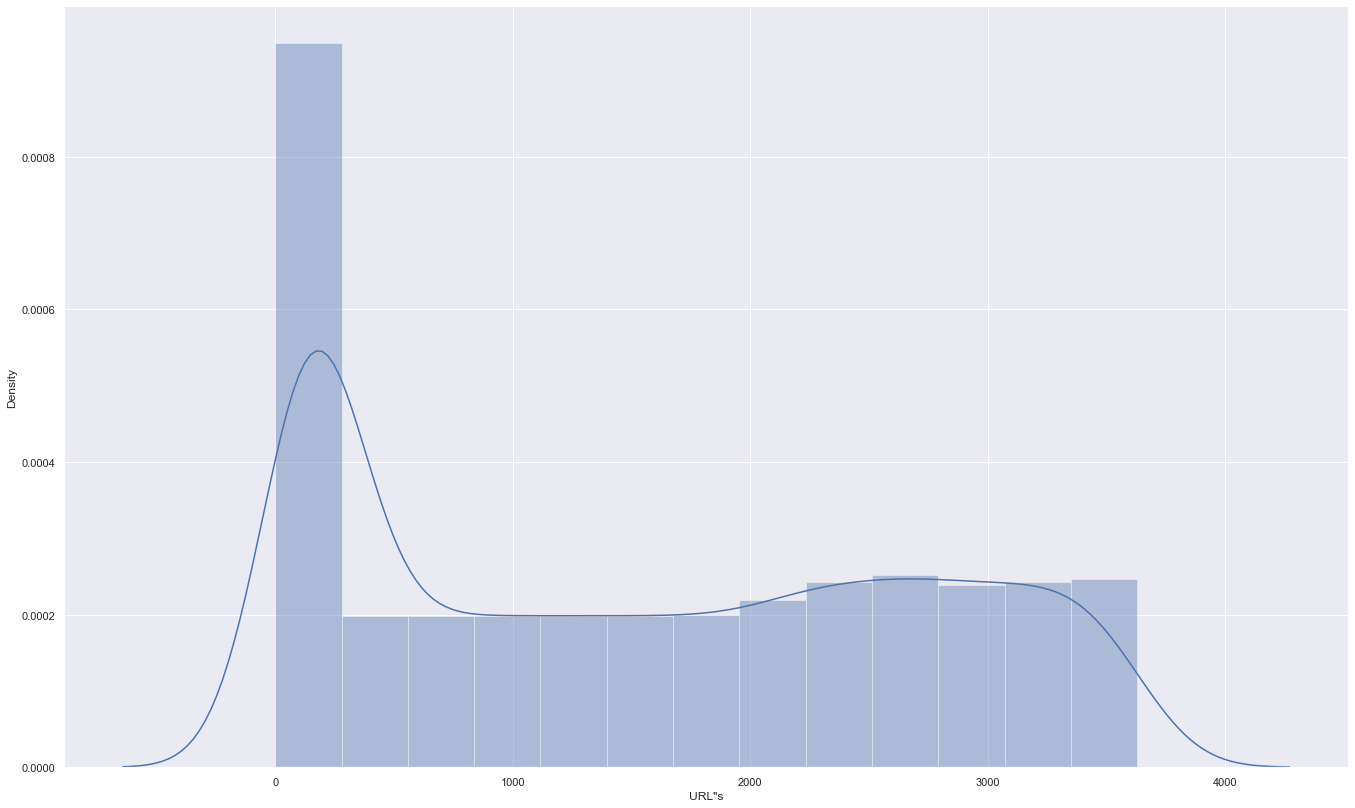

In [125]:
for i in df.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

### Outliers

In [253]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  19,   85,  103,  114, 1251, 1252, 1269, 1275, 1279, 1280, 1282,
        1286, 1295, 1296, 1297, 1307, 1315, 1319, 1331, 1333, 1337, 1338,
        1343, 1344, 1348, 1349, 1352, 1356, 1357, 1358, 1366, 1368, 1372,
        1374, 1377, 1390, 1390, 1392, 1393, 1395, 1401, 1404, 1406, 1407,
        1408, 1414, 1433, 1451, 1453, 1467, 1475, 1647, 1665, 1710, 1711,
        1712, 1716, 1732, 1789, 1792, 1805, 1813, 1868, 1892, 1928, 1935,
        1955, 2083, 2154, 2155, 2179, 2189, 2203, 2214, 2275, 2291, 2296,
        2316, 2346, 2356, 2455, 2510, 2548, 2566, 2576, 2612, 2635, 2642,
        2709, 2828, 2832, 2834, 2839, 2839, 2845, 2845, 2846, 2851, 2853,
        2854, 2873, 2887, 2925, 2965, 2970, 2997, 2998, 3003, 3004, 3005,
        3008, 3052, 3054, 3055, 3078, 3087, 3092, 3110, 3121, 3133, 3164,
        3167, 3179, 3252, 3255, 3259, 3276, 3279, 3283, 3285, 3294, 3297,
        3303, 3305, 3325, 3339, 3363, 3369, 3370, 3372, 3375, 3380, 3387,
        3393, 3394, 3396, 3399, 3404, 

we can see that there are lots of rows and columns are present having outliers

In [254]:
print(z.iloc[19,5])
print(z.iloc[85,5])
print(z.iloc[5036,7])

5.780961319690823
3.245439039547298
3.4412875774815452


### Boxplots To check the Outliers

The Box-Plot for attribute "Brand" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


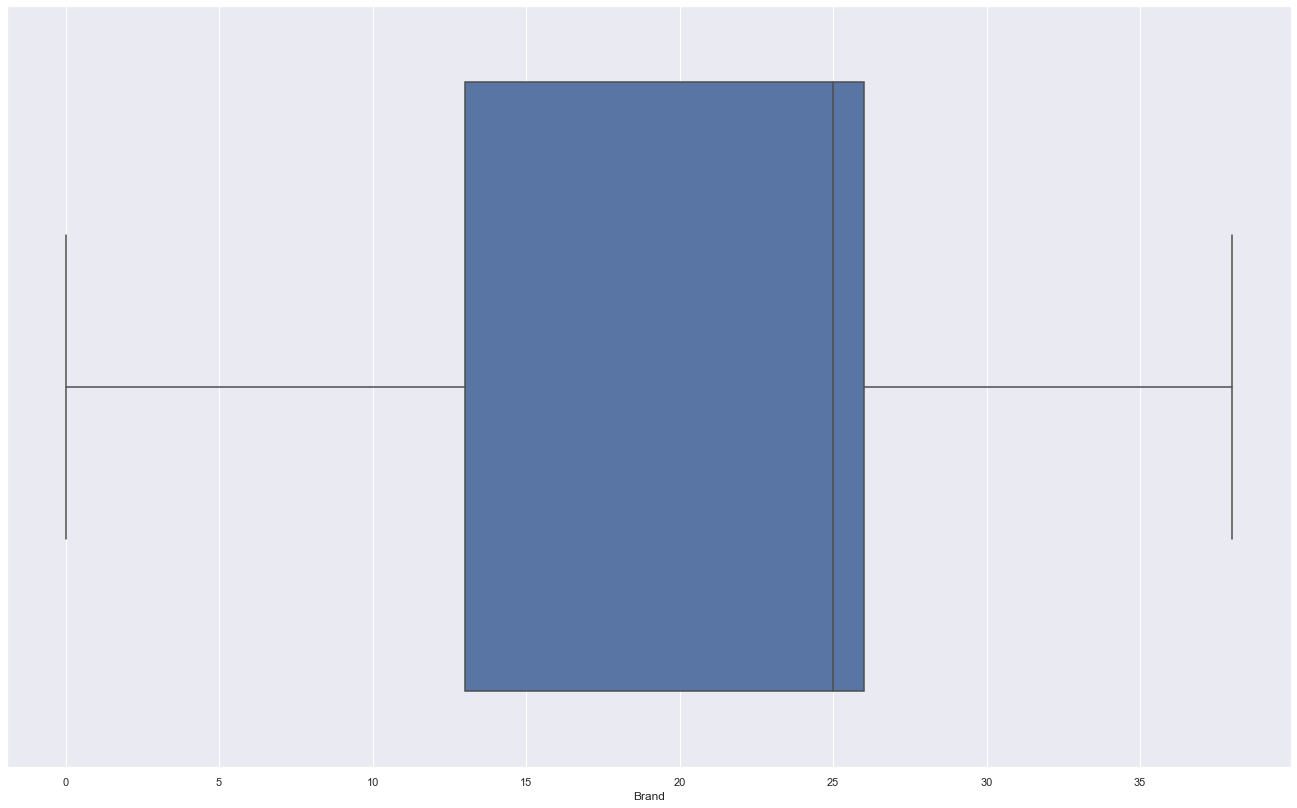



The Box-Plot for attribute "Car_Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


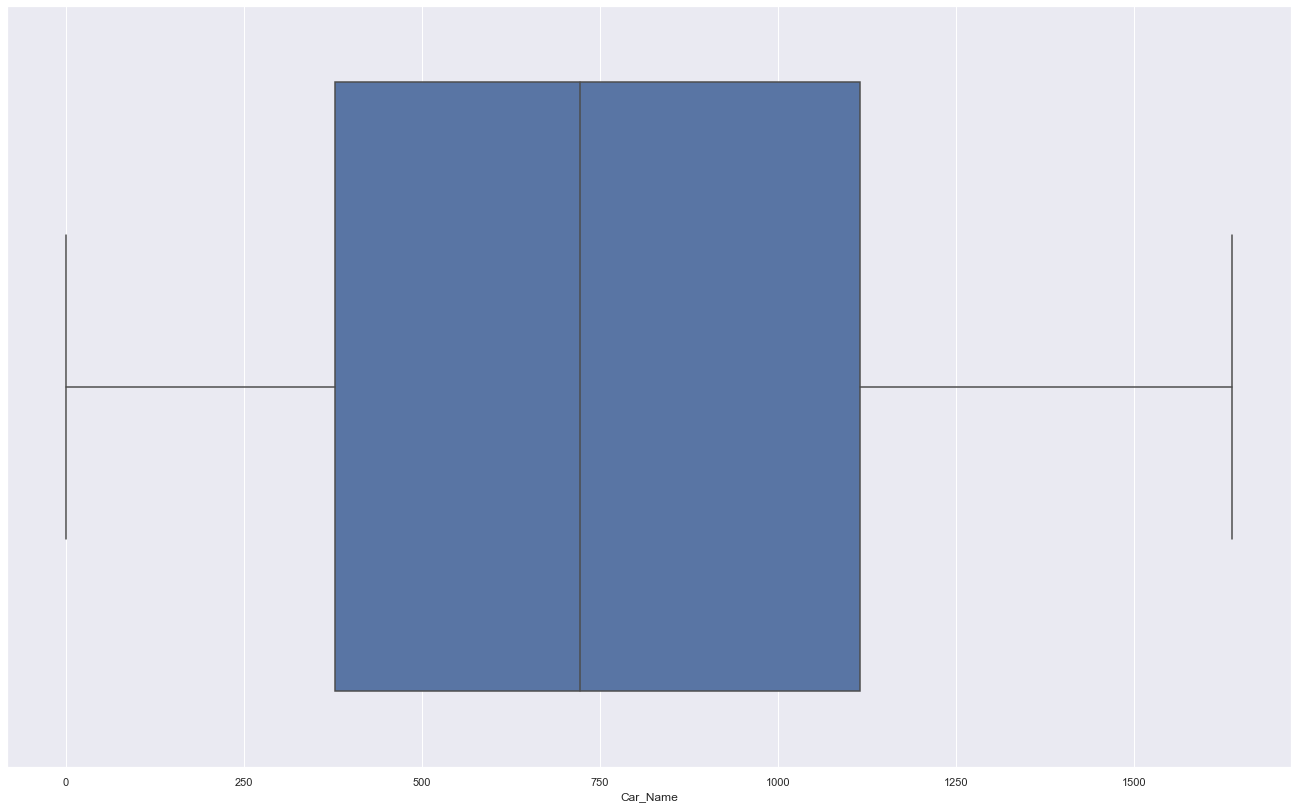



The Box-Plot for attribute "Manufacturing_Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


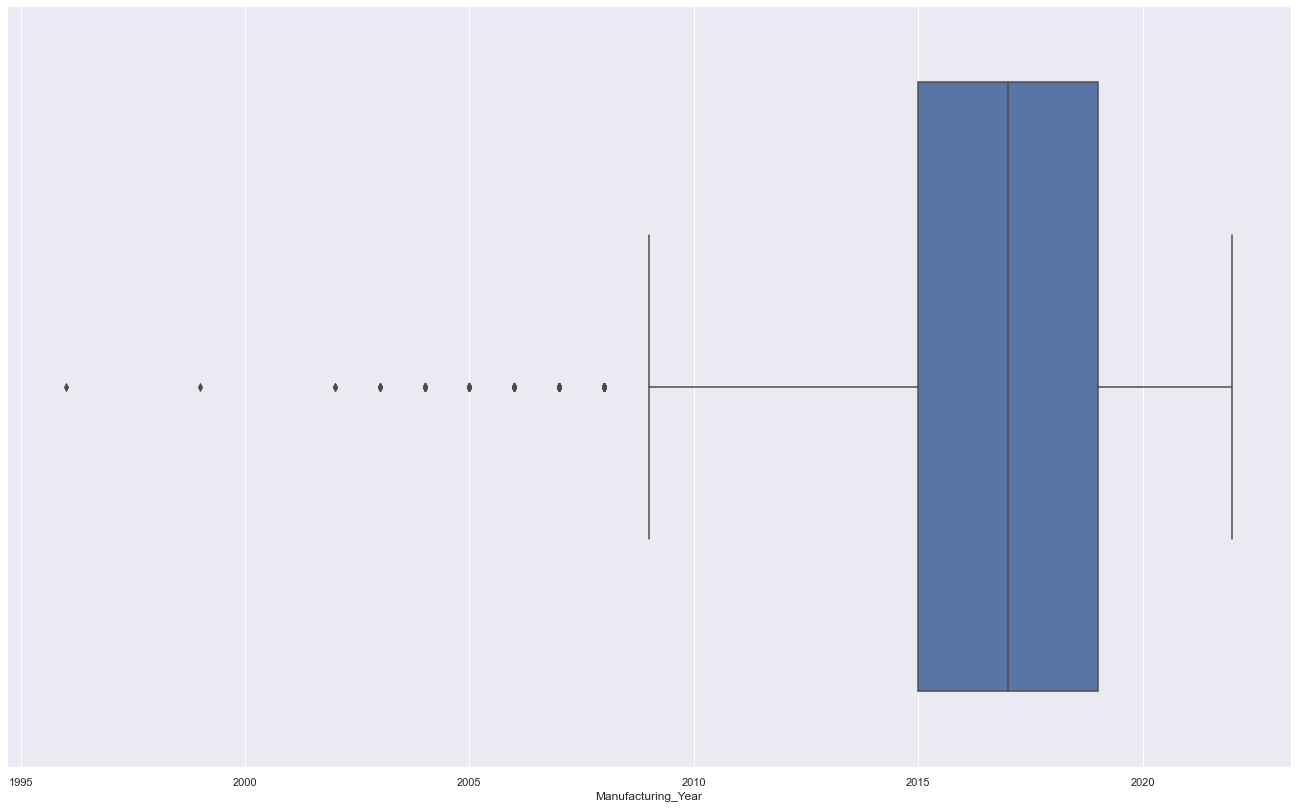



The Box-Plot for attribute "Driven_Kilometers" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


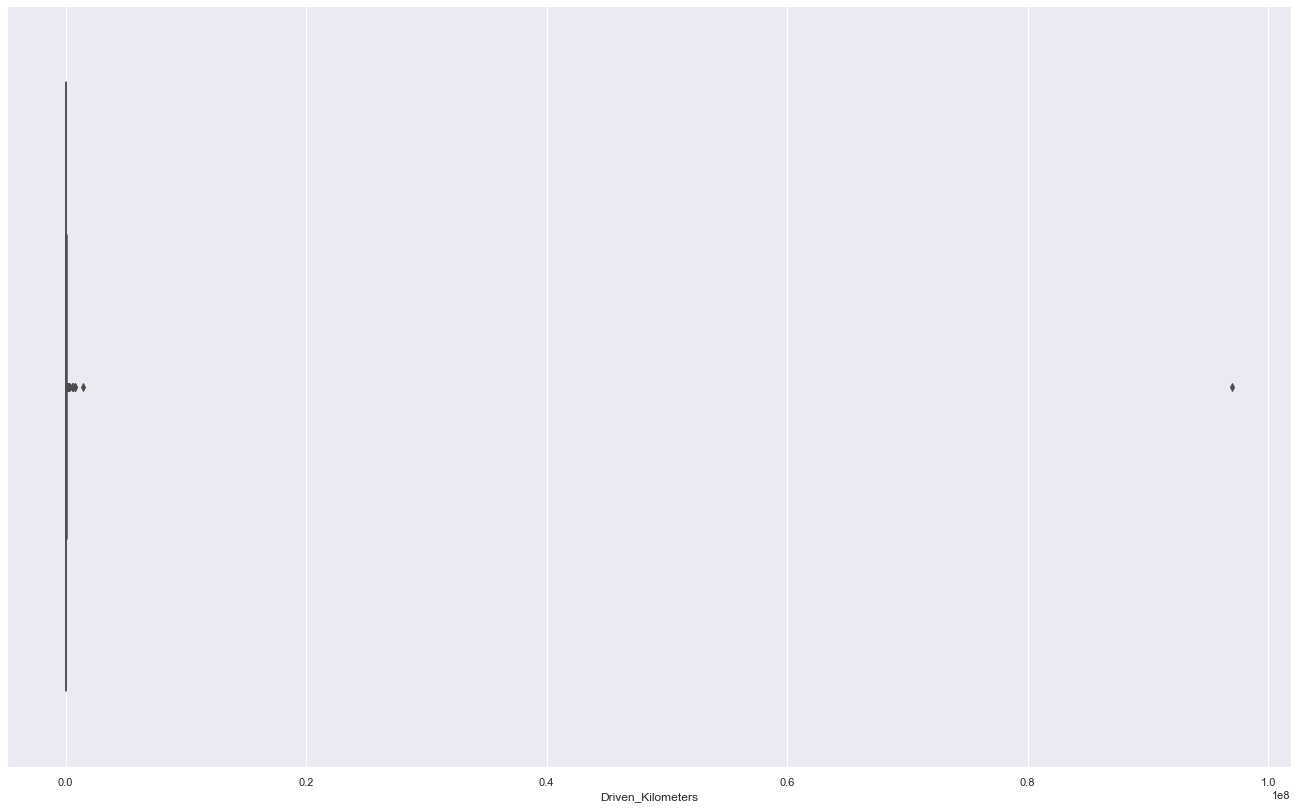



The Box-Plot for attribute "Fuel_Type" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


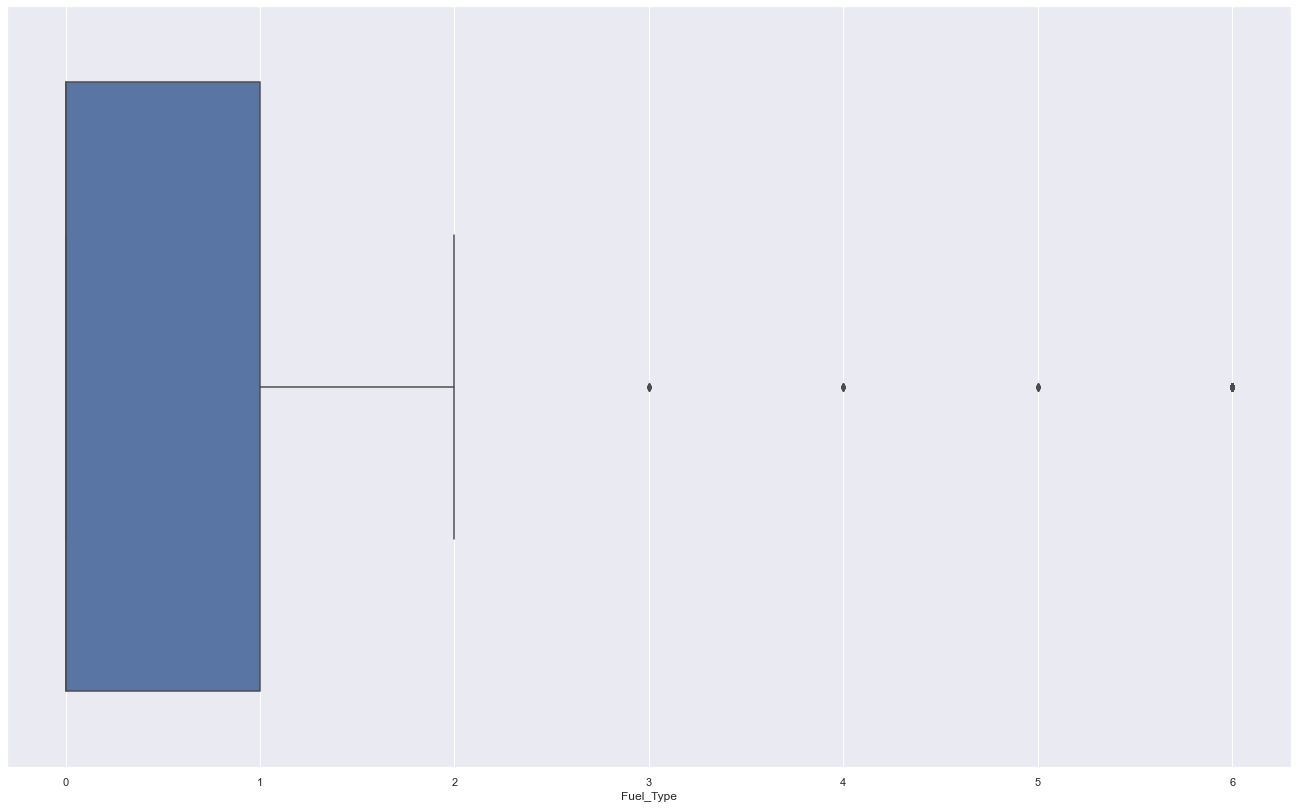



The Box-Plot for attribute "Car_Price" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


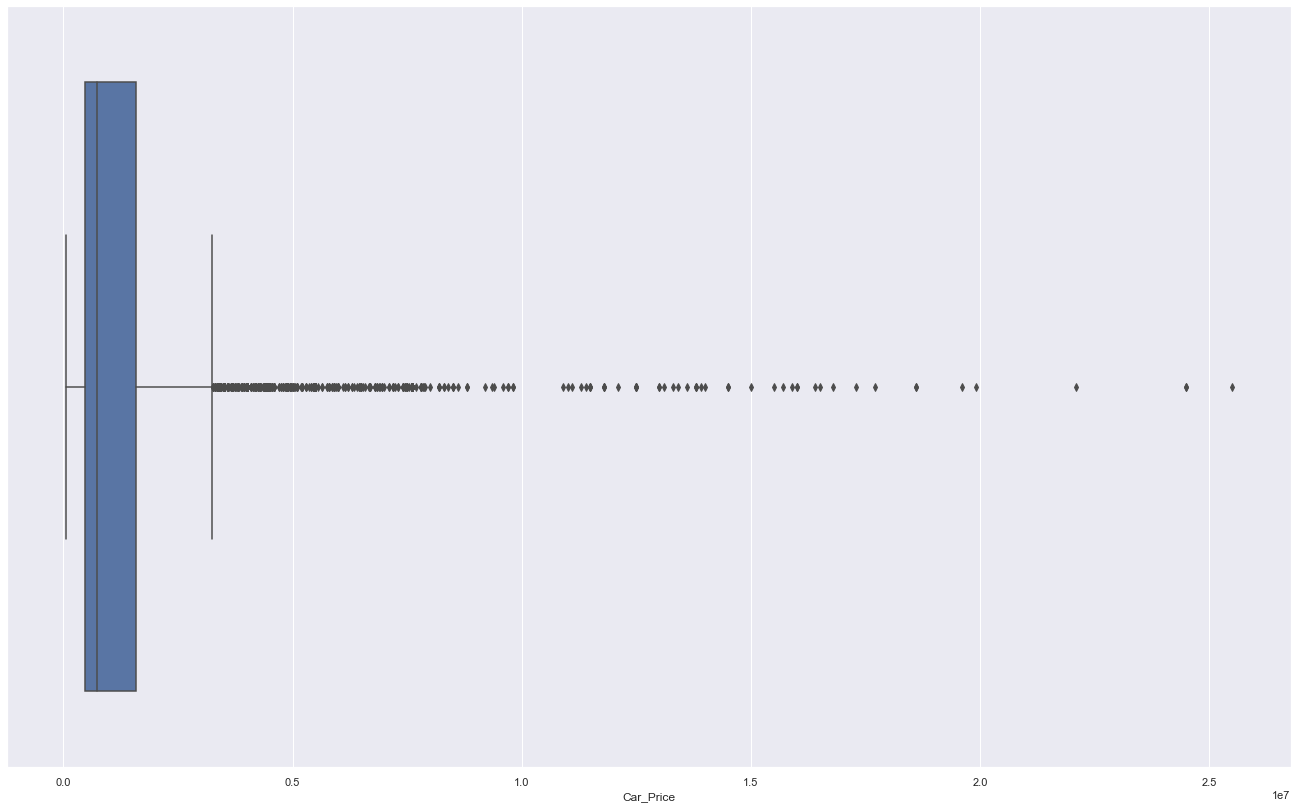



The Box-Plot for attribute "Location" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


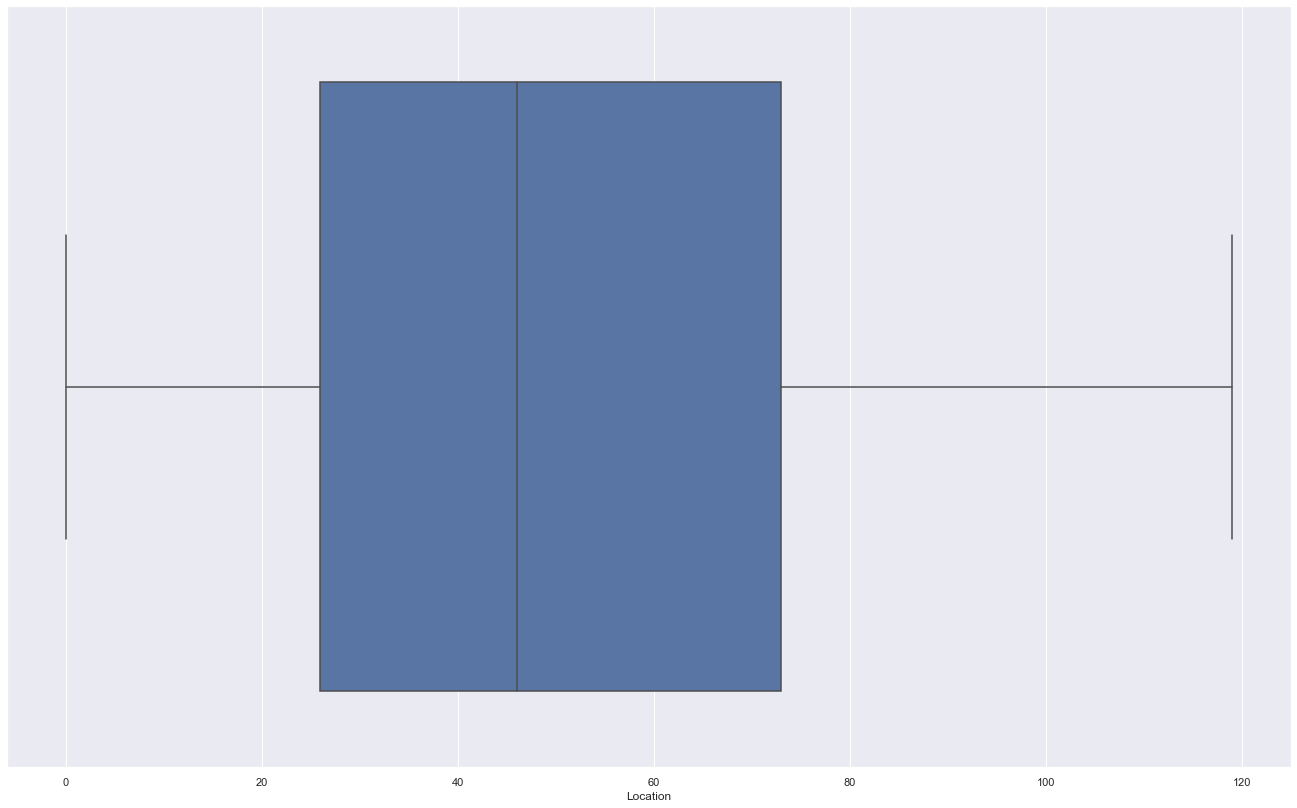



The Box-Plot for attribute "Total_Owner's" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


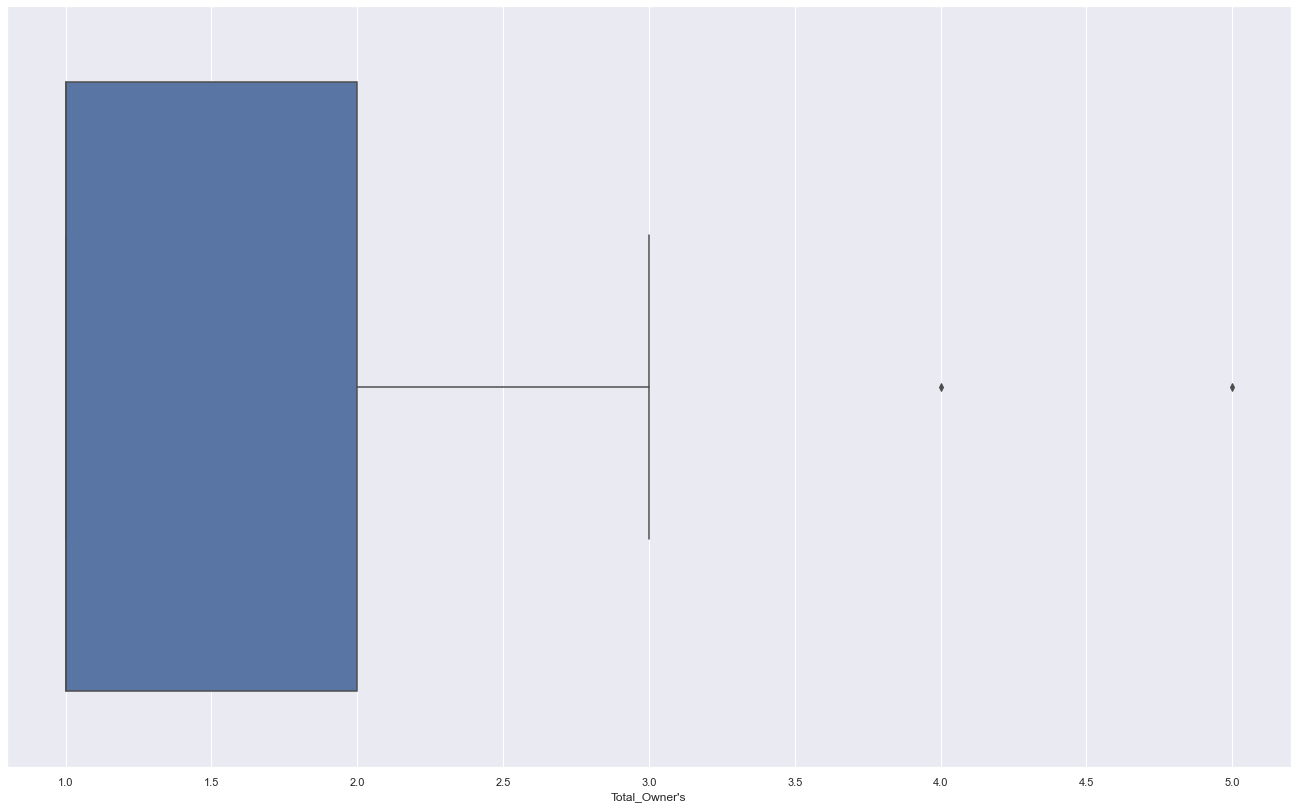



The Box-Plot for attribute "URL"s" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


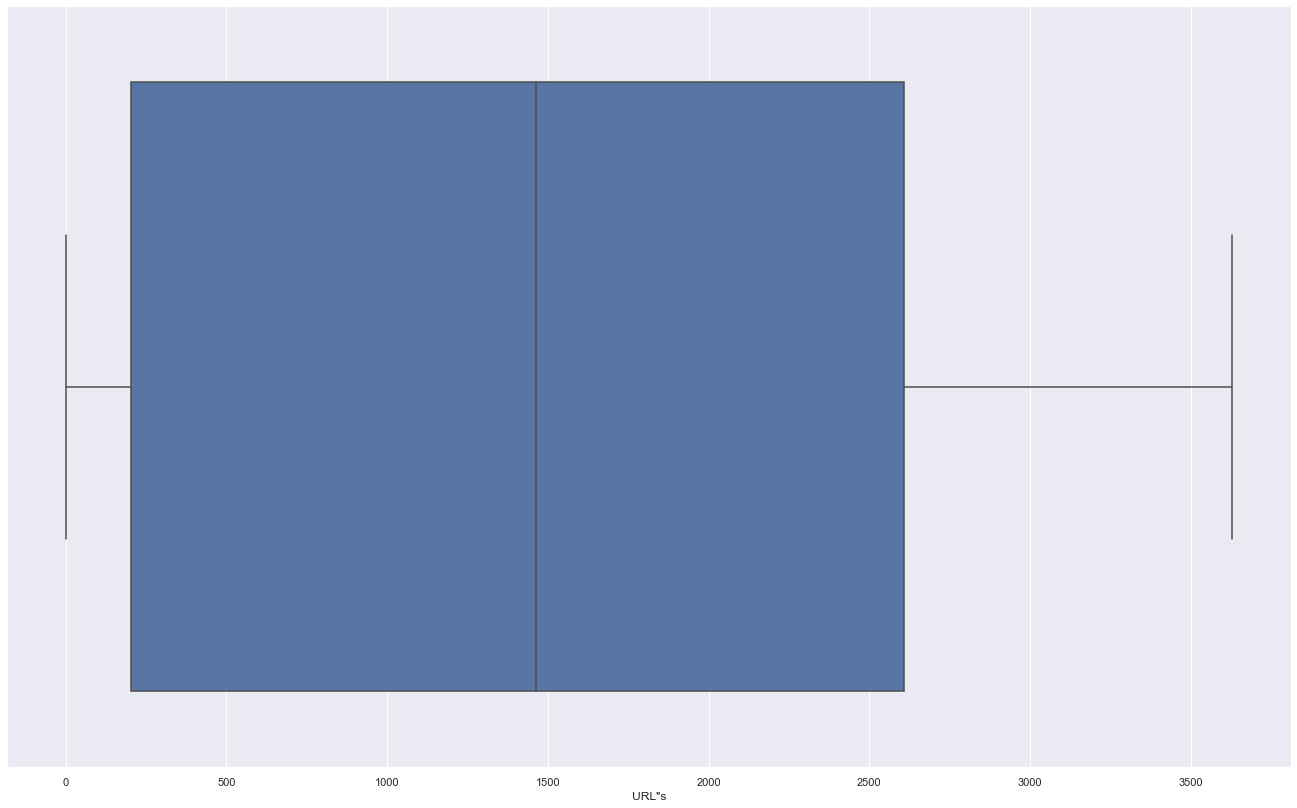

In [127]:
for i in df.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above boxplot images there might be possibility of outliers presence in attributes-Manufacturing_Year, Driven_Kilometers,Fuel_Type & Car_Price and I'll remove the same in next part of data cleansing

### Data Cleansing
### 1.Remove Negative Correlation

###### I'll be removing the attributes in the next part of multicollinearity after checking which variables are highly correlated w.r.t. each other

### 2.Removing Multicollinearity

In [255]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [256]:
x=df.drop('Car_Price',axis=1)
x

Brand  Car_Name  Manufacturing_Year  Driven_Kilometers  Fuel_Type  \
0        12       286              2020.0            38906.0        0.0   
1        25       844              2017.0            38203.0        0.0   
2        37      1591              2016.0            69414.0        0.0   
3        12       303              2020.0            21261.0        0.0   
4        12       326              2016.0            39821.0        0.0   
...     ...       ...                 ...                ...        ...   
5032     13       611              2018.0            69000.0        1.0   
5033     13       438              2017.0            73600.0        0.0   
5034      1        37              2014.0            66027.0        1.0   
5035      1        37              2014.0            93752.0        1.0   
5036     13       387              2013.0            50000.0        1.0   

      Location  Total_Owner's  URL"s  
0            0       1.327973      5  
1            0       1.000000     39  
2            0       1.327973     57  
3            0       1.327973      6  
4            0       1.327973      8  
...        ...            ...    ...  
5032       116       1.327973   2448  
5033       101       1.327973   3585  
5034        43       1.000000   3561  
5035        79       3.000000   3562  
5036        62       3.000000   2436  

[5037 rows x 8 columns]

In [257]:
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df1)

In [258]:
vif()

             Features  VIF_Score
0               Brand  64.297066
1            Car_Name  43.781541
2  Manufacturing_Year  18.836168
3   Driven_Kilometers   1.003977
4           Fuel_Type   1.381436
5            Location   4.084490
6       Total_Owner's  10.908524
7               URL"s   3.746701


##### As we can see in the above portion two pairs are showing high multicollinearity among others and they are- (Brand,Car_Name) and (URL"s,Total_Owner's).
##### Since, (Brand and Car_Name) have 95% collinearity and (URL"s,Total_Owner's) are having 45% of collinearity which is still less than 50% hence will remove only the attribute 'Car_Name'.                                                                                                                              

In [259]:
df2=df.drop(['Car_Name'],axis=1)
df2

Brand  Manufacturing_Year  Driven_Kilometers  Fuel_Type  Car_Price  \
0        12              2020.0            38906.0        0.0  1003000.0   
1        25              2017.0            38203.0        0.0   643000.0   
2        37              2016.0            69414.0        0.0   515000.0   
3        12              2020.0            21261.0        0.0  1299000.0   
4        12              2016.0            39821.0        0.0   605000.0   
...     ...                 ...                ...        ...        ...   
5032     13              2018.0            69000.0        1.0   750000.0   
5033     13              2017.0            73600.0        0.0   420000.0   
5034      1              2014.0            66027.0        1.0  1089449.0   
5035      1              2014.0            93752.0        1.0  1037699.0   
5036     13              2013.0            50000.0        1.0   425000.0   

      Location  Total_Owner's  URL"s  
0            0       1.327973      5  
1            0       1.000000     39  
2            0       1.327973     57  
3            0       1.327973      6  
4            0       1.327973      8  
...        ...            ...    ...  
5032       116       1.327973   2448  
5033       101       1.327973   3585  
5034        43       1.000000   3561  
5035        79       3.000000   3562  
5036        62       3.000000   2436  

[5037 rows x 8 columns]

### 3.Removing Outliers

In [260]:
df3=df2[(z<3).all(axis=1)]
df3

Brand  Manufacturing_Year  Driven_Kilometers  Fuel_Type  Car_Price  \
0        12              2020.0            38906.0        0.0  1003000.0   
1        25              2017.0            38203.0        0.0   643000.0   
2        37              2016.0            69414.0        0.0   515000.0   
3        12              2020.0            21261.0        0.0  1299000.0   
4        12              2016.0            39821.0        0.0   605000.0   
...     ...                 ...                ...        ...        ...   
5030     24              2022.0             6800.0        0.0  1305000.0   
5031     13              2008.0            85000.0        0.0   125000.0   
5032     13              2018.0            69000.0        1.0   750000.0   
5033     13              2017.0            73600.0        0.0   420000.0   
5034      1              2014.0            66027.0        1.0  1089449.0   

      Location  Total_Owner's  URL"s  
0            0       1.327973      5  
1            0       1.000000     39  
2            0       1.327973     57  
3            0       1.327973      6  
4            0       1.327973      8  
...        ...            ...    ...  
5030        46       1.327973   2359  
5031        52       1.327973   3513  
5032       116       1.327973   2448  
5033       101       1.327973   3585  
5034        43       1.000000   3561  

[4737 rows x 8 columns]

In [261]:
print(df3.shape)
print(df2.shape)

(4737, 8)
(5037, 8)


In [262]:
percentage_loss=(5037-4737)*100/5037
percentage_loss

5.955926146515783

##### I'm getting the percentage loss is about 5% which is decent because our dataset is large having 5037 rows and out of it we are loosing only 6% rows.Now we can move ahead by considering it

### 4.Removing Skewness

### a.Power_Transformer Method

In [263]:
from sklearn.preprocessing import PowerTransformer

In [264]:
x=df3.drop('Car_Price',axis=1)
x

Brand  Manufacturing_Year  Driven_Kilometers  Fuel_Type  Location  \
0        12              2020.0            38906.0        0.0         0   
1        25              2017.0            38203.0        0.0         0   
2        37              2016.0            69414.0        0.0         0   
3        12              2020.0            21261.0        0.0         0   
4        12              2016.0            39821.0        0.0         0   
...     ...                 ...                ...        ...       ...   
5030     24              2022.0             6800.0        0.0        46   
5031     13              2008.0            85000.0        0.0        52   
5032     13              2018.0            69000.0        1.0       116   
5033     13              2017.0            73600.0        0.0       101   
5034      1              2014.0            66027.0        1.0        43   

      Total_Owner's  URL"s  
0          1.327973      5  
1          1.000000     39  
2          1.327973     57  
3          1.327973      6  
4          1.327973      8  
...             ...    ...  
5030       1.327973   2359  
5031       1.327973   3513  
5032       1.327973   2448  
5033       1.327973   3585  
5034       1.000000   3561  

[4737 rows x 7 columns]

In [265]:
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x

array([[-0.91776978,  1.07423625, -0.03057771, ..., -2.34490208,
         0.73795178, -2.14190406],
       [ 0.50572873, -0.02097482, -0.05463197, ..., -2.34490208,
        -0.74618859, -1.78327136],
       [ 1.83069756, -0.3697403 ,  0.82236225, ..., -2.34490208,
         0.73795178, -1.67739451],
       ...,
       [-0.80889331,  0.33582189,  0.8125988 , ...,  1.97246889,
         0.73795178,  0.85298388],
       [-0.80889331, -0.02097482,  0.91906388, ...,  1.61297266,
         0.73795178,  1.37299791],
       [-2.10187147, -1.04388151,  0.74136627, ..., -0.05082692,
        -0.74618859,  1.36317416]])

In [266]:
df3.skew().sort_values()

Manufacturing_Year    -0.720876
Brand                 -0.227979
URL"s                  0.239103
Location               0.243460
Fuel_Type              0.814437
Total_Owner's          0.976035
Car_Price              2.135514
Driven_Kilometers     12.372349
dtype: float64

### b.SquareRoot Method

In [268]:
for i in ['Driven_Kilometers',"Total_Owner's",'Fuel_Type','Manufacturing_Year']:
    df3[i]=np.sqrt(df3[i])

In [269]:
df3.skew().sort_values()

Manufacturing_Year   -0.722767
Driven_Kilometers    -0.392328
Brand                -0.227979
URL"s                 0.239103
Location              0.243460
Fuel_Type             0.618951
Total_Owner's         0.939267
Car_Price             2.135514
dtype: float64

As we can see that Almost all the attributes are in the range now

### Using Standard Scaler

In [270]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [271]:
x=df3.drop('Car_Price',axis=1)
x

Brand  Manufacturing_Year  Driven_Kilometers  Fuel_Type  Location  \
0        12           44.944410          14.044431        0.0         0   
1        25           44.911023          13.980554        0.0         0   
2        37           44.899889          16.231616        0.0         0   
3        12           44.944410          12.075244        0.0         0   
4        12           44.899889          14.126287        0.0         0   
...     ...                 ...                ...        ...       ...   
5030     24           44.966654           9.080865        0.0        46   
5031     13           44.810713          17.074765        0.0        52   
5032     13           44.922155          16.207360        1.0       116   
5033     13           44.911023          16.470981        0.0       101   
5034      1           44.877611          16.029884        1.0        43   

      Total_Owner's  URL"s  
0          1.152377      5  
1          1.000000     39  
2          1.152377     57  
3          1.152377      6  
4          1.152377      8  
...             ...    ...  
5030       1.152377   2359  
5031       1.152377   3513  
5032       1.152377   2448  
5033       1.152377   3585  
5034       1.000000   3561  

[4737 rows x 7 columns]

In [272]:
x=sc.fit_transform(x)
x

array([[-0.91498441,  1.04729656,  0.01559326, ..., -1.69329478,
         0.17155764, -1.27259513],
       [ 0.50767011,  0.01230777, -0.00792245, ..., -1.69329478,
        -0.69415206, -1.24377608],
       [ 1.82088968, -0.33285952,  0.82078022, ..., -1.69329478,
         0.17155764, -1.22851893],
       ...,
       [-0.80554945,  0.3573895 ,  0.81185046, ...,  2.36818243,
         0.17155764,  0.79813862],
       [-0.80554945,  0.01230777,  0.90889938, ...,  1.84299141,
         0.17155764,  1.76188167],
       [-2.11876901, -1.02345101,  0.74651497, ..., -0.1877472 ,
        -0.69415206,  1.7415388 ]])

Mean is= -1.098331628339808e-14
Standard Deviation= 1.0
AxesSubplot(0.125,0.125;0.775x0.755)


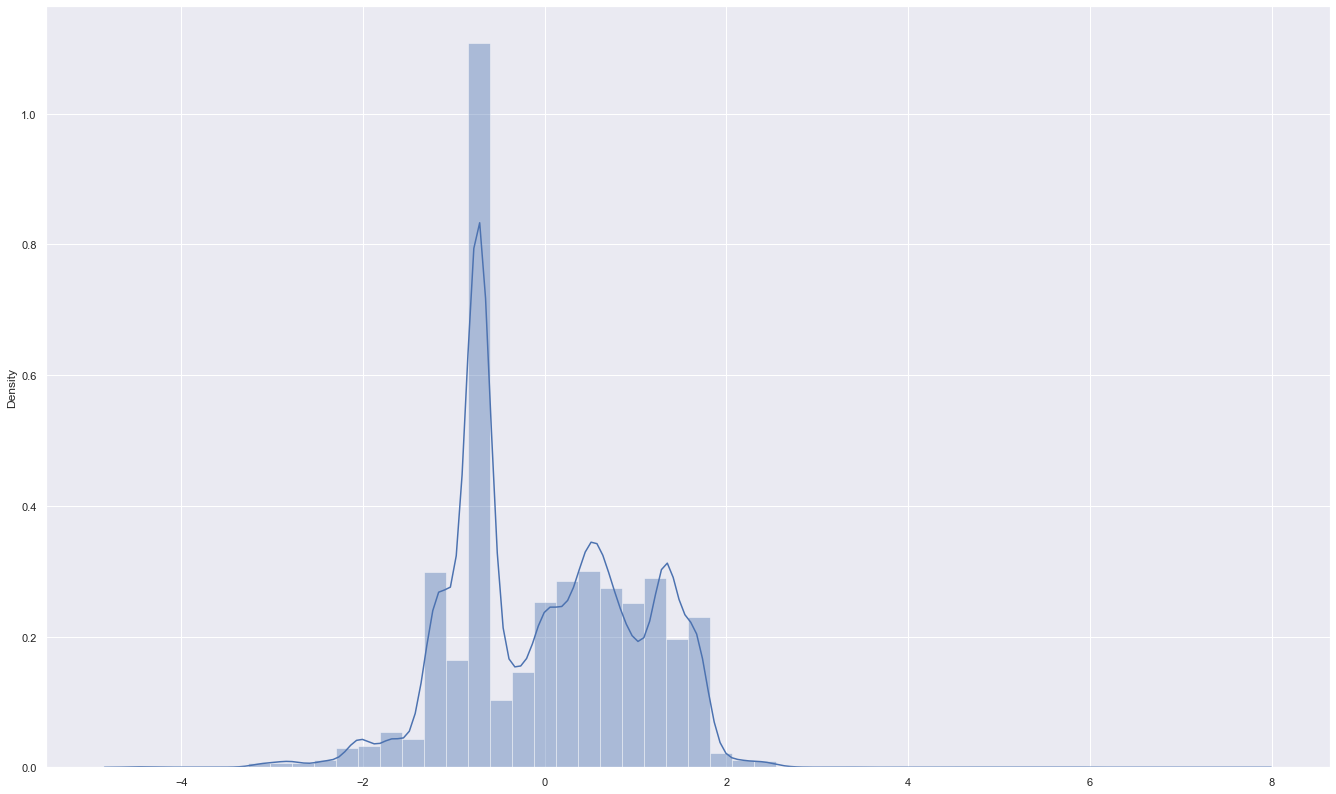

In [273]:
print('Mean is=',x.mean())
print('Standard Deviation=',x.std())
print(sns.distplot(x))
plt.show()

#### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

### Using Principle Component Analysis(PCA)

In [274]:
from sklearn.decomposition import PCA

In [275]:
#reducing the variables into 6 components
pca=PCA(n_components=6)
x=pca.fit_transform(x)
x

array([[-0.67476695,  0.15744821, -2.16907758, -0.88956298, -0.41926615,
         0.72341259],
       [-0.58484144,  0.63218791, -1.16068621, -0.95616809, -1.62845878,
         0.03548077],
       [ 0.33430076,  0.35582919, -0.20548452, -1.38138384, -2.52398911,
         0.70283201],
       ...,
       [ 0.30894412,  0.33074525,  1.61174325,  1.17060147,  2.02647538,
         0.13578455],
       [ 0.966551  , -0.75325024,  0.62450453,  2.02750865,  0.78191332,
        -0.64716565],
       [ 1.64848605,  1.06654749, -0.53438561,  0.34902184,  2.05001372,
        -1.68842424]])

In [276]:
#target variable
y=df3['Car_Price']
y

0       1003000.0
1        643000.0
2        515000.0
3       1299000.0
4        605000.0
          ...    
5030    1305000.0
5031     125000.0
5032     750000.0
5033     420000.0
5034    1089449.0
Name: Car_Price, Length: 4737, dtype: float64

In [277]:
print(x.shape)
print(y.shape)

(4737, 6)
(4737,)


### Plotting the Relationship b/w Principle Components

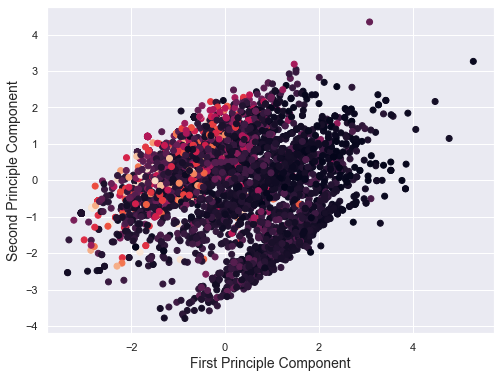

In [278]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

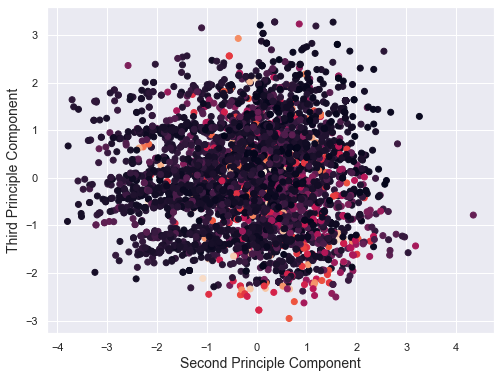

In [279]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

##### Above two diagrams tells us that our feature variables are distributed and mixed well
### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [280]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [281]:
#will finding best value of random_state
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -2.064070027662892
Testing Accuracy is -2.3294062474398327

The Mean Absolute Error is (MAE)- 906224.5446622464
The Mean Squared Error is (MSE)- 1725533827407.4414
The Root Mean Squared Error is (RMSE)- 1313595.762556899


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -1.8675931487746955
Testing Accuracy is -2.223150748824485

The Mean Absolute Error is (MAE)- 905226.0655264023
The Mean Squared Error is (MSE)- 1743935409731.943
The Root Mean Squared Error is (RMSE)- 1320581.4665259933


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -2.019026415729181
Testing Accuracy is -2.184121558314492

The Mean Absolute Error is (MAE)- 914316.4368979433
The Mean Squared Error is (MSE)- 1748841076506.5005
The Root Mean Squared Error is (RMSE)- 1322437.5510800125


At Random_State 3 the training 

### Finding Out CV Score

In [282]:
from sklearn.model_selection import cross_val_score

In [283]:
for n in range(2,5):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is -2.011525102015227 and Standard Deviation is 0.14531787423435133


At K-Fold 3 The CV Score of Linear Regression Model is -17.249623592793714 and Standard Deviation is 0.3313906804518098


At K-Fold 4 The CV Score of Linear Regression Model is -4.8275219736621935 and Standard Deviation is 0.316148845224134




We're getting negative CV score and negative testing accuracy with linear regression model hence will check for other models as well.

In [284]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [285]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE) {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE) {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE) {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,5):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual Car_Price",fontsize=15)
    plt.ylabel("Predicted Car_Price",fontsize=15)
    plt.title(f"Best Fitted Line for the model {m}",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -2.03944353147332
Testing Accuracy of model Lasso() is -2.5845185176614502

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939879.1614062428
The Mean Squared Error is (MSE) 1882531910882.4915
The Root Mean Squared Error is (RMSE) 1372053.9023239908


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is -2.01138463408006 & std is 0.1453162383731874


At K-Fold 3 the CV Score of model Lasso() is -17.249347715159626 & std is 0.3313867358597062


At K-Fold 4 the CV Score of model Lasso() is -4.827446319212872 & std is 0.3161477778982732



	


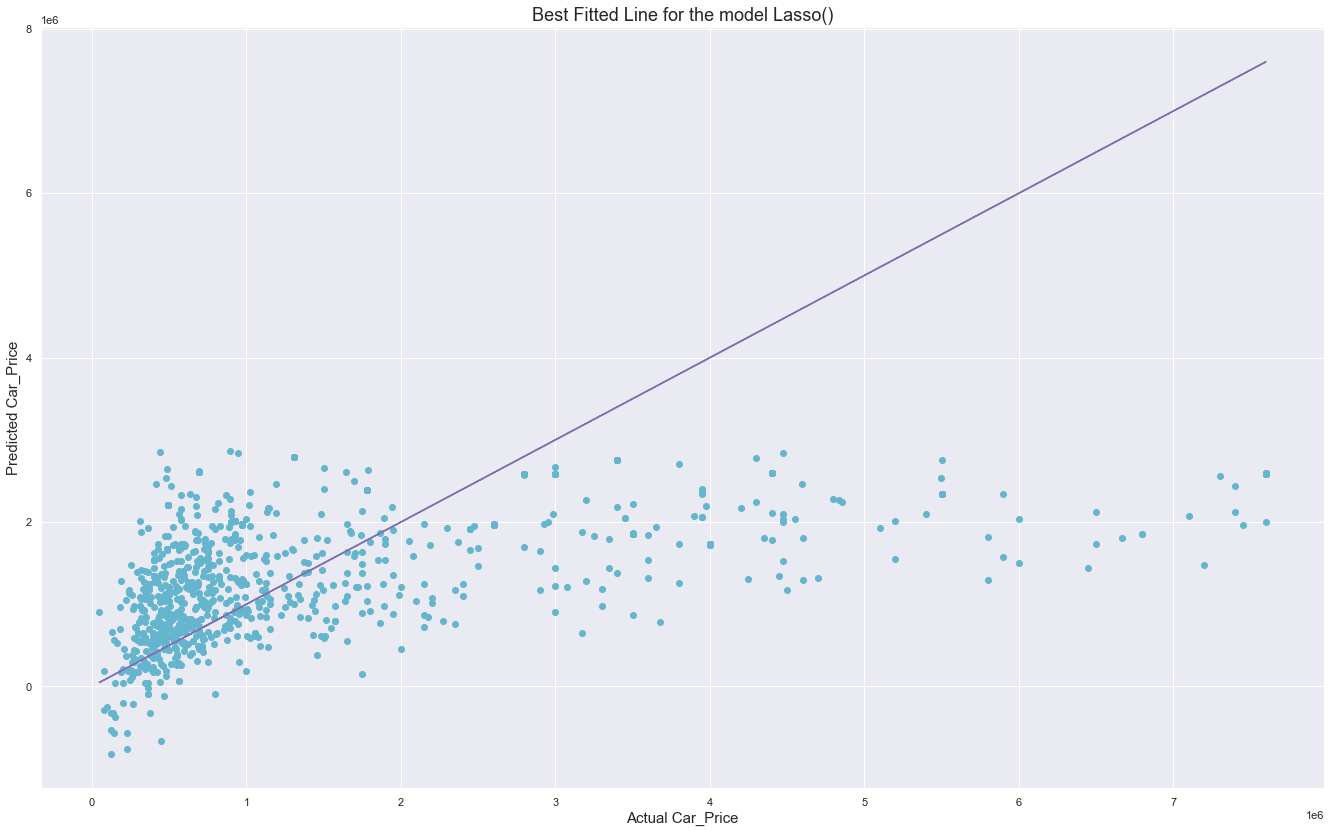

In [286]:
model(ls,x,y)

Training Accuracy of model Ridge() is -2.0406527011439666
Testing Accuracy of model Ridge() is -2.586047282162148

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939873.6987989813
The Mean Squared Error is (MSE) 1882566602362.0999
The Root Mean Squared Error is (RMSE) 1372066.5444365663


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is -2.014026581960043 & std is 0.1452983213502536


At K-Fold 3 the CV Score of model Ridge() is -17.250262420838258 & std is 0.331388029509362


At K-Fold 4 the CV Score of model Ridge() is -4.816828904748907 & std is 0.31598045441008116



	


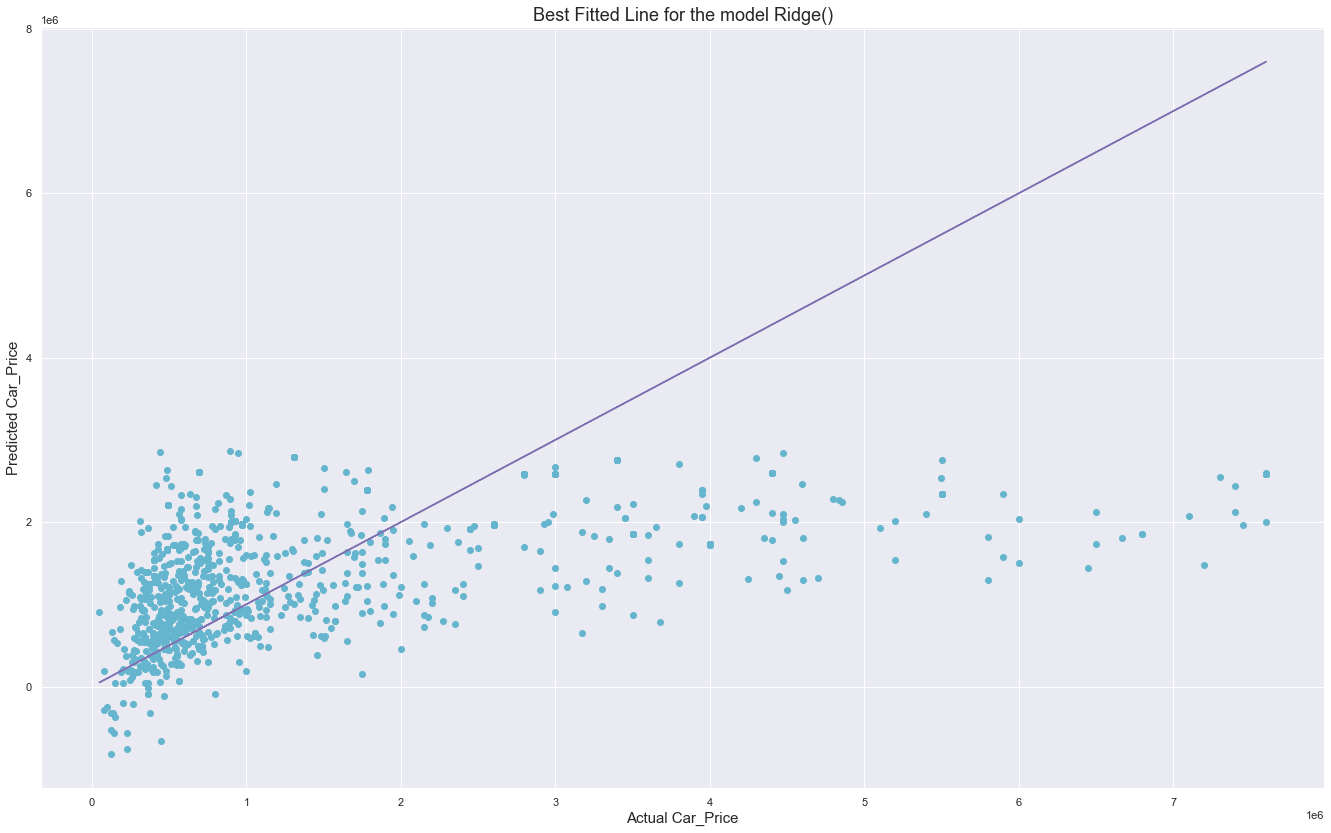

In [287]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is -4.659562980284821
Testing Accuracy of model ElasticNet() is -5.862178171494299

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 957557.5782082385
The Mean Squared Error is (MSE) 1967520831519.6873
The Root Mean Squared Error is (RMSE) 1402683.439525714


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is -5.436459605209859 & std is 0.11702553203020033


At K-Fold 3 the CV Score of model ElasticNet() is -37.71001060833255 & std is 0.5917997858251085


At K-Fold 4 the CV Score of model ElasticNet() is -7.557974118487073 & std is 0.34143791425081577



	


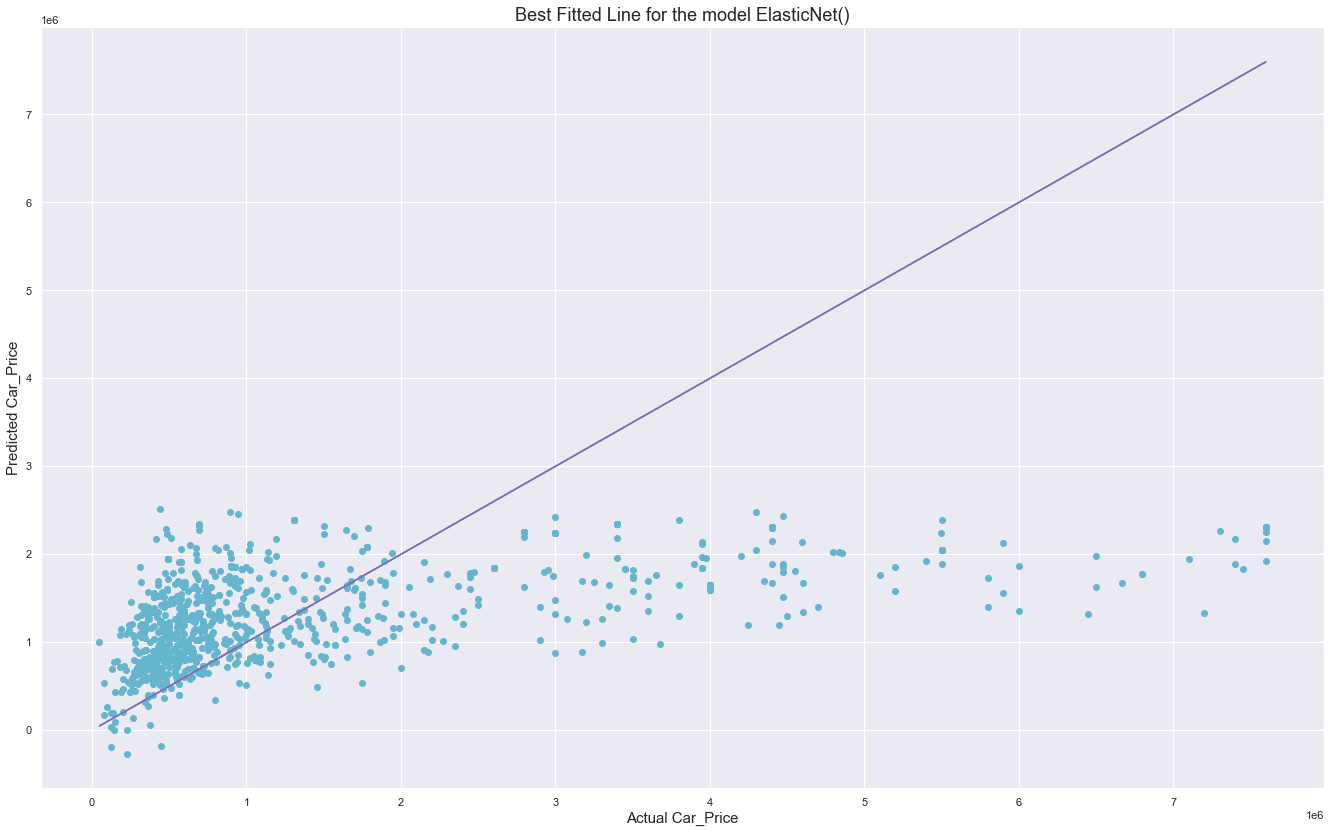

In [288]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is -2.00566579643816
Testing Accuracy of model SGDRegressor() is -2.5403703607586534

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 941115.0041690764
The Mean Squared Error is (MSE) 1879698516900.9558
The Root Mean Squared Error is (RMSE) 1371020.9760980888


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is -2.115834972288244 & std is 0.14395745267232551


At K-Fold 3 the CV Score of model SGDRegressor() is -20.43868534766368 & std is 0.3803191110184145


At K-Fold 4 the CV Score of model SGDRegressor() is -6.114586314665008 & std is 0.3506190086541286



	


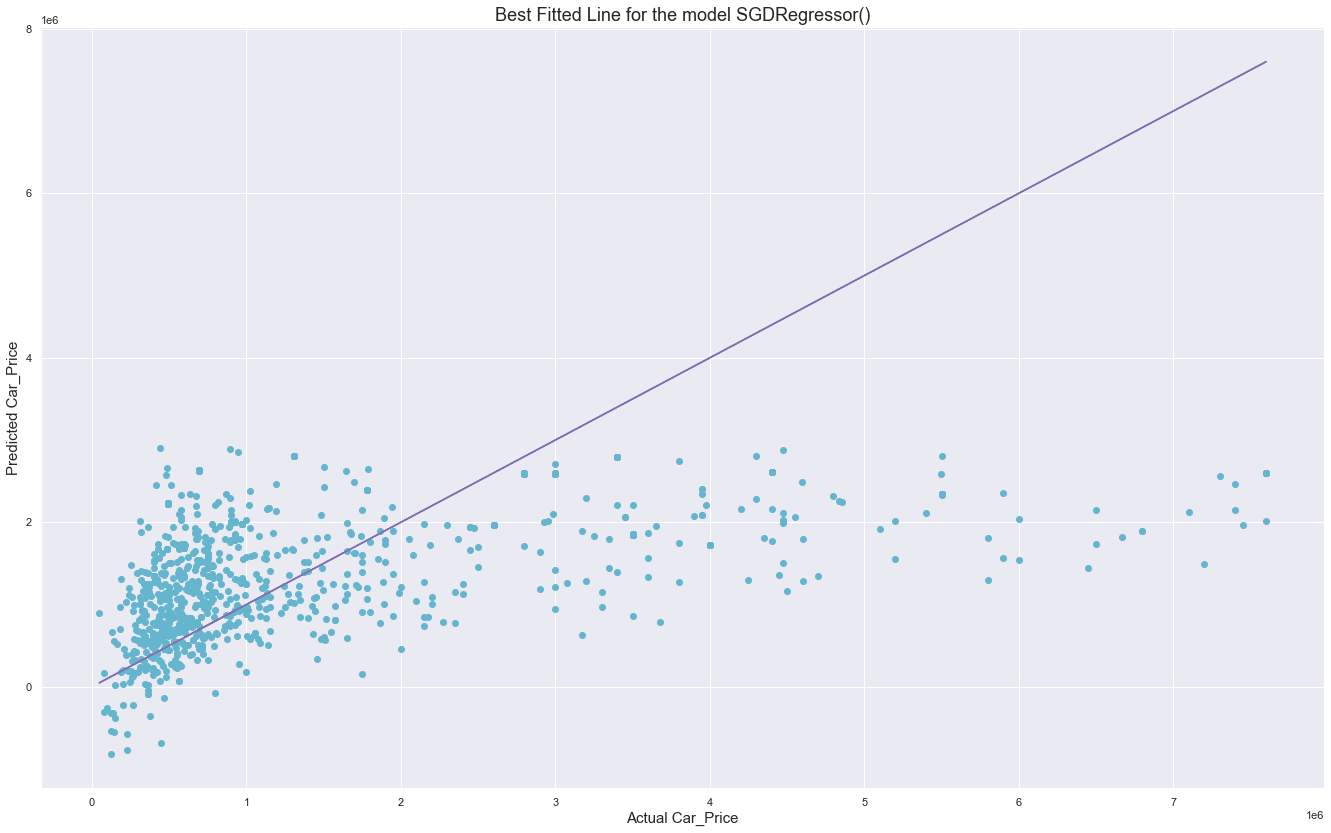

In [289]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9323200427338305
Testing Accuracy of model RandomForestRegressor() is 0.4625875617927224

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 483467.43336434755
The Mean Squared Error is (MSE) 929422830992.7327
The Root Mean Squared Error is (RMSE) 964065.7814655246


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is -55.20937196409768 & std is 0.5865057816677415


At K-Fold 3 the CV Score of model RandomForestRegressor() is -119.21661563968439 & std is 1.4259939867414473


At K-Fold 4 the CV Score of model RandomForestRegressor() is -0.9232752809073652 & std is 0.6309412630275778



	


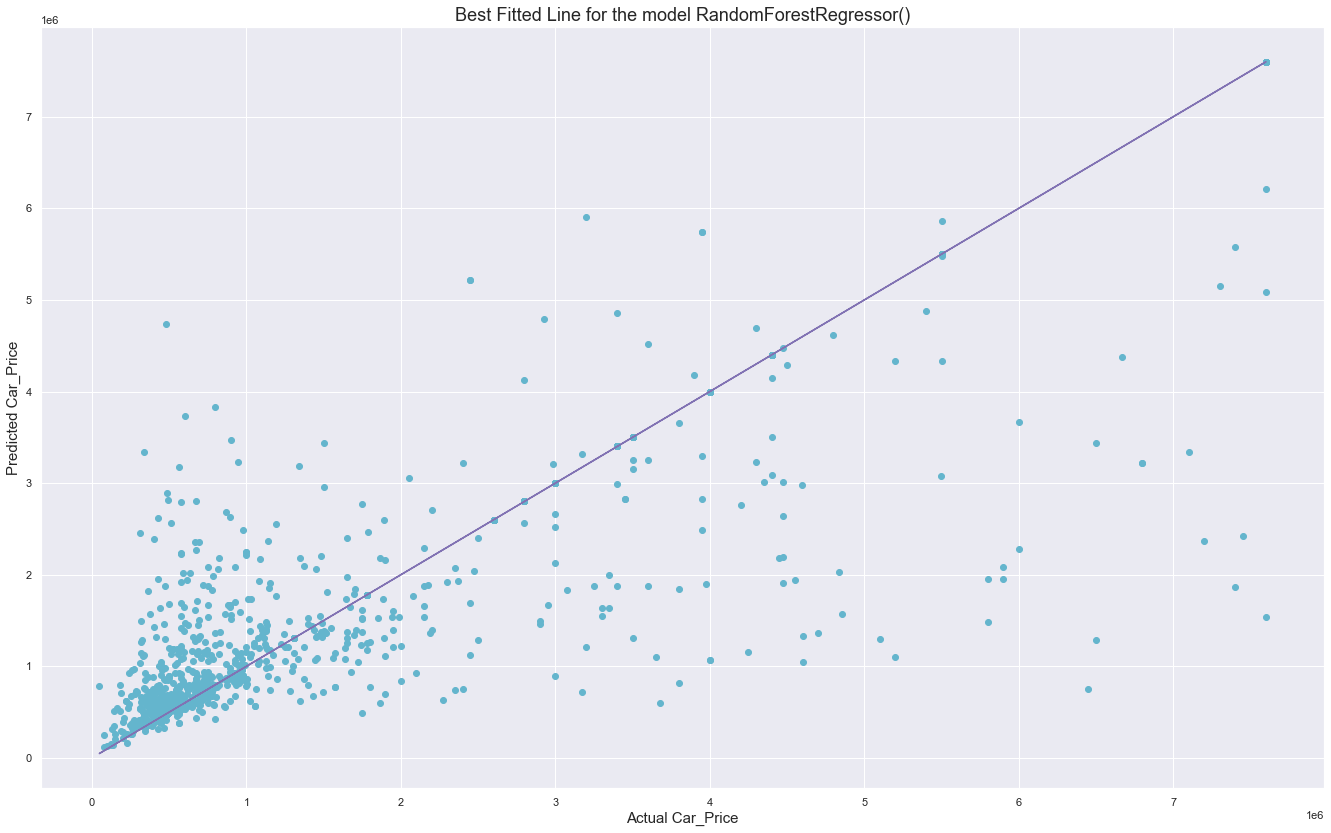

In [290]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is -1.1773711645991023
Testing Accuracy of model AdaBoostRegressor() is -1.3069398096475653

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1025920.5509491024
The Mean Squared Error is (MSE) 1773675389576.492
The Root Mean Squared Error is (RMSE) 1331794.0492345248


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -85.0565453299662 & std is 0.7378073879201471


At K-Fold 3 the CV Score of model AdaBoostRegressor() is -219.05062755625298 & std is 2.827967294110607


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -87.84856539369767 & std is 1.5199320099763103



	


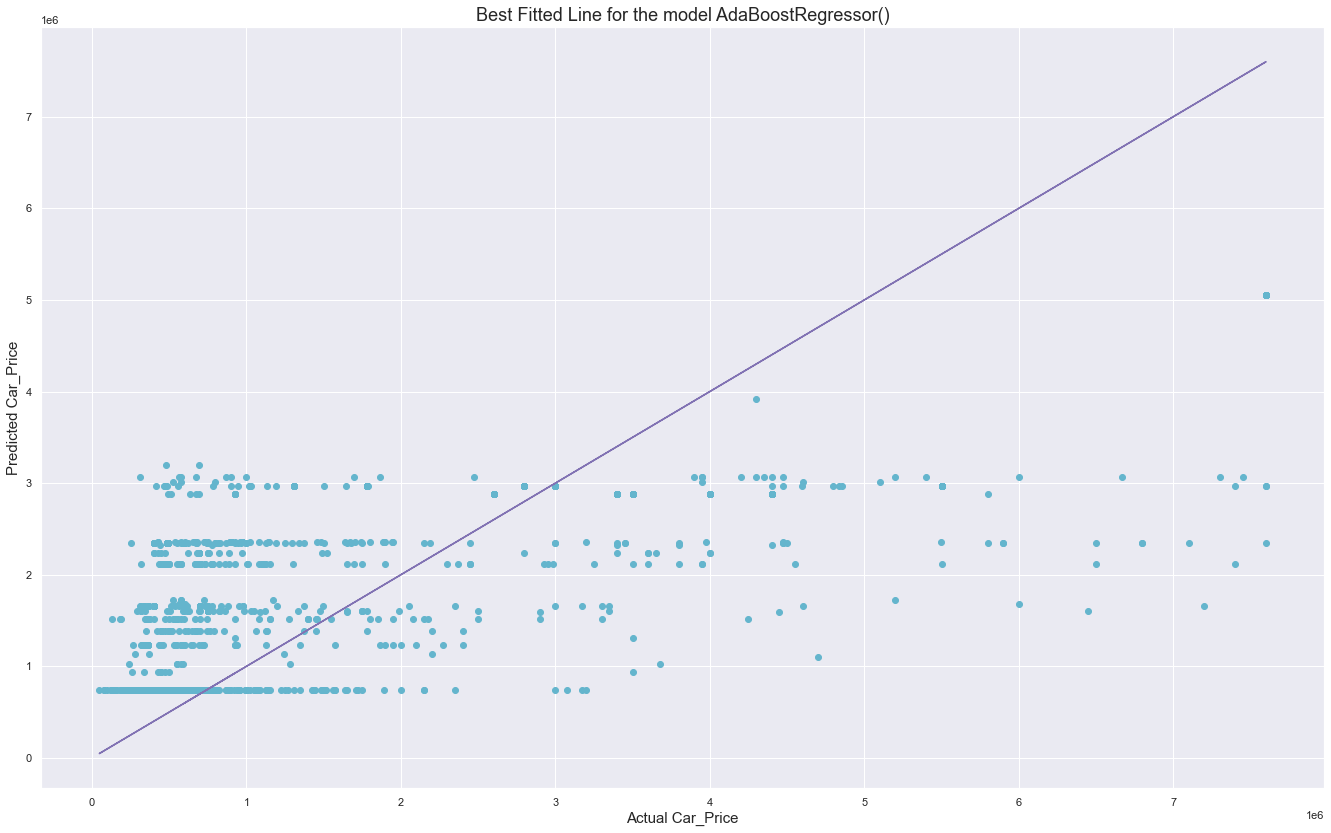

In [291]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.24957876824633585
Testing Accuracy of model GradientBoostingRegressor() is 0.042457290697759054

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 629580.0094814101
The Mean Squared Error is (MSE) 1114658146508.477
The Root Mean Squared Error is (RMSE) 1055773.7193681595


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is -25.189088854924467 & std is 0.2972342621214249


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is -51.58717243343801 & std is 0.7195390391297689


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 7.7805399013890355 & std is 0.40187626635215123



	


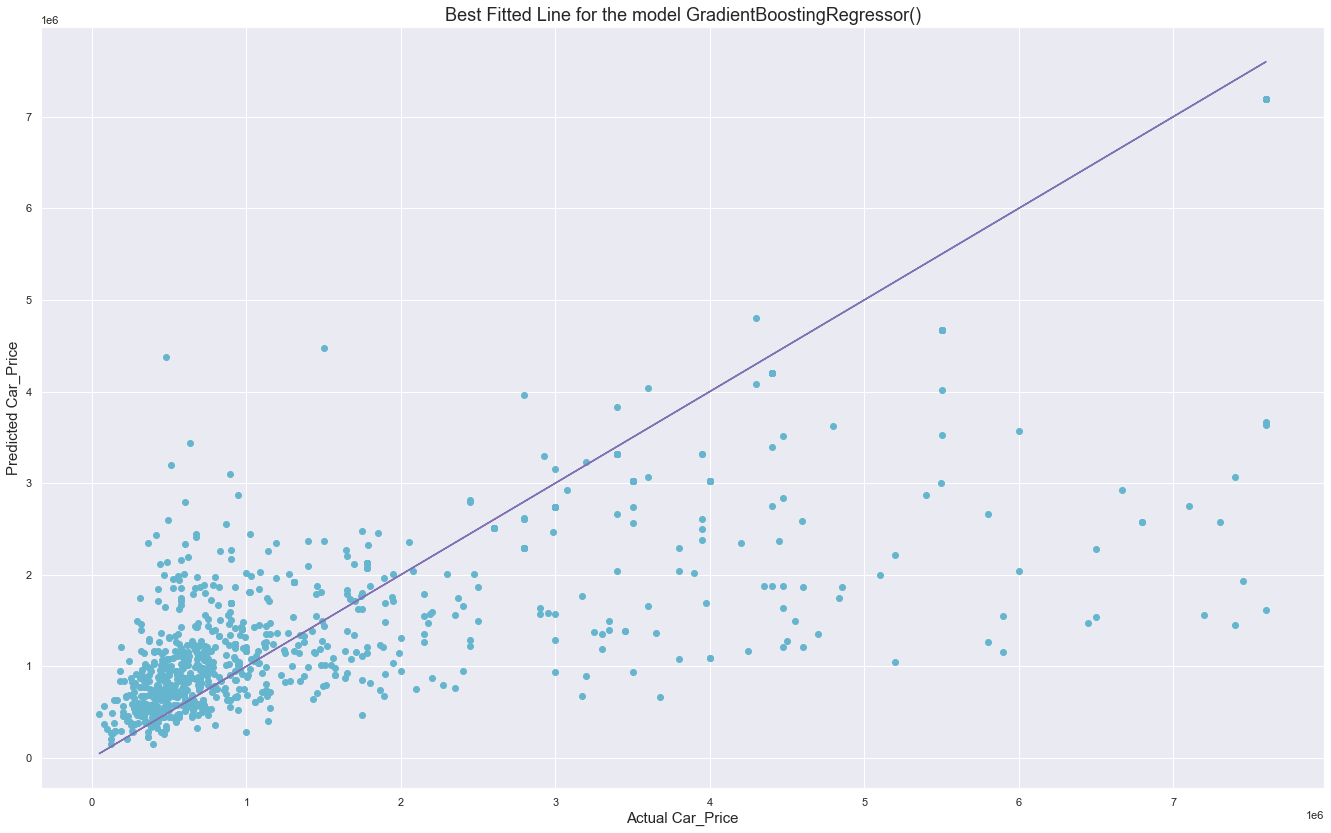

In [292]:
model(grd,x,y)

### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}

In [172]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [173]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 10, 'selection': 'cyclic'}


In [174]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'lsqr'}


In [175]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.1, 'selection': 'cyclic'}


In [176]:
HPT(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'penalty': 'elasticnet'}


In [177]:
HPT(rf,dict_rf)

The best Parameters of the model RandomForestRegressor() are {'criterion': 'poisson', 'max_features': 'sqrt'}


In [178]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [179]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'mse', 'loss': 'huber', 'max_features': 'sqrt'}


In [293]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=10,selection='cyclic')
rd=Ridge(alpha=10,solver='lsqr')
en=ElasticNet(alpha=0.1,selection='cyclic')
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='mse',loss='huber',max_features='sqrt')
sgd=SGDRegressor(alpha=0.0001,learning_rate='constant',penalty='elasticnet',loss='squared_epsilon_insensitive')

Training Accuracy of model LinearRegression() is -2.0394288337004696
Testing Accuracy of model LinearRegression() is -2.5845000645493954

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939879.1243980991
The Mean Squared Error is (MSE) 1882531493616.587
The Root Mean Squared Error is (RMSE) 1372053.7502651224


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is -2.011525102015227 & std is 0.14531787423435133


At K-Fold 3 the CV Score of model LinearRegression() is -17.249623592793714 & std is 0.3313906804518098


At K-Fold 4 the CV Score of model LinearRegression() is -4.8275219736621935 & std is 0.316148845224134



	


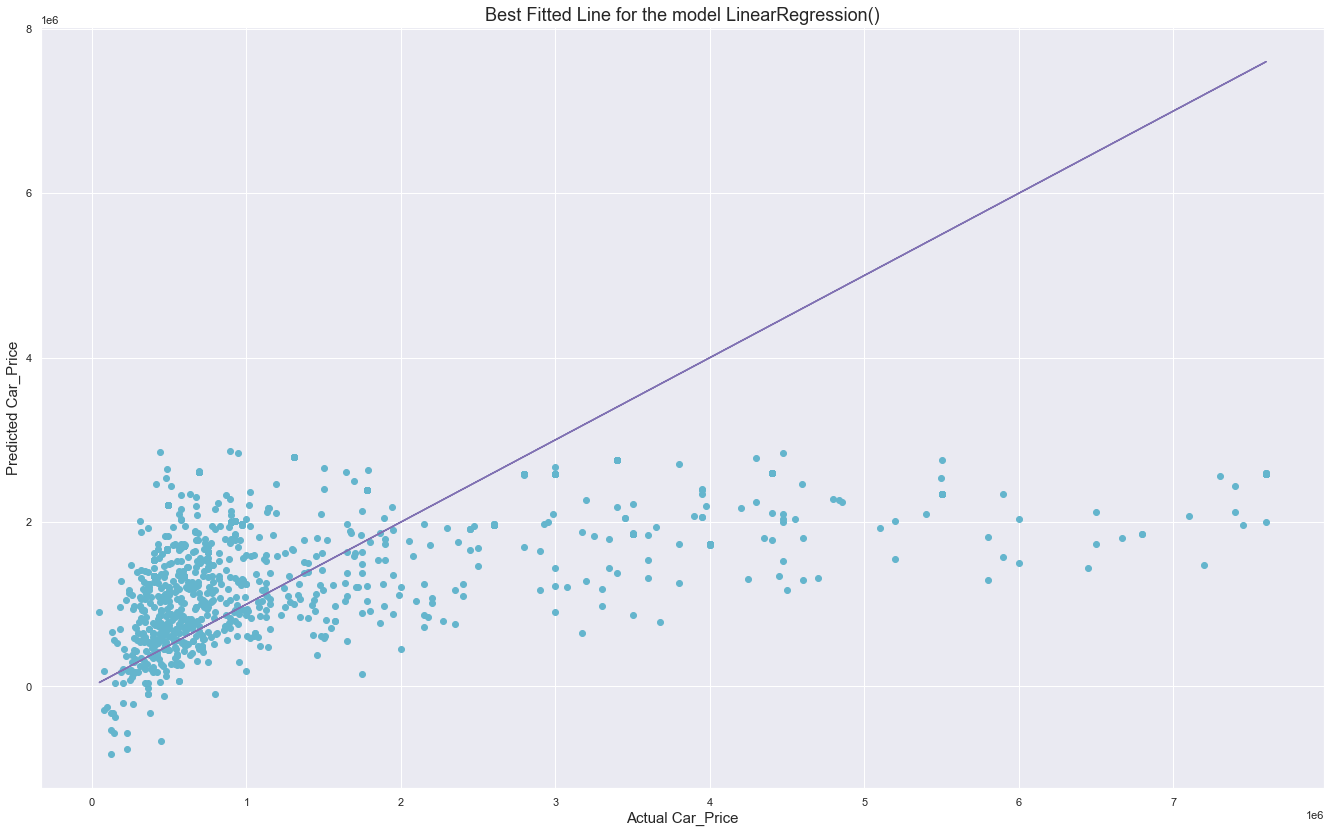

In [294]:
model(lr,x,y)

Training Accuracy of model Lasso(alpha=10) is -2.039576523212972
Testing Accuracy of model Lasso(alpha=10) is -2.584685474617608

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939879.485259115
The Mean Squared Error is (MSE) 1882535677441.7515
The Root Mean Squared Error is (RMSE) 1372055.27492217


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=10) is -2.0101351334614384 & std is 0.14530164557381414


At K-Fold 3 the CV Score of model Lasso(alpha=10) is -17.246856741971598 & std is 0.3313511031063787


At K-Fold 4 the CV Score of model Lasso(alpha=10) is -4.826766336952709 & std is 0.31613817103237296



	


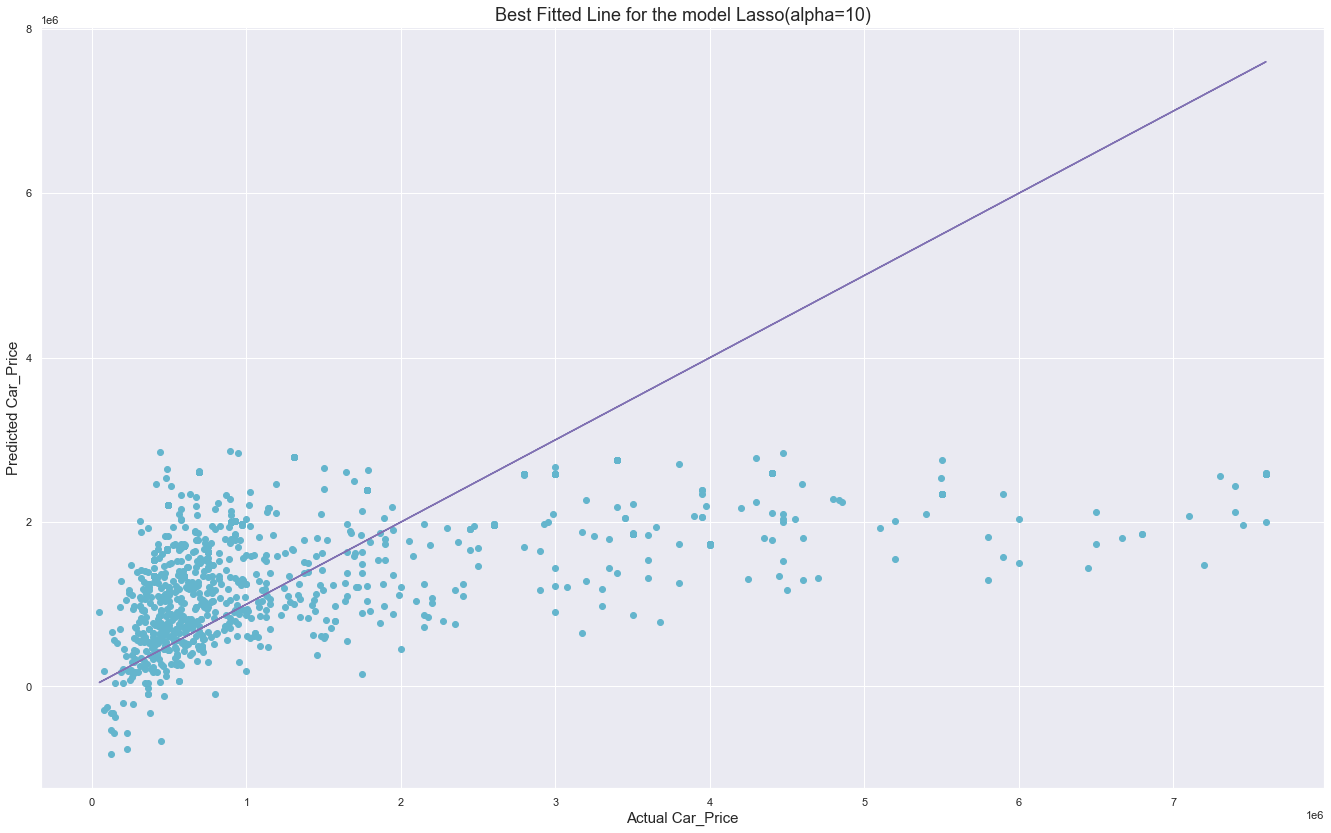

In [295]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=10, solver='lsqr') is -2.051709335564834
Testing Accuracy of model Ridge(alpha=10, solver='lsqr') is -2.599267891332021

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939907.6120873806
The Mean Squared Error is (MSE) 1882944242400.5068
The Root Mean Squared Error is (RMSE) 1372204.1547818265


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='lsqr') is -2.086611789091297 & std is 0.1456072994175338


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='lsqr') is -17.272976047730197 & std is 0.33162684092620504


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='lsqr') is -4.770292442596818 & std is 0.3151960247747844



	


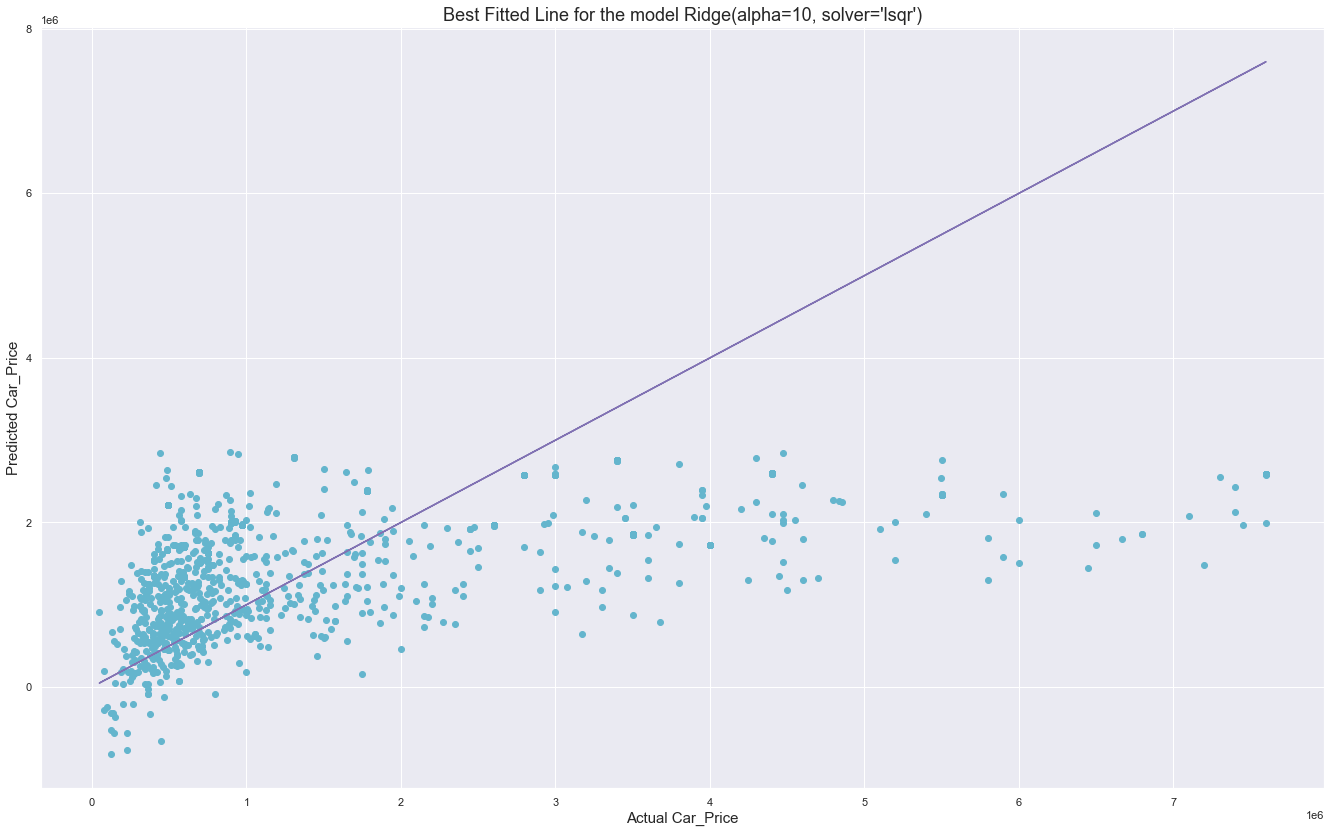

In [296]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=0.1) is -2.2735807776863477
Testing Accuracy of model ElasticNet(alpha=0.1) is -2.8800514268031665

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 939326.5752391657
The Mean Squared Error is (MSE) 1889744751244.8232
The Root Mean Squared Error is (RMSE) 1374679.872277478


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1) is -2.3171202464641105 & std is 0.14263646293198873


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1) is -18.10272957813404 & std is 0.34128459996992844


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1) is -3.421713069628232 & std is 0.2935516502452962



	


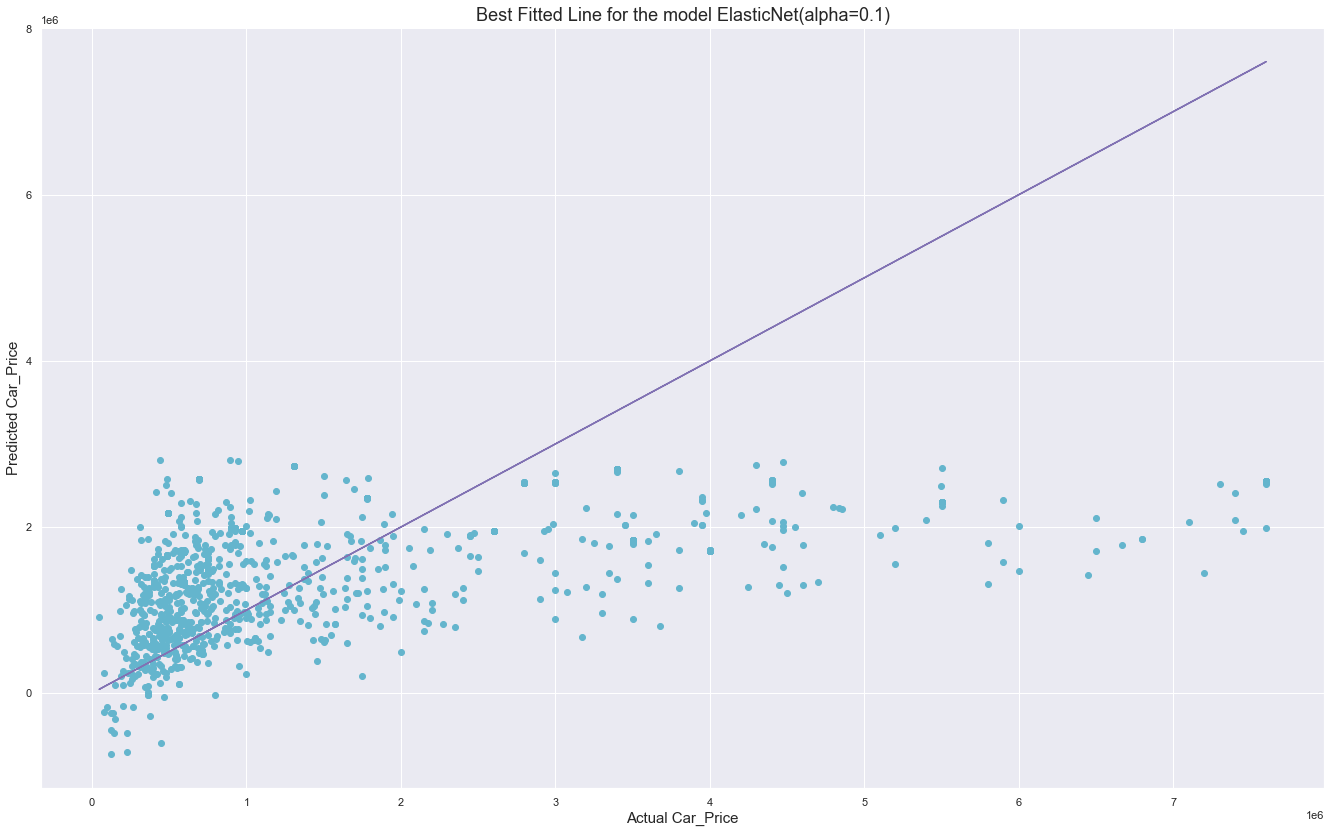

In [297]:
model(en,x,y)

Training Accuracy of model SGDRegressor(learning_rate='constant', loss='squared_epsilon_insensitive',
             penalty='elasticnet') is -2.249077363246856
Testing Accuracy of model SGDRegressor(learning_rate='constant', loss='squared_epsilon_insensitive',
             penalty='elasticnet') is -2.771140235298321

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1024870.3283856622
The Mean Squared Error is (MSE) 2238643222670.1133
The Root Mean Squared Error is (RMSE) 1496209.6185595498


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(learning_rate='constant', loss='squared_epsilon_insensitive',
             penalty='elasticnet') is -52.378220502256426 & std is 0.5399700812016615


At K-Fold 3 the CV Score of model SGDRegressor(learning_rate='constant', loss='squared_epsilon_insensitive',
             penalty='elasticnet') is -35.53510192172489 & std is 0.543315410467131


At K-Fold 4 the CV Score of model SGDRegressor(lea

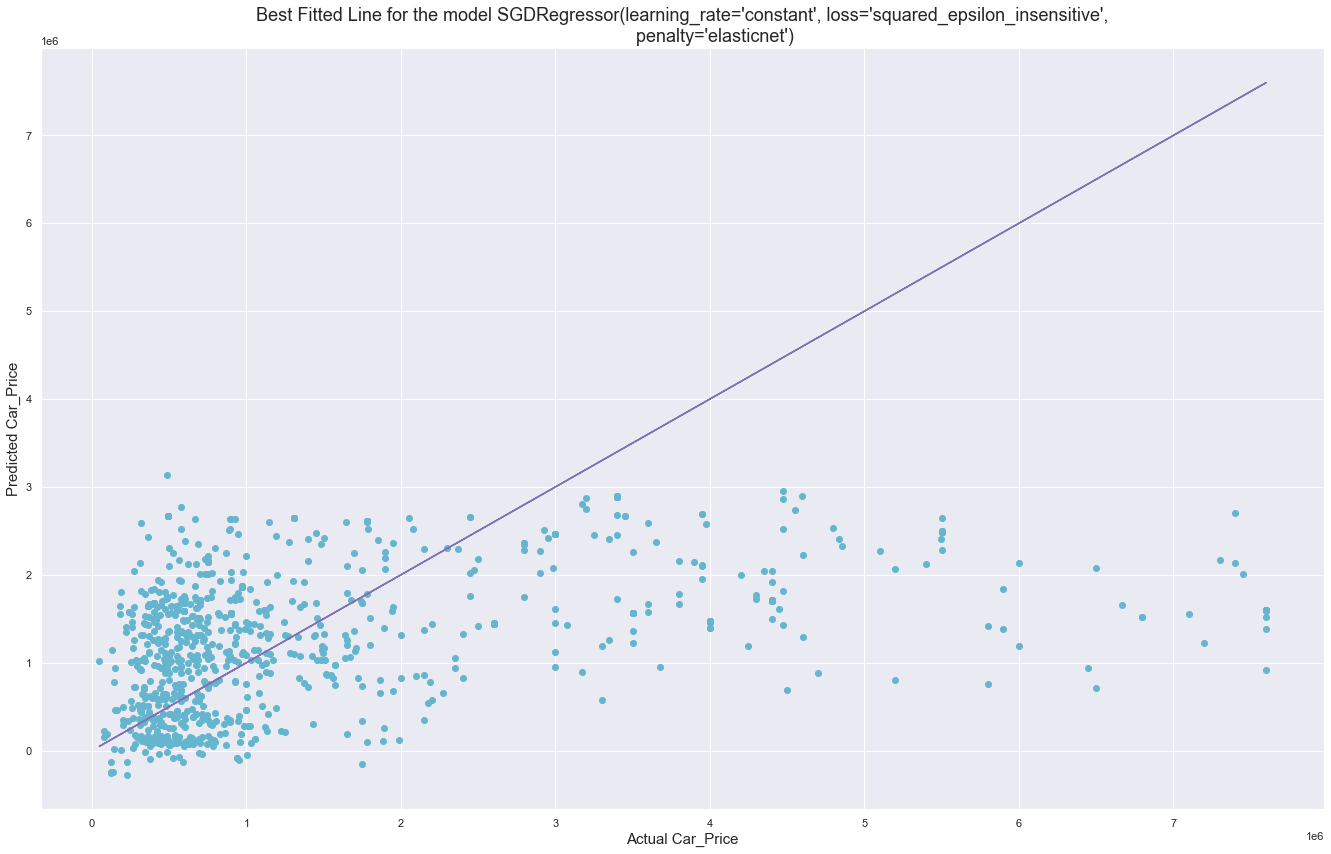

In [298]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.935732944130608
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.49086675412524783

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 459965.00224071904
The Mean Squared Error is (MSE) 847040056975.8162
The Root Mean Squared Error is (RMSE) 920347.7913135969


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is -16.789953159792653 & std is 0.250990946327911


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is -52.273939942108605 & std is 0.5881007404690834


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 19.274218059733077 & std is 0.4082792754179593



	


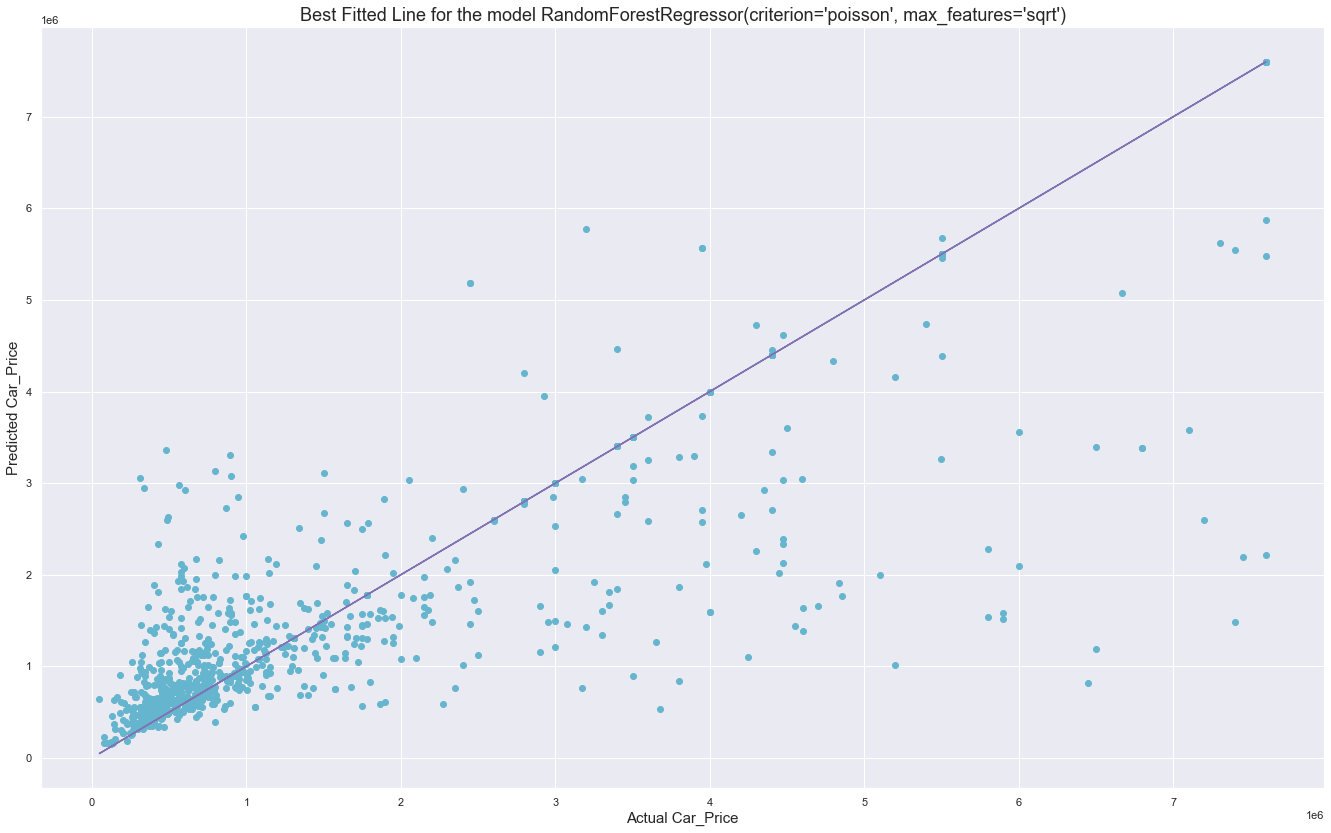

In [299]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is -1.1118747397464972
Testing Accuracy of model AdaBoostRegressor() is -1.2645932155912822

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 1092652.2442978139
The Mean Squared Error is (MSE) 1973271736667.656
The Root Mean Squared Error is (RMSE) 1404731.909179704


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -74.01685438380231 & std is 0.4710474472991507


At K-Fold 3 the CV Score of model AdaBoostRegressor() is -196.5493979537552 & std is 2.3175445706187876


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -98.59899906257125 & std is 1.6226328277888644



	


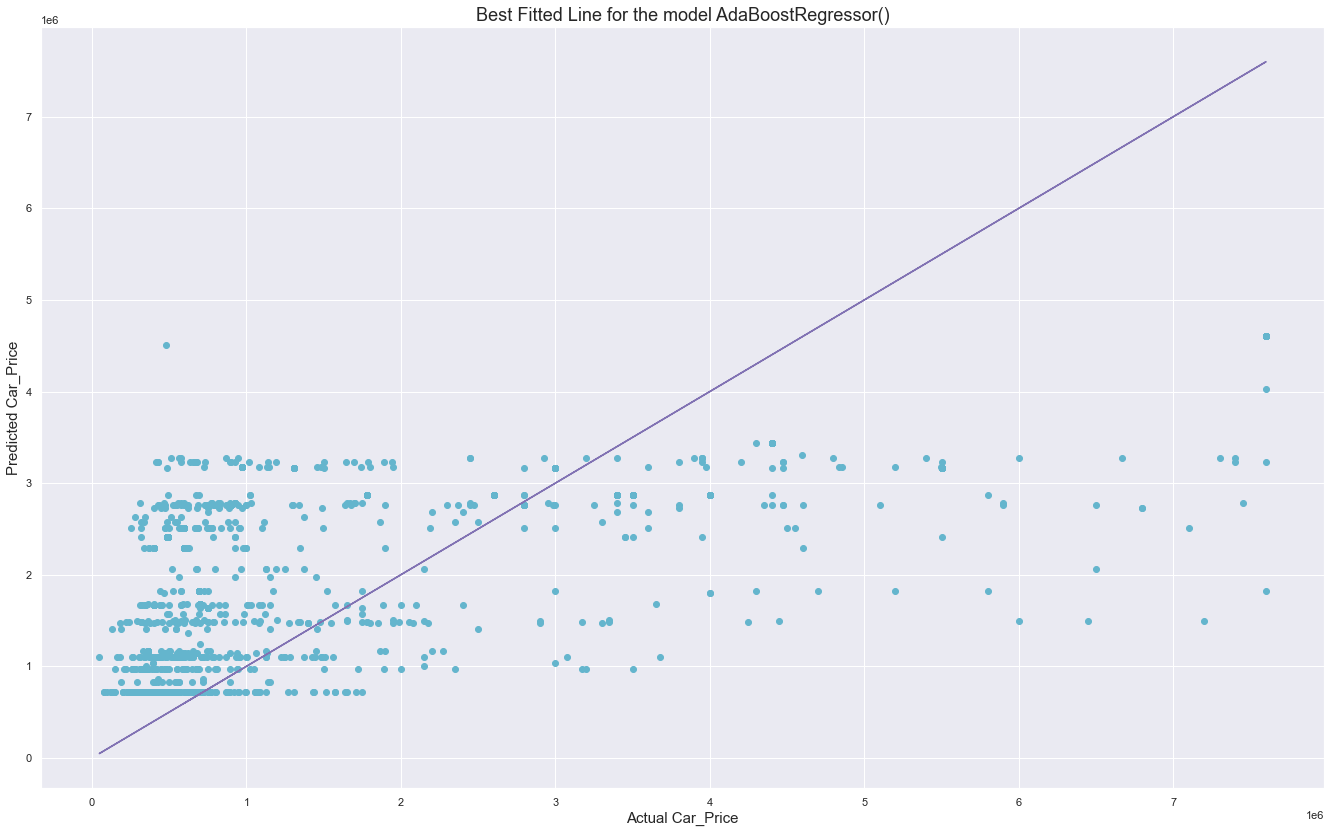

In [300]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is 0.08169267328950125
Testing Accuracy of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is -0.09232092126556957

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 593071.2593648178
The Mean Squared Error is (MSE) 1254913224665.5796
The Root Mean Squared Error is (RMSE) 1120229.0947237443


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is -7.4411260835778865 & std is 0.003514195662718378


At K-Fold 3 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is -11.937228182617133 & std is 0.20749849919773178


At K-Fold 4 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is 6.165393578722283 & std is 0.16602826520071476



	


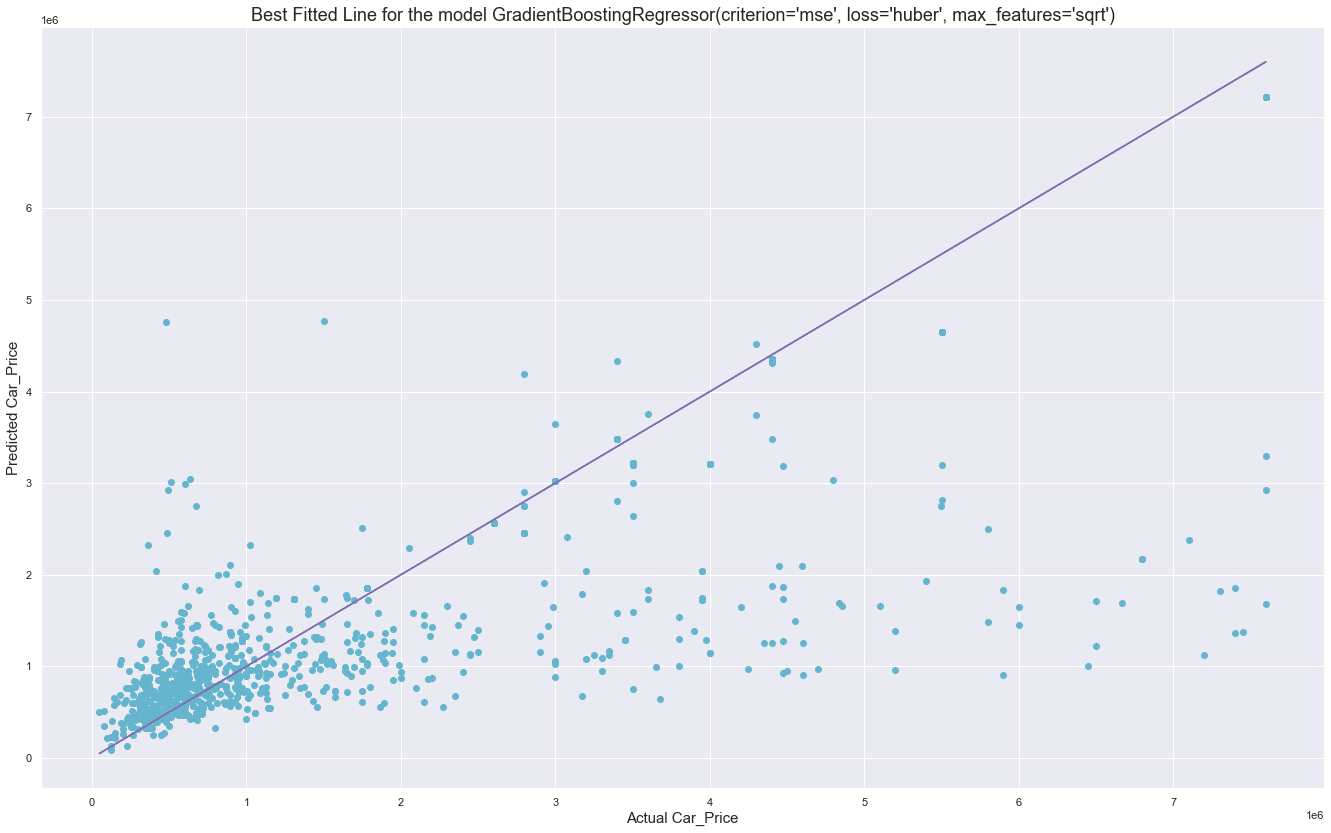

In [301]:
model(grd,x,y)

###### As we can see in the above models 'RandomForestRegressor' model seems best among other. With the help of this model the testing accuracy is coming as approx 50% which is a par score and also the RMSE error of this model is less as compare to other models. Also,as we can see in the graph that the best fitted Straight line of 'RandomForestRegressor' model is containing more data-points as compare to that of others.

### Saving the Best Model

In [302]:
import joblib
file='Car_Price.obj'
joblib.dump(rf,file)

['Car_Price.obj']

### Loading the Modle

In [303]:
a=joblib.load('Car_Price.obj')
a

RandomForestRegressor(criterion='poisson', max_features='sqrt')

In [304]:
#making prediction
pred=a.predict(x_test)
pred

array([ 655694.52      , 1038785.99      ,  576463.        ,
       1500619.98      ,  970000.        ,  838800.02      ,
       2336016.98      ,  855961.5       ,  615912.95      ,
        324689.96      ,  397936.08620004,  627070.        ,
        262753.98      , 1076112.38      ,  459282.99      ,
       4400000.        , 1054979.99      , 3283960.        ,
        251573.01      , 1613270.        ,  400000.        ,
        251420.        , 1098935.06      ,  566899.01      ,
        400000.        ,  925000.        ,  337852.11      ,
       1131443.97      ,  433381.98      , 1159138.99      ,
        449768.02      , 6229400.        ,  731410.01      ,
       2095140.98      , 3902933.99      ,  648128.11      ,
        700000.        ,  494705.14      ,  723174.        ,
        477312.99      , 1611144.91      ,  307727.03      ,
       5569350.        ,  427380.        ,  365000.        ,
       2681114.99      ,  779607.        ,  294488.08      ,
        140799.97      ,

In [305]:
#Accuracy of RandomForestRegressor
accuracy_score=r2_score(pred,y_test)
accuracy_score

0.8443847102053991

Now, getting the testing accuracy as almost 85% which is excellent accuracy

<AxesSubplot:ylabel='Density'>

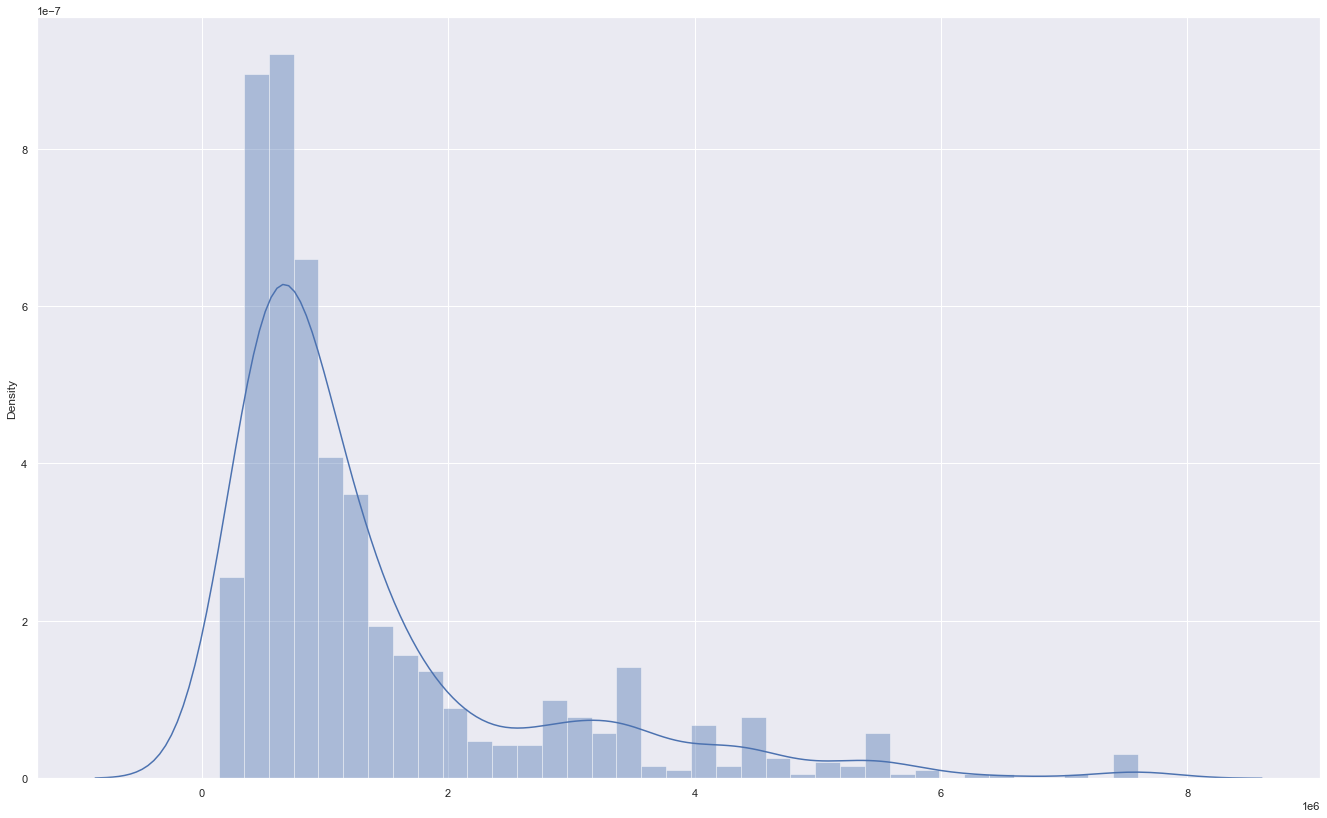

In [306]:
#plotting distribution plot to check normal distribution
sns.distplot(pred)

Text(0.5, 1.0, 'Best Fitted Line of the Model')

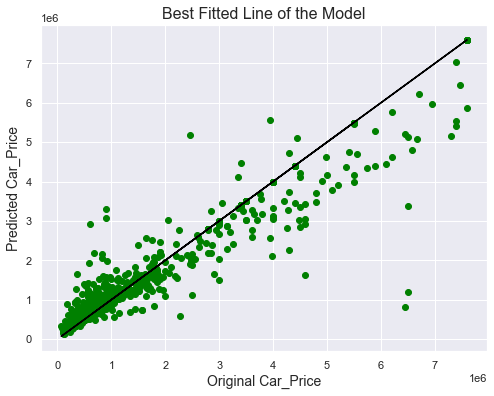

In [307]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original Car_Price',fontsize=14)
plt.ylabel('Predicted Car_Price',fontsize=14)
plt.title('Best Fitted Line of the Model',fontsize=16)

In [308]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Car_Price','Original Car_Price'])
conclusion

0           1         2           3         4    \
Predicted Car_Price  655694.52  1038785.99  576463.0  1500619.98  970000.0   
Original Car_Price   653199.00  1009000.00  580299.0  1136000.00  970000.0   

                           5           6         7          8          9    \
Predicted Car_Price  838800.02  2336016.98  855961.5  615912.95  324689.96   
Original Car_Price   784519.00  2625000.00  881899.0  425000.00  215000.00   

                     ...        938        939        940        941  \
Predicted Car_Price  ...  588180.01  1618090.0  586731.01  464511.17   
Original Car_Price   ...  631199.00  1549000.0  542999.00  373499.00   

                          942        943        944       945        946  \
Predicted Car_Price  495000.0  4400000.0  384338.01  615852.0  433594.43   
Original Car_Price   495000.0  4400000.0  274599.00  623499.0  175000.00   

                           947  
Predicted Car_Price  5500000.0  
Original Car_Price   5500000.0  

[2 rows x 948 columns]

##### When I deployed our RandomForestRegressor model to the y_test data what i found is that the testing accuracy of the model went to 85% which is excellent accuracy for predicting any target variable correctly.As,we can see that the distance b/w the data-points of the predicted car price and original car price is not that high which indicates RMSE to be on lower side and that's why Random Forest Regressor model is performing well in this scenaraio.